In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score,root_mean_squared_error
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.feature_selection import RFECV,RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import uniform, randint,loguniform
import shap

# 1ST STAGE

In [2]:
adjusted_cohort = pd.read_csv('1_ADJUSTED_COHORT.csv')
adjusted_cohort.head(3)

unitid                     institution name  year  \
0  100654             Alabama A & M University  2022   
1  100663  University of Alabama at Birmingham  2022   
2  100690                   Amridge University  2022   

                                  GR2022.Cohort data  GR2022.Grand total  \
0  4-year institutions, Adjusted cohort (revised ...                1404   
1  4-year institutions, Adjusted cohort (revised ...                1945   
2  4-year institutions, Adjusted cohort (revised ...                   2   

   GR2022.Total men  GR2022.Total women  \
0               568                 836   
1               728                1217   
2                 1                   1   

   GR2022.American Indian or Alaska Native total  GR2022.Asian total  \
0                                              2                   1   
1                                             11                 152   
2                                              0                   1   

   GR2022.Black or African American total  GR2022.Hispanic total  \
0                                    1276                     15   
1                                     493                     51   
2                                       0                      0   

   GR2022.Native Hawaiian or Other Pacific Islander total  GR2022.White total  \
0                                                  2                       17   
1                                                  1                     1086   
2                                                  0                        1   

   GR2022.Two or more races total  GR2022.Race/ethnicity unknown total  \
0                              85                                    1   
1                             102                                    6   
2                               0                                    0   

   GR2022.U.S. Nonresident total  IDX_GR  
0                              5      -2  
1                             43      -2  
2                              0      -2

In [3]:
cohort_completers = pd.read_csv('3_COHORT_COMPLETERS.csv')
cohort_completers.head(3)

unitid                     institution name  year  \
0  100654             Alabama A & M University  2022   
1  100663  University of Alabama at Birmingham  2022   
2  100690                   Amridge University  2022   

                                  GR2022.Cohort data  GR2022.Grand total  \
0  Bachelor's or equiv subcohort (4-yr institutio...                 178   
1  Bachelor's or equiv subcohort (4-yr institutio...                 857   
2  Bachelor's or equiv subcohort (4-yr institutio...                   1   

   GR2022.Total men  GR2022.Total women  \
0                34                 144   
1               267                 590   
2                 0                   1   

   GR2022.American Indian or Alaska Native total  GR2022.Asian total  \
0                                              0                   0   
1                                              3                 108   
2                                              0                   0   

   GR2022.Black or African American total  GR2022.Hispanic total  \
0                                     157                      4   
1                                     141                     17   
2                                       0                      0   

   GR2022.Native Hawaiian or Other Pacific Islander total  GR2022.White total  \
0                                                  0                        1   
1                                                  1                      520   
2                                                  0                        1   

   GR2022.Two or more races total  GR2022.Race/ethnicity unknown total  \
0                              11                                    0   
1                              43                                    3   
2                               0                                    0   

   GR2022.U.S. Nonresident total  IDX_GR  
0                              5      -2  
1                             21      -2  
2                              0      -2

In [4]:
combined = pd.read_csv('4_COMBINED_NEW.csv')
combined.head(3)

unitid                     institution name  year  \
0  100654             Alabama A & M University  2016   
1  100663  University of Alabama at Birmingham  2016   
2  100690                   Amridge University  2016   

  HD2016.Level of institution HD2016.Control of institution  \
0          Four or more years                        Public   
1          Four or more years                        Public   
2          Four or more years        Private not-for-profit   

                  HD2016.Undergraduate offering HD2016.Degree-granting status  \
0  Undergraduate degree or certificate offering               Degree-granting   
1  Undergraduate degree or certificate offering               Degree-granting   
2  Undergraduate degree or certificate offering               Degree-granting   

   HD2016.Longitude location of institution  \
0                                -86.568502   
1                                -86.799345   
2                                -86.174010   

   HD2016.Latitude location of institution HD2016.Date institution closed  \
0                                34.783368                             -2   
1                                33.505697                             -2   
2                                32.362609                             -2   

   ...  \
0  ...   
1  ...   
2  ...   

  ADM2016_RV.Number of first-time degree/certificate-seeking students submitting SAT scores  \
0                                              217.0                                          
1                                               85.0                                          
2                                                NaN                                          

  ADM2016_RV.Percent of first-time degree/certificate-seeking students submitting SAT scores  \
0                                               14.0                                           
1                                                4.0                                           
2                                                NaN                                           

   ADM2016_RV.Number of first-time degree/certificate-seeking students submitting ACT scores  \
0                                             1433.0                                           
1                                             1849.0                                           
2                                                NaN                                           

   ADM2016_RV.Percent of first-time degree/certificate-seeking students submitting ACT scores  \
0                                               91.0                                            
1                                               92.0                                            
2                                                NaN                                            

   ADM2016_RV.SAT Critical Reading 25th percentile score  \
0                                              380.0       
1                                              480.0       
2                                                NaN       

   ADM2016_RV.SAT Critical Reading 75th percentile score  \
0                                              470.0       
1                                              640.0       
2                                                NaN       

   ADM2016_RV.SAT Math 25th percentile score  \
0                                      370.0   
1                                      490.0   
2                                        NaN   

   ADM2016_RV.SAT Math 75th percentile score  \
0                                      470.0   
1                                      660.0   
2                                        NaN   

  ADM2016_RV.ACT Composite 25th percentile score  \
0                                           16.0   
1                                           21.0   
2                                            NaN   

   ADM2016_RV.ACT Composite 75th percentile 

In [5]:
enrol_gender = pd.read_csv('5_FALL ENROL_GENDER.csv')
enrol_gender.head(3)

unitid                     institution name  year  \
0  100654             Alabama A & M University  2016   
1  100663  University of Alabama at Birmingham  2016   
2  100690                   Amridge University  2016   

                             EF2016.Level of student  EF2016_RV.Grand total  \
0  All students, Undergraduate, Degree/certificat...                   1448   
1  All students, Undergraduate, Degree/certificat...                   2021   
2  All students, Undergraduate, Degree/certificat...                     23   

   EF2016_RV.Total men  EF2016_RV.Total women  IDX_EF  
0                  585                    863      -2  
1                  758                   1263      -2  
2                    5                     18      -2

In [6]:
enrol_race = pd.read_csv('7_FALL_ENROL_RACE.csv')
enrol_race.head(3)

unitid                     institution name  year  \
0  100654             Alabama A & M University  2016   
1  100663  University of Alabama at Birmingham  2016   
2  100690                   Amridge University  2016   

                            EF2016A.Level of student  EF2016A_RV.Grand total  \
0  Full-time students, Undergraduate, Degree/cert...                    1410   
1  Full-time students, Undergraduate, Degree/cert...                    1948   
2  Full-time students, Undergraduate, Degree/cert...                       3   

   EF2016A_RV.American Indian or Alaska Native total  EF2016A_RV.Asian total  \
0                                                  2                       1   
1                                                 11                     152   
2                                                  0                       0   

   EF2016A_RV.Black or African American total  EF2016A_RV.Hispanic total  \
0                                        1282                         15   
1                                         495                         51   
2                                           0                          0   

   EF2016A_RV.Native Hawaiian or Other Pacific Islander total  \
0                                                  2            
1                                                  1            
2                                                  0            

   EF2016A_RV.White total  EF2016A_RV.Two or more races total  \
0                      17                                  85   
1                    1087                                 102   
2                       0                                   0   

   EF2016A_RV.Race/ethnicity unknown total  \
0                                        1   
1                                        6   
2                                        3   

   EF2016A_RV.Nonresident alien total  IDX_EF  
0                                   5      -2  
1                                  43      -2  
2                                   0      -2

In [7]:
fin_aid_enrol = pd.read_csv('8_FIN_AID_ENROL.csv')
fin_aid_enrol.head(3)

unitid                     institution name  year  \
0  100654             Alabama A & M University  2017   
1  100663  University of Alabama at Birmingham  2017   
2  100690                   Amridge University  2017   

   SFA1617_RV.Number of students in full-year cohort  \
0                                                NaN   
1                                                NaN   
2                                                NaN   

   SFA1617_RV.Total number of full-time first-time degree/certificate seeking undergraduates - financial aid cohort  \
0                                             1410.0                                                                  
1                                             1948.0                                                                  
2                                                4.0                                                                  

   SFA1617_RV.Number of full-time first-time undergraduates awarded any financial aid  \
0                                             1296.0                                    
1                                             1837.0                                    
2                                                2.0                                    

   SFA1617_RV.Percent of full-time first-time undergraduates awarded any financial aid  \
0                                               92.0                                     
1                                               94.0                                     
2                                               50.0                                     

   SFA1617_RV.Total amount of federal, state, local or institutional grant aid awarded to full-time first-time undergraduates  \
0                                          9765592.0                                                                            
1                                         15629595.0                                                                            
2                                            16461.0                                                                            

   EFIA2017_RV.Estimated full-time equivalent (FTE) undergraduate enrollment, 2016-17  \
0                                             4307.0                                    
1                                            10960.0                                    
2                                              244.0                                    

   EFIA2017_RV.Reported full-time equivalent (FTE) undergraduate enrollment, 2016-17  \
0                                             4307.0                                   
1                                            10960.0                                   
2                                              244.0                                   

   DRVEF122017_RV.12-month unduplicated headcount, undergraduate: 2016-17  
0                                             5207.0                       
1                                            13308.0                       
2                                              431.0

In [8]:
graduation_rates = pd.read_csv('9_GRADUATION_RATES.csv')
graduation_rates.head(3)

unitid                     institution name  year  \
0  100654             Alabama A & M University  2022   
1  100663  University of Alabama at Birmingham  2022   
2  100690                   Amridge University  2022   

   DRVGR2022.Graduation rate - Bachelor degree within 4 years, total  
0                                               13.0                  
1                                               44.0                  
2                                               50.0

In [9]:
private_for_profit = pd.read_csv('10_1_REV_EXP_PRIV_PROF.csv')
private_for_profit.head(3)

unitid                     institution name  year  \
0  100654             Alabama A & M University  2017   
1  100663  University of Alabama at Birmingham  2017   
2  100690                   Amridge University  2017   

   F1617_F3_RV.Tuition and fees  \
0                           NaN   
1                           NaN   
2                           NaN   

   F1617_F3_RV.Total revenues and investment return  \
0                                               NaN   
1                                               NaN   
2                                               NaN   

   F1617_F3_RV.Research-Total amount  \
0                                NaN   
1                                NaN   
2                                NaN   

   F1617_F3_RV.Student service-Total amount  \
0                                       NaN   
1                                       NaN   
2                                       NaN   

   F1617_F3_RV.Total expenses-Total amount  
0                                      NaN  
1                                      NaN  
2                                      NaN

In [10]:
private_not_for_profit = pd.read_csv('10_2_REV_EXP_PRIV NOT FOR PROF.csv')
private_not_for_profit.head(3)

unitid                     institution name  year  \
0  100654             Alabama A & M University  2017   
1  100663  University of Alabama at Birmingham  2017   
2  100690                   Amridge University  2017   

   F1617_F2_RV.Tuition and fees - Total  \
0                                   NaN   
1                                   NaN   
2                             6602757.0   

   F1617_F2_RV.Total revenues and investment return - Total  \
0                                                NaN          
1                                                NaN          
2                                          7428566.0          

   F1617_F2_RV.Research-Total amount  \
0                                NaN   
1                                NaN   
2                                0.0   

   F1617_F2_RV.Student service-Total amount  \
0                                       NaN   
1                                       NaN   
2                                  771771.0   

   F1617_F2_RV.Total expenses-Total amount  
0                                      NaN  
1                                      NaN  
2                                7385164.0

In [11]:
public = pd.read_csv('10_3_REV_EXP_PUBLIC.csv')
public.head(3)

unitid                     institution name  year  \
0  100654             Alabama A & M University  2017   
1  100663  University of Alabama at Birmingham  2017   
2  100690                   Amridge University  2017   

   F1617_F1A_RV.Tuition and fees, after deducting discounts and allowances  \
0                                         46521234.0                         
1                                        209220942.0                         
2                                                NaN                         

   F1617_F1A_RV.Total all revenues and other additions  \
0                                       1.595778e+08     
1                                       3.070309e+09     
2                                                NaN     

   F1617_F1A_RV.Research - Current year total  \
0                                  10150441.0   
1                                 297969696.0   
2                                         NaN   

   F1617_F1A_RV.Student services - Current year total  \
0                                         20550501.0    
1                                         50272077.0    
2                                                NaN    

   F1617_F1A_RV.Total expenses and deductions - Current year total  
0                                       1.495058e+08                
1                                       2.861961e+09                
2                                                NaN

In [12]:
graduation_rates.rename({'year':'grad_year',
                        'DRVGR2022.Graduation rate - Bachelor degree within 4 years, total':'grad_rate_2022_undergrad'},
                        axis=1,inplace=True)
graduation_rates.head(3)

unitid                     institution name  grad_year  \
0  100654             Alabama A & M University       2022   
1  100663  University of Alabama at Birmingham       2022   
2  100690                   Amridge University       2022   

   grad_rate_2022_undergrad  
0                      13.0  
1                      44.0  
2                      50.0

# ADJUSTED COHORT AND COMPLETERS

In [13]:
#renaming columns for ADJUSTED_COHORT(AC)
adjusted_cohort.rename({'year':'AC_year',
                        'GR2022.Cohort data':'AC_data',
                       'GR2022.Grand total':'AC_grandtotal',
                       'GR2022.Total men':'AC_totalmen',
                        'GR2022.Total women':'AC_totalwomen',
                       'GR2022.American Indian or Alaska Native total':'AC_amerIndianAla',
                       'GR2022.Asian total':'AC_asian',
                       'GR2022.Black or African American total':'AC_blackorAfricanAmer',
                       'GR2022.Hispanic total':'AC_hispanic',
                       'GR2022.Native Hawaiian or Other Pacific Islander total':'AC_hawaiiPacific',
                       'GR2022.White total':'AC_white',
                       'GR2022.Two or more races total':'AC_two+race',
                       'GR2022.Race/ethnicity unknown total':'AC_unknownRace',
                       'GR2022.U.S. Nonresident total':'AC_us_nonres',
                       'IDX_GR':'AC_IDX_GR'},axis=1,inplace=True)
adjusted_cohort.head(3)

unitid                     institution name  AC_year  \
0  100654             Alabama A & M University     2022   
1  100663  University of Alabama at Birmingham     2022   
2  100690                   Amridge University     2022   

                                             AC_data  AC_grandtotal  \
0  4-year institutions, Adjusted cohort (revised ...           1404   
1  4-year institutions, Adjusted cohort (revised ...           1945   
2  4-year institutions, Adjusted cohort (revised ...              2   

   AC_totalmen  AC_totalwomen  AC_amerIndianAla  AC_asian  \
0          568            836                 2         1   
1          728           1217                11       152   
2            1              1                 0         1   

   AC_blackorAfricanAmer  AC_hispanic  AC_hawaiiPacific  AC_white  \
0                   1276           15                 2        17   
1                    493           51                 1      1086   
2                      0            0                 0         1   

   AC_two+race  AC_unknownRace  AC_us_nonres  AC_IDX_GR  
0           85               1             5         -2  
1          102               6            43         -2  
2            0               0             0         -2

In [14]:
#renaming columns for COHORT_COMPLETERS (CC)
cohort_completers.rename({'year':'CC_year',
                        'GR2022.Cohort data':'CC_data',
                       'GR2022.Grand total':'CC_grandtotal',
                       'GR2022.Total men':'CC_totalmen',
                        'GR2022.Total women':'CC_totalwomen',
                       'GR2022.American Indian or Alaska Native total':'CC_amerIndianAla',
                       'GR2022.Asian total':'CC_asian',
                       'GR2022.Black or African American total':'CC_blackorAfricanAmer',
                       'GR2022.Hispanic total':'CC_hispanic',
                       'GR2022.Native Hawaiian or Other Pacific Islander total':'CC_hawaiiPacific',
                       'GR2022.White total':'CC_white',
                       'GR2022.Two or more races total':'CC_two+race',
                       'GR2022.Race/ethnicity unknown total':'CC_unknownRace',
                       'GR2022.U.S. Nonresident total':'CC_us_nonres',
                         'IDX_GR':'CC_IDX_GR'},axis=1,inplace=True)
cohort_completers.head(3)

unitid                     institution name  CC_year  \
0  100654             Alabama A & M University     2022   
1  100663  University of Alabama at Birmingham     2022   
2  100690                   Amridge University     2022   

                                             CC_data  CC_grandtotal  \
0  Bachelor's or equiv subcohort (4-yr institutio...            178   
1  Bachelor's or equiv subcohort (4-yr institutio...            857   
2  Bachelor's or equiv subcohort (4-yr institutio...              1   

   CC_totalmen  CC_totalwomen  CC_amerIndianAla  CC_asian  \
0           34            144                 0         0   
1          267            590                 3       108   
2            0              1                 0         0   

   CC_blackorAfricanAmer  CC_hispanic  CC_hawaiiPacific  CC_white  \
0                    157            4                 0         1   
1                    141           17                 1       520   
2                      0            0                 0         1   

   CC_two+race  CC_unknownRace  CC_us_nonres  CC_IDX_GR  
0           11               0             5         -2  
1           43               3            21         -2  
2            0               0             0         -2

In [15]:
#combining adjusted cohort and cohort completers
adjusted_and_completers = adjusted_cohort.merge(cohort_completers,
                                                 on='unitid',
                                                 how='left')

In [16]:
adjusted_and_completers.head(3)

unitid                   institution name_x  AC_year  \
0  100654             Alabama A & M University     2022   
1  100663  University of Alabama at Birmingham     2022   
2  100690                   Amridge University     2022   

                                             AC_data  AC_grandtotal  \
0  4-year institutions, Adjusted cohort (revised ...           1404   
1  4-year institutions, Adjusted cohort (revised ...           1945   
2  4-year institutions, Adjusted cohort (revised ...              2   

   AC_totalmen  AC_totalwomen  AC_amerIndianAla  AC_asian  \
0          568            836                 2         1   
1          728           1217                11       152   
2            1              1                 0         1   

   AC_blackorAfricanAmer  ...  CC_amerIndianAla  CC_asian  \
0                   1276  ...               0.0       0.0   
1                    493  ...               3.0     108.0   
2                      0  ...               0.0       0.0   

   CC_blackorAfricanAmer  CC_hispanic  CC_hawaiiPacific  CC_white  \
0                  157.0          4.0               0.0       1.0   
1                  141.0         17.0               1.0     520.0   
2                    0.0          0.0               0.0       1.0   

   CC_two+race CC_unknownRace  CC_us_nonres CC_IDX_GR  
0         11.0            0.0           5.0      -2.0  
1         43.0            3.0          21.0      -2.0  
2          0.0            0.0           0.0      -2.0  

[3 rows x 33 columns]

# REVENUE, EXPENSES, & TUITION

In [17]:
public.rename({'institution name':'name_pub',
               'F1617_F1A_RV.Tuition and fees, after deducting discounts and allowances':'pub_tuition&fees',
              'F1617_F1A_RV.Total all revenues and other additions':'pub_tot_revenue+additions',
              'F1617_F1A_RV.Research - Current year total':'pub_research',
              'F1617_F1A_RV.Student services - Current year total':'pub_stu_serv',
              'F1617_F1A_RV.Total expenses and deductions - Current year total':'pub_tot_exp_ded'},axis=1,inplace=True)
public

unitid                               name_pub  year  pub_tuition&fees  \
0     100654               Alabama A & M University  2017        46521234.0   
1     100663    University of Alabama at Birmingham  2017       209220942.0   
2     100690                     Amridge University  2017               NaN   
3     100706    University of Alabama in Huntsville  2017        62397294.0   
4     100724               Alabama State University  2017        45278161.0   
...      ...                                    ...   ...               ...   
2147  489344  Chamberlain University-North Carolina  2017               NaN   
2148  489353      Chamberlain University-California  2017               NaN   
2149  489779               Purdue University Global  2017               NaN   
2150  489788     Purdue University Global-Milwaukee  2017               NaN   
2151  489937                    Carolina University  2017               NaN   

      pub_tot_revenue+additions  pub_research  pub_stu_serv  pub_tot_exp_ded  
0                  1.595778e+08    10150441.0    20550501.0     1.495058e+08  
1                  3.070309e+09   297969696.0    50272077.0     2.861961e+09  
2                           NaN           NaN           NaN              NaN  
3                  2.268086e+08    72967940.0    20998648.0     2.270122e+08  
4                  1.431885e+08     4252567.0    17139324.0     1.403418e+08  
...                         ...           ...           ...              ...  
2147                        NaN           NaN           NaN              NaN  
2148                        NaN           NaN           NaN              NaN  
2149                        NaN           NaN           NaN              NaN  
2150                        NaN           NaN           NaN              NaN  
2151                        NaN           NaN           NaN              NaN  

[2152 rows x 8 columns]

In [18]:
private_for_profit.rename({'institution name':'name_for_profit',
               'F1617_F3_RV.Tuition and fees':'prof_tuition&fees',
              'F1617_F3_RV.Total revenues and investment return':'prof_tot_revenue+additions',
              'F1617_F3_RV.Research-Total amount':'prof_research',
              'F1617_F3_RV.Student service-Total amount':'prof_stu_serv',
              'F1617_F3_RV.Total expenses-Total amount':'prof_tot_exp_ded'},axis=1,inplace=True)

private_for_profit.head(3)

unitid                      name_for_profit  year  prof_tuition&fees  \
0  100654             Alabama A & M University  2017                NaN   
1  100663  University of Alabama at Birmingham  2017                NaN   
2  100690                   Amridge University  2017                NaN   

   prof_tot_revenue+additions  prof_research  prof_stu_serv  prof_tot_exp_ded  
0                         NaN            NaN            NaN               NaN  
1                         NaN            NaN            NaN               NaN  
2                         NaN            NaN            NaN               NaN

In [19]:
private_not_for_profit.rename({'institution name':'name_not_for_profit',
               'F1617_F2_RV.Tuition and fees - Total':'noprof_tuition&fees',
              'F1617_F2_RV.Total revenues and investment return - Total':'noprof_tot_revenue+additions',
              'F1617_F2_RV.Research-Total amount':'noprof_research',
              'F1617_F2_RV.Student service-Total amount':'noprof_stu_serv',
              'F1617_F2_RV.Total expenses-Total amount':'noprof_tot_exp_ded'},axis=1,inplace=True)

private_not_for_profit.head(3)

unitid                  name_not_for_profit  year  noprof_tuition&fees  \
0  100654             Alabama A & M University  2017                  NaN   
1  100663  University of Alabama at Birmingham  2017                  NaN   
2  100690                   Amridge University  2017            6602757.0   

   noprof_tot_revenue+additions  noprof_research  noprof_stu_serv  \
0                           NaN              NaN              NaN   
1                           NaN              NaN              NaN   
2                     7428566.0              0.0         771771.0   

   noprof_tot_exp_ded  
0                 NaN  
1                 NaN  
2           7385164.0

In [20]:
merged_rev_exp = public.merge(private_for_profit).merge(private_not_for_profit)
merged_rev_exp.head(5)

unitid                             name_pub  year  pub_tuition&fees  \
0  100654             Alabama A & M University  2017        46521234.0   
1  100663  University of Alabama at Birmingham  2017       209220942.0   
2  100690                   Amridge University  2017               NaN   
3  100706  University of Alabama in Huntsville  2017        62397294.0   
4  100724             Alabama State University  2017        45278161.0   

   pub_tot_revenue+additions  pub_research  pub_stu_serv  pub_tot_exp_ded  \
0               1.595778e+08    10150441.0    20550501.0     1.495058e+08   
1               3.070309e+09   297969696.0    50272077.0     2.861961e+09   
2                        NaN           NaN           NaN              NaN   
3               2.268086e+08    72967940.0    20998648.0     2.270122e+08   
4               1.431885e+08     4252567.0    17139324.0     1.403418e+08   

                       name_for_profit  prof_tuition&fees  \
0             Alabama A & M University                NaN   
1  University of Alabama at Birmingham                NaN   
2                   Amridge University                NaN   
3  University of Alabama in Huntsville                NaN   
4             Alabama State University                NaN   

   prof_tot_revenue+additions  prof_research  prof_stu_serv  prof_tot_exp_ded  \
0                         NaN            NaN            NaN               NaN   
1                         NaN            NaN            NaN               NaN   
2                         NaN            NaN            NaN               NaN   
3                         NaN            NaN            NaN               NaN   
4                         NaN            NaN            NaN               NaN   

                   name_not_for_profit  noprof_tuition&fees  \
0             Alabama A & M University                  NaN   
1  University of Alabama at Birmingham                  NaN   
2                   Amridge University            6602757.0   
3  University of Alabama in Huntsville                  NaN   
4             Alabama State University                  NaN   

   noprof_tot_revenue+additions  noprof_research  noprof_stu_serv  \
0                           NaN              NaN              NaN   
1                           NaN              NaN              NaN   
2                     7428566.0              0.0         771771.0   
3                           NaN              NaN              NaN   
4                           NaN              NaN              NaN   

   noprof_tot_exp_ded  
0                 NaN  
1                 NaN  
2           7385164.0  
3                 NaN  
4                 NaN

In [21]:
merged_rev_exp.fillna(0,inplace=True)

In [22]:
merged_rev_exp.head(3)

unitid                             name_pub  year  pub_tuition&fees  \
0  100654             Alabama A & M University  2017        46521234.0   
1  100663  University of Alabama at Birmingham  2017       209220942.0   
2  100690                   Amridge University  2017               0.0   

   pub_tot_revenue+additions  pub_research  pub_stu_serv  pub_tot_exp_ded  \
0               1.595778e+08    10150441.0    20550501.0     1.495058e+08   
1               3.070309e+09   297969696.0    50272077.0     2.861961e+09   
2               0.000000e+00           0.0           0.0     0.000000e+00   

                       name_for_profit  prof_tuition&fees  \
0             Alabama A & M University                0.0   
1  University of Alabama at Birmingham                0.0   
2                   Amridge University                0.0   

   prof_tot_revenue+additions  prof_research  prof_stu_serv  prof_tot_exp_ded  \
0                         0.0            0.0            0.0               0.0   
1                         0.0            0.0            0.0               0.0   
2                         0.0            0.0            0.0               0.0   

                   name_not_for_profit  noprof_tuition&fees  \
0             Alabama A & M University                  0.0   
1  University of Alabama at Birmingham                  0.0   
2                   Amridge University            6602757.0   

   noprof_tot_revenue+additions  noprof_research  noprof_stu_serv  \
0                           0.0              0.0              0.0   
1                           0.0              0.0              0.0   
2                     7428566.0              0.0         771771.0   

   noprof_tot_exp_ded  
0                 0.0  
1                 0.0  
2           7385164.0

In [23]:
merged_rev_exp['tuition&fees'] = merged_rev_exp['pub_tuition&fees'] + \
                                 merged_rev_exp['prof_tuition&fees'] + \
                                 merged_rev_exp['noprof_tuition&fees']

In [24]:
merged_rev_exp['tot_revenue'] = merged_rev_exp['pub_tot_revenue+additions'] + \
                                merged_rev_exp['prof_tot_revenue+additions'] + \
                                merged_rev_exp['noprof_tot_revenue+additions']

In [25]:
merged_rev_exp['research_amt'] = merged_rev_exp['pub_research'] + \
                                merged_rev_exp['prof_research'] + \
                                merged_rev_exp['noprof_research']

In [26]:
merged_rev_exp['stu_serv_amt'] =merged_rev_exp['pub_stu_serv'] + \
                                merged_rev_exp['prof_stu_serv'] + \
                                merged_rev_exp['noprof_stu_serv']

In [27]:
merged_rev_exp['total_expenses'] =merged_rev_exp['pub_tot_exp_ded'] + \
                                merged_rev_exp['prof_tot_exp_ded'] + \
                                merged_rev_exp['noprof_tot_exp_ded']

In [28]:
merged_rev_exp_updated = merged_rev_exp[['unitid',
                                        'name_pub',
                                        'year',
                                        'tuition&fees',
                                        'tot_revenue',
                                        'research_amt',
                                        'stu_serv_amt',
                                        'total_expenses']]
merged_rev_exp_updated.head(3)

unitid                             name_pub  year  tuition&fees  \
0  100654             Alabama A & M University  2017    46521234.0   
1  100663  University of Alabama at Birmingham  2017   209220942.0   
2  100690                   Amridge University  2017     6602757.0   

    tot_revenue  research_amt  stu_serv_amt  total_expenses  
0  1.595778e+08    10150441.0    20550501.0    1.495058e+08  
1  3.070309e+09   297969696.0    50272077.0    2.861961e+09  
2  7.428566e+06           0.0      771771.0    7.385164e+06

# FINANCIAL AID AND STUDENT NUMBERS

In [29]:
fin_aid_enrol.rename({'year':'year_fin',
                     'SFA1617_RV.Total number of full-time first-time degree/certificate seeking undergraduates - financial aid cohort': 'totFTFTundergrad',
                     'SFA1617_RV.Number of full-time first-time undergraduates awarded any financial aid':'totFTFTundergrad_awarded_FA',
                     'SFA1617_RV.Percent of full-time first-time undergraduates awarded any financial aid':'percent_of_FTFT_awarded_FA',
                     'SFA1617_RV.Total amount of federal, state, local or institutional grant aid awarded to full-time first-time undergraduates':'totalamt_FA',
                      'EFIA2017_RV.Reported full-time equivalent (FTE) undergraduate enrollment, 2016-17':'FTEq_enrol_undergrad16-17'},axis=1,inplace=True)

fin_aid_enrol.head(3)

unitid                     institution name  year_fin  \
0  100654             Alabama A & M University      2017   
1  100663  University of Alabama at Birmingham      2017   
2  100690                   Amridge University      2017   

   SFA1617_RV.Number of students in full-year cohort  totFTFTundergrad  \
0                                                NaN            1410.0   
1                                                NaN            1948.0   
2                                                NaN               4.0   

   totFTFTundergrad_awarded_FA  percent_of_FTFT_awarded_FA  totalamt_FA  \
0                       1296.0                        92.0    9765592.0   
1                       1837.0                        94.0   15629595.0   
2                          2.0                        50.0      16461.0   

   EFIA2017_RV.Estimated full-time equivalent (FTE) undergraduate enrollment, 2016-17  \
0                                             4307.0                                    
1                                            10960.0                                    
2                                              244.0                                    

   FTEq_enrol_undergrad16-17  \
0                     4307.0   
1                    10960.0   
2                      244.0   

   DRVEF122017_RV.12-month unduplicated headcount, undergraduate: 2016-17  
0                                             5207.0                       
1                                            13308.0                       
2                                              431.0

In [30]:
fin_aid_updated = fin_aid_enrol[['unitid','institution name',
                                 'year_fin',
                                 'totFTFTundergrad',
                                 'totFTFTundergrad_awarded_FA',
                                 'percent_of_FTFT_awarded_FA',
                                 'totalamt_FA',
                                'FTEq_enrol_undergrad16-17']]
fin_aid_updated.head(3)

unitid                     institution name  year_fin  totFTFTundergrad  \
0  100654             Alabama A & M University      2017            1410.0   
1  100663  University of Alabama at Birmingham      2017            1948.0   
2  100690                   Amridge University      2017               4.0   

   totFTFTundergrad_awarded_FA  percent_of_FTFT_awarded_FA  totalamt_FA  \
0                       1296.0                        92.0    9765592.0   
1                       1837.0                        94.0   15629595.0   
2                          2.0                        50.0      16461.0   

   FTEq_enrol_undergrad16-17  
0                     4307.0  
1                    10960.0  
2                      244.0

# COMBINED REVENUE, EXPENSES, AND FINANCIAL AID

In [31]:
revenue_expense_finAid =  merged_rev_exp_updated.merge(fin_aid_updated, on='unitid')[['unitid',
                                                                                        'name_pub',
                                                                                        'tuition&fees',
                                                                                        'tot_revenue',
                                                                                        'research_amt',
                                                                                        'stu_serv_amt',
                                                                                        'total_expenses',
                                                                                        'totFTFTundergrad',
                                                                                        'totFTFTundergrad_awarded_FA',
                                                                                        'percent_of_FTFT_awarded_FA',
                                                                                        'totalamt_FA',
                                                                                        'FTEq_enrol_undergrad16-17']]
revenue_expense_finAid.head(3)

unitid                             name_pub  tuition&fees   tot_revenue  \
0  100654             Alabama A & M University    46521234.0  1.595778e+08   
1  100663  University of Alabama at Birmingham   209220942.0  3.070309e+09   
2  100690                   Amridge University     6602757.0  7.428566e+06   

   research_amt  stu_serv_amt  total_expenses  totFTFTundergrad  \
0    10150441.0    20550501.0    1.495058e+08            1410.0   
1   297969696.0    50272077.0    2.861961e+09            1948.0   
2           0.0      771771.0    7.385164e+06               4.0   

   totFTFTundergrad_awarded_FA  percent_of_FTFT_awarded_FA  totalamt_FA  \
0                       1296.0                        92.0    9765592.0   
1                       1837.0                        94.0   15629595.0   
2                          2.0                        50.0      16461.0   

   FTEq_enrol_undergrad16-17  
0                     4307.0  
1                    10960.0  
2                      244.0

# GRADUATION + COMBINED

In [32]:
combined_graduation = graduation_rates.merge(combined, on=['unitid','institution name'])
combined_graduation.head(3)

unitid                     institution name  grad_year  \
0  100654             Alabama A & M University       2022   
1  100663  University of Alabama at Birmingham       2022   
2  100690                   Amridge University       2022   

   grad_rate_2022_undergrad  year HD2016.Level of institution  \
0                      13.0  2016          Four or more years   
1                      44.0  2016          Four or more years   
2                      50.0  2016          Four or more years   

  HD2016.Control of institution                 HD2016.Undergraduate offering  \
0                        Public  Undergraduate degree or certificate offering   
1                        Public  Undergraduate degree or certificate offering   
2        Private not-for-profit  Undergraduate degree or certificate offering   

  HD2016.Degree-granting status  HD2016.Longitude location of institution  \
0               Degree-granting                                -86.568502   
1               Degree-granting                                -86.799345   
2               Degree-granting                                -86.174010   

   ...  \
0  ...   
1  ...   
2  ...   

   ADM2016_RV.Number of first-time degree/certificate-seeking students submitting SAT scores  \
0                                              217.0                                           
1                                               85.0                                           
2                                                NaN                                           

  ADM2016_RV.Percent of first-time degree/certificate-seeking students submitting SAT scores  \
0                                               14.0                                           
1                                                4.0                                           
2                                                NaN                                           

  ADM2016_RV.Number of first-time degree/certificate-seeking students submitting ACT scores  \
0                                             1433.0                                          
1                                             1849.0                                          
2                                                NaN                                          

  ADM2016_RV.Percent of first-time degree/certificate-seeking students submitting ACT scores  \
0                                               91.0                                           
1                                               92.0                                           
2                                                NaN                                           

   ADM2016_RV.SAT Critical Reading 25th percentile score  \
0                                              380.0       
1                                              480.0       
2                                                NaN       

   ADM2016_RV.SAT Critical Reading 75th percentile score  \
0                                              470.0       
1                                              640.0       
2                                                NaN       

   ADM2016_RV.SAT Math 25th percentile score  \
0                                      370.0   
1                                      490.0   
2                                        NaN   

   ADM2016_RV.SAT Math 75th percentile score  \
0                                      470.0   
1                                      660.0   
2                                        NaN   

   ADM2016_RV.ACT Composite 25th percentile score  \
0                                            16.0   
1                                            21.0   
2                                             NaN   

   ADM2016_RV.ACT Composite 75th percentile score  
0                                            19.0  
1                                            28.0  
2                                             NaN

# COMBINE ALL

In [33]:
combined_graduation.head(3)

unitid                     institution name  grad_year  \
0  100654             Alabama A & M University       2022   
1  100663  University of Alabama at Birmingham       2022   
2  100690                   Amridge University       2022   

   grad_rate_2022_undergrad  year HD2016.Level of institution  \
0                      13.0  2016          Four or more years   
1                      44.0  2016          Four or more years   
2                      50.0  2016          Four or more years   

  HD2016.Control of institution                 HD2016.Undergraduate offering  \
0                        Public  Undergraduate degree or certificate offering   
1                        Public  Undergraduate degree or certificate offering   
2        Private not-for-profit  Undergraduate degree or certificate offering   

  HD2016.Degree-granting status  HD2016.Longitude location of institution  \
0               Degree-granting                                -86.568502   
1               Degree-granting                                -86.799345   
2               Degree-granting                                -86.174010   

   ...  \
0  ...   
1  ...   
2  ...   

   ADM2016_RV.Number of first-time degree/certificate-seeking students submitting SAT scores  \
0                                              217.0                                           
1                                               85.0                                           
2                                                NaN                                           

  ADM2016_RV.Percent of first-time degree/certificate-seeking students submitting SAT scores  \
0                                               14.0                                           
1                                                4.0                                           
2                                                NaN                                           

  ADM2016_RV.Number of first-time degree/certificate-seeking students submitting ACT scores  \
0                                             1433.0                                          
1                                             1849.0                                          
2                                                NaN                                          

  ADM2016_RV.Percent of first-time degree/certificate-seeking students submitting ACT scores  \
0                                               91.0                                           
1                                               92.0                                           
2                                                NaN                                           

   ADM2016_RV.SAT Critical Reading 25th percentile score  \
0                                              380.0       
1                                              480.0       
2                                                NaN       

   ADM2016_RV.SAT Critical Reading 75th percentile score  \
0                                              470.0       
1                                              640.0       
2                                                NaN       

   ADM2016_RV.SAT Math 25th percentile score  \
0                                      370.0   
1                                      490.0   
2                                        NaN   

   ADM2016_RV.SAT Math 75th percentile score  \
0                                      470.0   
1                                      660.0   
2                                        NaN   

   ADM2016_RV.ACT Composite 25th percentile score  \
0                                            16.0   
1                                            21.0   
2                                             NaN   

   ADM2016_RV.ACT Composite 75th percentile score  
0                                            19.0  
1                                            28.0  
2                                             NaN

In [34]:
revenue_expense_finAid.head(3)

unitid                             name_pub  tuition&fees   tot_revenue  \
0  100654             Alabama A & M University    46521234.0  1.595778e+08   
1  100663  University of Alabama at Birmingham   209220942.0  3.070309e+09   
2  100690                   Amridge University     6602757.0  7.428566e+06   

   research_amt  stu_serv_amt  total_expenses  totFTFTundergrad  \
0    10150441.0    20550501.0    1.495058e+08            1410.0   
1   297969696.0    50272077.0    2.861961e+09            1948.0   
2           0.0      771771.0    7.385164e+06               4.0   

   totFTFTundergrad_awarded_FA  percent_of_FTFT_awarded_FA  totalamt_FA  \
0                       1296.0                        92.0    9765592.0   
1                       1837.0                        94.0   15629595.0   
2                          2.0                        50.0      16461.0   

   FTEq_enrol_undergrad16-17  
0                     4307.0  
1                    10960.0  
2                      244.0

In [35]:
adjusted_and_completers.head(3)

unitid                   institution name_x  AC_year  \
0  100654             Alabama A & M University     2022   
1  100663  University of Alabama at Birmingham     2022   
2  100690                   Amridge University     2022   

                                             AC_data  AC_grandtotal  \
0  4-year institutions, Adjusted cohort (revised ...           1404   
1  4-year institutions, Adjusted cohort (revised ...           1945   
2  4-year institutions, Adjusted cohort (revised ...              2   

   AC_totalmen  AC_totalwomen  AC_amerIndianAla  AC_asian  \
0          568            836                 2         1   
1          728           1217                11       152   
2            1              1                 0         1   

   AC_blackorAfricanAmer  ...  CC_amerIndianAla  CC_asian  \
0                   1276  ...               0.0       0.0   
1                    493  ...               3.0     108.0   
2                      0  ...               0.0       0.0   

   CC_blackorAfricanAmer  CC_hispanic  CC_hawaiiPacific  CC_white  \
0                  157.0          4.0               0.0       1.0   
1                  141.0         17.0               1.0     520.0   
2                    0.0          0.0               0.0       1.0   

   CC_two+race CC_unknownRace  CC_us_nonres CC_IDX_GR  
0         11.0            0.0           5.0      -2.0  
1         43.0            3.0          21.0      -2.0  
2          0.0            0.0           0.0      -2.0  

[3 rows x 33 columns]

In [36]:
all_combined = combined_graduation.merge(adjusted_and_completers, on='unitid', how='left').merge(revenue_expense_finAid, on='unitid', how='left')

# dropping some columns

In [37]:
all_combined.drop(['institution name_x','institution name_y'],axis=1,inplace=True)

In [38]:
all_combined.drop(['grad_year','year'],axis=1,inplace=True)

In [39]:
all_combined.drop(['HD2016.Level of institution',
                   'HD2016.Undergraduate offering',
                   'HD2016.Degree-granting status'],axis=1,inplace=True)

In [40]:
all_combined = all_combined.loc[all_combined['IC2016.Bachelor\'s degree']=='Yes']

In [41]:
all_combined.drop(["IC2016.Bachelor's degree"],axis=1,inplace=True)

In [42]:
all_combined = all_combined.loc[all_combined['HD2016.Date institution closed']=='-2']

In [43]:
all_combined.drop('HD2016.Date institution closed',axis=1,inplace=True)

In [44]:
all_combined.drop(['IC2016_RV.Percent indicator of undergraduates formally registered as students with disabilities.1',
                  'IC2016_RV.Percent of undergraduates, who are formally registered as students with disabilities, when percentage is more than 3 percent.1'],
                  axis=1,
                  inplace=True)

In [45]:
all_combined.drop(['CC_IDX_GR','AC_IDX_GR'],axis=1,inplace=True)

In [46]:
all_combined.drop(['CC_data','AC_data','CC_year','AC_year'],axis=1,inplace=True)

In [47]:
all_combined.drop('name_pub',axis=1,inplace=True)

# COMBINING TABLES

The schools are selected based on: 
1) degree-granting, primarily baccalaurette or above. 
2) 4 years or more
3) undergraduate offering


NB:
1. Number of students for the 2016 cohort: 4-year institutions, Adjusted cohort (revised cohort minus exclusions) undergrad

2. Number of students who graduated from 2016 cohort: Bachelor's or equiv subcohort (4-yr institution) Completers of bachelor's or equiv degrees in 4 years or less

3. Graduation rate = 2. / 1.

4. Graduation year: 2022


5. Level of institution: all schools are --> Four or more years

6. Undergraduate offering: all schools are --> Undergraduate degree or certificate offering

7. Degree granting: all schools are degree granting institutions

8. Bachelors degree: all schools are --> Yes

9. Removed 

# 2ND STAGE

In [48]:
#all_data = pd.read_csv('all_combined.csv')
all_data = all_combined.copy()
all_data.head(3)



unitid                     institution name  grad_rate_2022_undergrad  \
0  100654             Alabama A & M University                      13.0   
1  100663  University of Alabama at Birmingham                      44.0   
2  100690                   Amridge University                      50.0   

  HD2016.Control of institution  HD2016.Longitude location of institution  \
0                        Public                                -86.568502   
1                        Public                                -86.799345   
2        Private not-for-profit                                -86.174010   

   HD2016.Latitude location of institution  \
0                                34.783368   
1                                33.505697   
2                                32.362609   

  IC2016_RV.Percent indicator of undergraduates formally registered as students with disabilities  \
0                                  3 percent or less                                                
1                                  3 percent or less                                                
2                                  3 percent or less                                                

   IC2016_RV.Percent of undergraduates, who are formally registered as students with disabilities, when percentage is more than 3 percent  \
0                                                NaN                                                                                        
1                                                NaN                                                                                        
2                                                NaN                                                                                        

   EF2016D_RV.Full-time first-time degree/certificate-seeking undergraduate (current year GRS cohort)  \
0                                             1410.0                                                    
1                                             1948.0                                                    
2                                                3.0                                                    

   EF2016D_RV.Total entering students at the undergraduate level, fall 2016  \
0                                             1857.0                          
1                                             3796.0                          
2                                               67.0                          

   ...  tuition&fees   tot_revenue  research_amt  stu_serv_amt  \
0  ...    46521234.0  1.595778e+08    10150441.0    20550501.0   
1  ...   209220942.0  3.070309e+09   297969696.0    50272077.0   
2  ...     6602757.0  7.428566e+06           0.0      771771.0   

   total_expenses totFTFTundergrad  totFTFTundergrad_awarded_FA  \
0    1.495058e+08           1410.0                       1296.0   
1    2.861961e+09           1948.0                       1837.0   
2    7.385164e+06              4.0                          2.0   

   percent_of_FTFT_awarded_FA  totalamt_FA  FTEq_enrol_undergrad16-17  
0                        92.0    9765592.0                     4307.0  
1                        94.0   15629595.0                    10960.0  
2                        50.0      16461.0                      244.0  

[3 rows x 68 columns]

In [49]:
all_data.shape

(2149, 68)

In [50]:
all_data.drop('EF2016D_RV.Full-time retention rate, 2016',axis=1,inplace=True)

In [51]:
retention_rate_2017 = pd.read_csv('TUITION ETC 16-17.csv')
retention_rate_2017.head(2)

unitid                     institution name  year  \
0  100654             Alabama A & M University  2017   
1  100663  University of Alabama at Birmingham  2017   

   EF2017D_RV.Full-time retention rate, 2017  \
0                                       59.0   
1                                       84.0   

   EF2017D_RV.Student-to-faculty ratio  F1617_F2_RV.Tuition and fees - Total  \
0                                 18.0                                   NaN   
1                                 19.0                                   NaN   

   F1617_F2_RV.Student service-Total amount  F1617_F3_RV.Tuition and fees  \
0                                       NaN                           NaN   
1                                       NaN                           NaN   

   F1617_F3_RV.Student service-Total amount  \
0                                       NaN   
1                                       NaN   

   F1617_F1A_RV.Tuition and fees, after deducting discounts and allowances  \
0                                         46521234.0                         
1                                        209220942.0                         

   F1617_F1A_RV.Student services - Current year total  \
0                                         20550501.0    
1                                         50272077.0    

   SFA1617_RV.Total amount of federal, state, local or institutional grant aid awarded to full-time first-time undergraduates  \
0                                          9765592.0                                                                            
1                                         15629595.0                                                                            

   SFA1617_RV.Total amount of student loans awarded to full-time first-time undergraduates  \
0                                          6622483.0                                         
1                                          7784870.0                                         

   DRVEF2017_RV.Full-time first-time degree/certificate-seeking undergraduate enrollment  
0                                             1288.0                                      
1                                             2228.0

In [52]:
ret_rates_2017 = retention_rate_2017[['unitid','institution name','EF2017D_RV.Full-time retention rate, 2017']].copy()
ret_rates_2017.head(2)

unitid                     institution name  \
0  100654             Alabama A & M University   
1  100663  University of Alabama at Birmingham   

   EF2017D_RV.Full-time retention rate, 2017  
0                                       59.0  
1                                       84.0

In [53]:
all_data = all_data.merge(ret_rates_2017, on = ['unitid','institution name'], how='left').copy()

In [54]:
for x,i in enumerate(list(all_data.columns)):
    print(f"{x+1}. {i}")

1. unitid
2. institution name
3. grad_rate_2022_undergrad
4. HD2016.Control of institution
5. HD2016.Longitude location of institution
6. HD2016.Latitude location of institution
7. IC2016_RV.Percent indicator of undergraduates formally registered as students with disabilities
8. IC2016_RV.Percent of undergraduates, who are formally registered as students with disabilities, when percentage is more than 3 percent
9. EF2016D_RV.Full-time first-time degree/certificate-seeking undergraduate (current year GRS cohort)
10. EF2016D_RV.Total entering students at the undergraduate level, fall 2016
11. EF2016D_RV.Current year GRS cohort as a percent of entering class
12. EF2016D_RV.Student-to-faculty ratio
13. DRVHR2016_RV.Total FTE staff
14. DRVHR2016_RV.Instructional FTE
15. ADM2016_RV.Admission test scores
16. ADM2016_RV.Applicants men
17. ADM2016_RV.Applicants women
18. ADM2016_RV.Admissions men
19. ADM2016_RV.Admissions women
20. ADM2016_RV.Enrolled  men
21. ADM2016_RV.Enrolled  women
22. ADM

##### which variables to calculate graduation rate

In [55]:
all_data['grad_rate_2022_undergrad'].isna().sum()

#347 missing graduation rates

347

In [56]:
ten_gr = all_data[['EF2016D_RV.Full-time first-time degree/certificate-seeking undergraduate (current year GRS cohort)',
         'AC_grandtotal',
          'CC_grandtotal',
         'grad_rate_2022_undergrad']].head(10)

ten_gr
#Graduation rate is found by dividing CC_grandtotal by AC_grandtotal.
#The number of students that graduated are represented by CC (Completed Cohort)
#Therefore the number of FTFT used in this analysis is AC_grandtotal (Adjusted cohort grand total)


EF2016D_RV.Full-time first-time degree/certificate-seeking undergraduate (current year GRS cohort)  \
0                                             1410.0                                                    
1                                             1948.0                                                    
2                                                3.0                                                    
3                                             1203.0                                                    
4                                             1143.0                                                    
5                                             7541.0                                                    
6                                                NaN                                                    
7                                              558.0                                                    
8                                             4487.0                                                    
9                                              328.0                                                    

   AC_grandtotal  CC_grandtotal  grad_rate_2022_undergrad  
0         1404.0          178.0                      13.0  
1         1945.0          857.0                      44.0  
2            2.0            1.0                      50.0  
3         1193.0          465.0                      39.0  
4         1143.0          156.0                      14.0  
5         7532.0         4129.0                      55.0  
6            NaN            NaN                       NaN  
7          558.0           81.0                      15.0  
8         4478.0         2501.0                      56.0  
9          328.0          192.0                      59.0

In [57]:
ten_gr.rename({'AC_grandtotal':'GR2022.Grand total adjusted', 
              'CC_grandtotal':'GR2022.Grand total completers',
              'grad_rate_2022_undergrad': 'DRVGR2022.Graduation rate - Bachelor degree within 4 years, total'},axis=1)

EF2016D_RV.Full-time first-time degree/certificate-seeking undergraduate (current year GRS cohort)  \
0                                             1410.0                                                    
1                                             1948.0                                                    
2                                                3.0                                                    
3                                             1203.0                                                    
4                                             1143.0                                                    
5                                             7541.0                                                    
6                                                NaN                                                    
7                                              558.0                                                    
8                                             4487.0                                                    
9                                              328.0                                                    

   GR2022.Grand total adjusted  GR2022.Grand total completers  \
0                       1404.0                          178.0   
1                       1945.0                          857.0   
2                          2.0                            1.0   
3                       1193.0                          465.0   
4                       1143.0                          156.0   
5                       7532.0                         4129.0   
6                          NaN                            NaN   
7                        558.0                           81.0   
8                       4478.0                         2501.0   
9                        328.0                          192.0   

   DRVGR2022.Graduation rate - Bachelor degree within 4 years, total  
0                                               13.0                  
1                                               44.0                  
2                                               50.0                  
3                                               39.0                  
4                                               14.0                  
5                                               55.0                  
6                                                NaN                  
7                                               15.0                  
8                                               56.0                  
9                                               59.0

In [58]:
all_data.loc[all_data['grad_rate_2022_undergrad'].isna(),
            ['AC_grandtotal',
             'CC_grandtotal',
             'grad_rate_2022_undergrad']].isna().sum()

#One of the 3 columns have the missing values below.

AC_grandtotal               338
CC_grandtotal               347
grad_rate_2022_undergrad    347
dtype: int64

In [59]:
missing_gr = all_data.loc[(all_data['AC_grandtotal'].notna()) & (all_data['grad_rate_2022_undergrad'].isna()),
            ['AC_grandtotal',
             'CC_grandtotal',
             'grad_rate_2022_undergrad']]
missing_gr
#Further investigations revealed that 9 schools recorded Adjsted Cohort field 
#but no data for the completers in that cohort hence no graduation rate 

AC_grandtotal  CC_grandtotal  grad_rate_2022_undergrad
128             2.0            NaN                       NaN
489             1.0            NaN                       NaN
546           233.0            NaN                       NaN
765             2.0            NaN                       NaN
1818           14.0            NaN                       NaN
1865           12.0            NaN                       NaN
2047           12.0            NaN                       NaN
2139            6.0            NaN                       NaN
2140         1091.0            NaN                       NaN

In [60]:
missing_gr.rename({'AC_grandtotal':'GR2022.Grand total adjusted',
                  'CC_grandtotal':'GR2022.Grand total completers',
                  'grad_rate_2022_undergrad': 'DRVGR2022.Graduation rate - Bachelor degree within 4 years, total'},axis=1)

GR2022.Grand total adjusted  GR2022.Grand total completers  \
128                           2.0                            NaN   
489                           1.0                            NaN   
546                         233.0                            NaN   
765                           2.0                            NaN   
1818                         14.0                            NaN   
1865                         12.0                            NaN   
2047                         12.0                            NaN   
2139                          6.0                            NaN   
2140                       1091.0                            NaN   

      DRVGR2022.Graduation rate - Bachelor degree within 4 years, total  
128                                                 NaN                  
489                                                 NaN                  
546                                                 NaN                  
765                                                 NaN                  
1818                                                NaN                  
1865                                                NaN                  
2047                                                NaN                  
2139                                                NaN                  
2140                                                NaN

##### Categorical variables

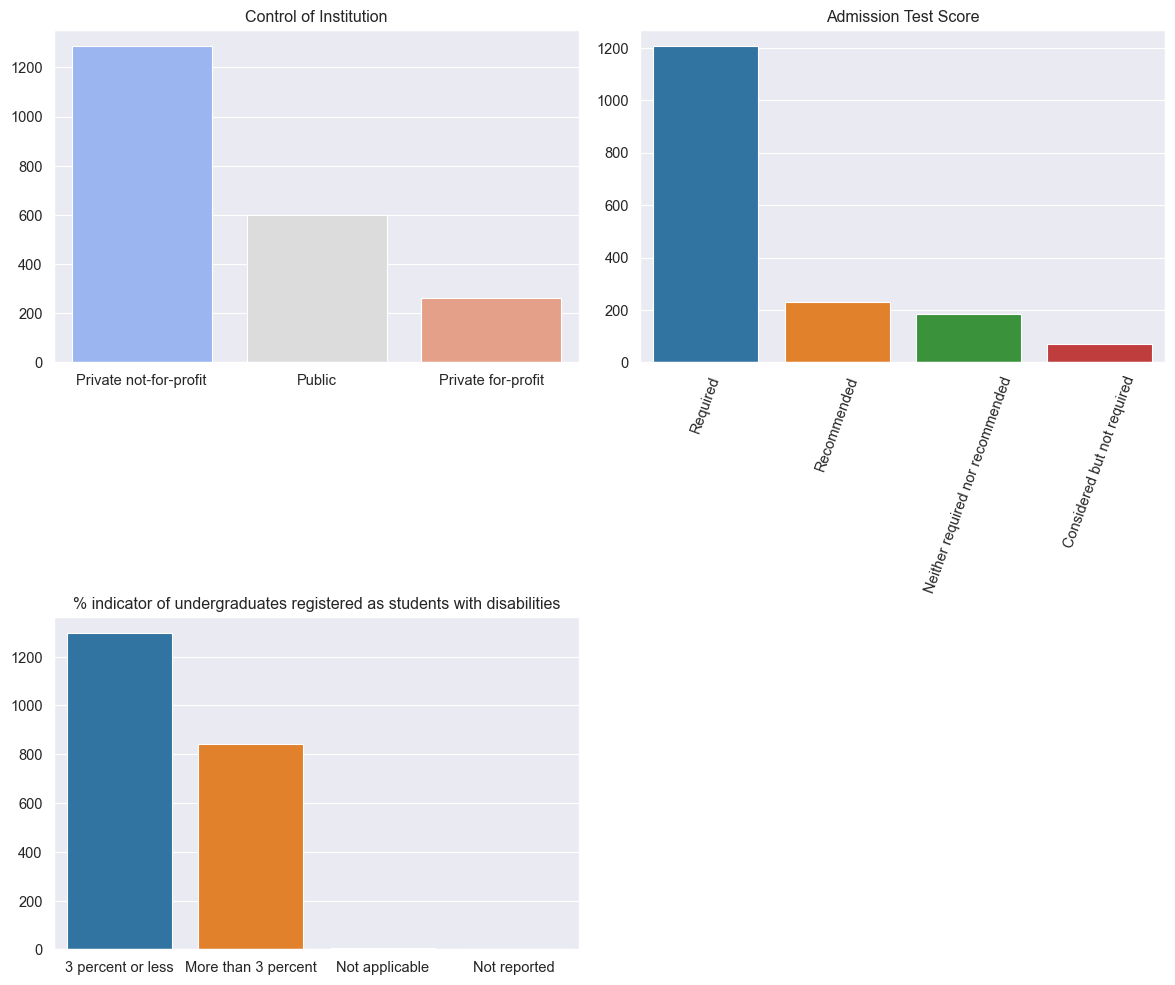

In [61]:
control_of_institutions = all_data['HD2016.Control of institution'].value_counts()
admission_test_scores = all_data['ADM2016_RV.Admission test scores'].value_counts()
disabilities = all_data['IC2016_RV.Percent indicator of undergraduates formally registered as students with disabilities'].value_counts()
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=1.2)
fig, ax = plt.subplots(2,2,figsize=(12,10))

sns.barplot(x=control_of_institutions.index, y=control_of_institutions.values, ax=ax[0,0],palette='coolwarm')
ax[0,0].set_title('Control of Institution')
sns.barplot(x=admission_test_scores.index, y=admission_test_scores.values, ax=ax[0,1])
ax[0,1].set_title('Admission Test Score')
ax[0,1].tick_params(axis='x', rotation=70)
sns.barplot(x=disabilities.index, y=disabilities.values, ax=ax[1,0])
ax[1,0].set_title('% indicator of undergraduates registered as students with disabilities')


plt.tight_layout()
ax[1,1].axis('off')
plt.show()


In [62]:
control_of_institutions

Private not-for-profit    1288
Public                     598
Private for-profit         263
Name: HD2016.Control of institution, dtype: int64

In [63]:
pd.DataFrame(disabilities)

#data for students formally recorded with disability

IC2016_RV.Percent indicator of undergraduates formally registered as students with disabilities
3 percent or less                                                 1298                                              
More than 3 percent                                                844                                              
Not applicable                                                       5                                              
Not reported                                                         2

##### SAT & CAT SCORES

In [64]:
all_data['ADM2016_RV.Percent of first-time degree/certificate-seeking students submitting SAT scores'].isna().sum()

#

878

In [65]:
all_data['ADM2016_RV.Percent of first-time degree/certificate-seeking students submitting SAT scores'].notnull().sum()

#

1271

In [66]:
all_data['ADM2016_RV.Percent of first-time degree/certificate-seeking students submitting ACT scores'].isna().sum()

877

In [67]:
all_data['ADM2016_RV.Percent of first-time degree/certificate-seeking students submitting ACT scores'].notnull().sum()

1272

In [68]:
all_data.loc[all_data['ADM2016_RV.Percent of first-time degree/certificate-seeking students submitting SAT scores'].isna(),
         ['ADM2016_RV.Admission test scores',
          'ADM2016_RV.Percent of first-time degree/certificate-seeking students submitting SAT scores', 
         'ADM2016_RV.Percent of first-time degree/certificate-seeking students submitting ACT scores']]['ADM2016_RV.Admission test scores'].value_counts()

Recommended                         232
Neither required nor recommended    183
Considered but not required           4
Required                              2
Name: ADM2016_RV.Admission test scores, dtype: int64

In [69]:
all_data.loc[:,
         ['ADM2016_RV.Admission test scores',
          'ADM2016_RV.Percent of first-time degree/certificate-seeking students submitting SAT scores', 
         'ADM2016_RV.Percent of first-time degree/certificate-seeking students submitting ACT scores']].isna().sum()

ADM2016_RV.Admission test scores                                                              457
ADM2016_RV.Percent of first-time degree/certificate-seeking students submitting SAT scores    878
ADM2016_RV.Percent of first-time degree/certificate-seeking students submitting ACT scores    877
dtype: int64

In [70]:
all_data['ADM2016_RV.Number of first-time degree/certificate-seeking students submitting SAT scores'].isna().sum()

878

In [71]:
all_data['ADM2016_RV.Number of first-time degree/certificate-seeking students submitting SAT scores'].notnull().sum()

1271

In [72]:
all_data['ADM2016_RV.Number of first-time degree/certificate-seeking students submitting ACT scores'].isna().sum()

877

In [73]:
all_data['ADM2016_RV.Number of first-time degree/certificate-seeking students submitting ACT scores'].notnull().sum()

1272

In [74]:
all_data.loc[all_data['ADM2016_RV.Number of first-time degree/certificate-seeking students submitting SAT scores'].isna(),
         ['ADM2016_RV.Admission test scores',
          'ADM2016_RV.Number of first-time degree/certificate-seeking students submitting SAT scores', 
         'ADM2016_RV.Number of first-time degree/certificate-seeking students submitting ACT scores']].isna().sum()

ADM2016_RV.Admission test scores                                                             457
ADM2016_RV.Number of first-time degree/certificate-seeking students submitting SAT scores    878
ADM2016_RV.Number of first-time degree/certificate-seeking students submitting ACT scores    876
dtype: int64

In [75]:
all_data.loc[:,
         ['ADM2016_RV.Admission test scores',
          'ADM2016_RV.Number of first-time degree/certificate-seeking students submitting SAT scores', 
         'ADM2016_RV.Number of first-time degree/certificate-seeking students submitting ACT scores']].isna().sum()

ADM2016_RV.Admission test scores                                                             457
ADM2016_RV.Number of first-time degree/certificate-seeking students submitting SAT scores    878
ADM2016_RV.Number of first-time degree/certificate-seeking students submitting ACT scores    877
dtype: int64

In [76]:
all_data['ADM2016_RV.ACT Composite 25th percentile score'].isna().sum()

904

In [77]:
all_data['ADM2016_RV.ACT Composite 75th percentile score'].isna().sum()

904

In [78]:
composite_scores = all_data[['ADM2016_RV.ACT Composite 25th percentile score',
                              'ADM2016_RV.ACT Composite 75th percentile score']].rename({'ADM2016_RV.ACT Composite 25th percentile score':'composite_25',
                                                                                        'ADM2016_RV.ACT Composite 75th percentile score':'composite_75'},axis=1)
composite_scores.head(3)

composite_25  composite_75
0          16.0          19.0
1          21.0          28.0
2           NaN           NaN

In [79]:
#THIS SHOULD COME AFTER VALUE_PLOT
#Students submitting test scores
#878 schools did not have data for percentage and number of first time degree students submitting SAT scores
#877 schools did not have data for percentage and number of first time degree students submitting ACT scores
#904 schools did not have data for ACT Composite 75th and 25th percentile score
#ACT will be used because it has the composite scores, unlike SAT scores

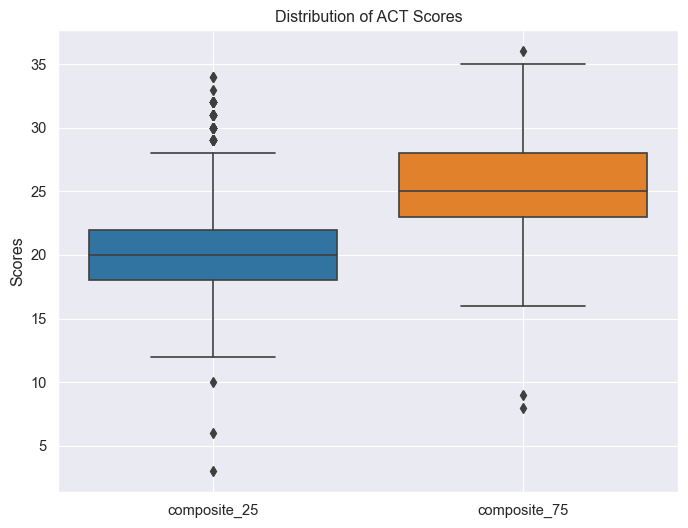

In [80]:
#composite_scores.boxplot(color='red')
#plt.grid(False)
#plt.show()
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=1.2)
plt.figure(figsize=(8,6))
sns.boxplot(composite_scores, palette='tab10')
plt.grid(True)
plt.title('Distribution of ACT Scores')
plt.ylabel('Scores')
plt.show()

In [81]:
composite_scores.mean()

composite_25    20.561446
composite_75    25.770281
dtype: float64

In [82]:
composite_scores.max()

composite_25    34.0
composite_75    36.0
dtype: float64

In [83]:
composite_scores.min()

composite_25    3.0
composite_75    8.0
dtype: float64

In [84]:
composite_scores.nsmallest(n=2,columns='composite_75',keep='all')

composite_25  composite_75
867            3.0           8.0
1917           6.0           9.0

In [85]:
composite_scores.nlargest(n=10,columns='composite_25')

composite_25  composite_75
74            34.0          36.0
1081          34.0          35.0
662           33.0          35.0
114           32.0          35.0
224           32.0          35.0
351           32.0          35.0
392           32.0          34.0
449           32.0          35.0
602           32.0          34.0
651           32.0          35.0

##### distribution of the dependent variables: graduation rate and retention rates

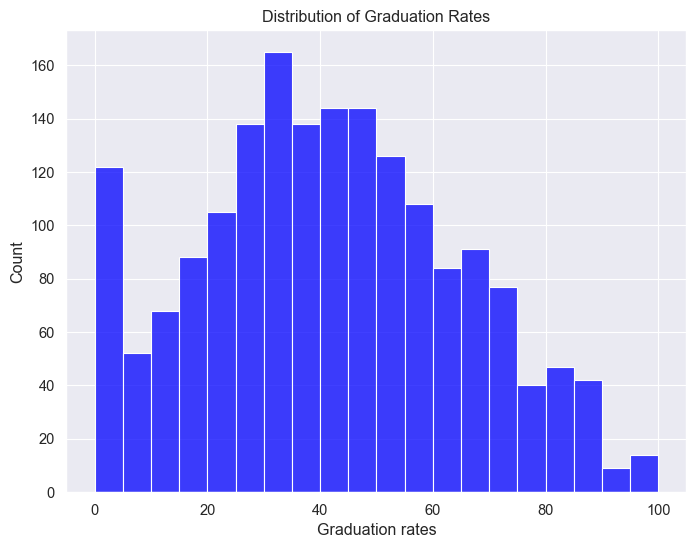

In [86]:
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=1.2)
plt.figure(figsize=(8,6))
sns.histplot(all_data['grad_rate_2022_undergrad'], color='blue')
plt.title('Distribution of Graduation Rates')
plt.xlabel('Graduation rates')
plt.show()

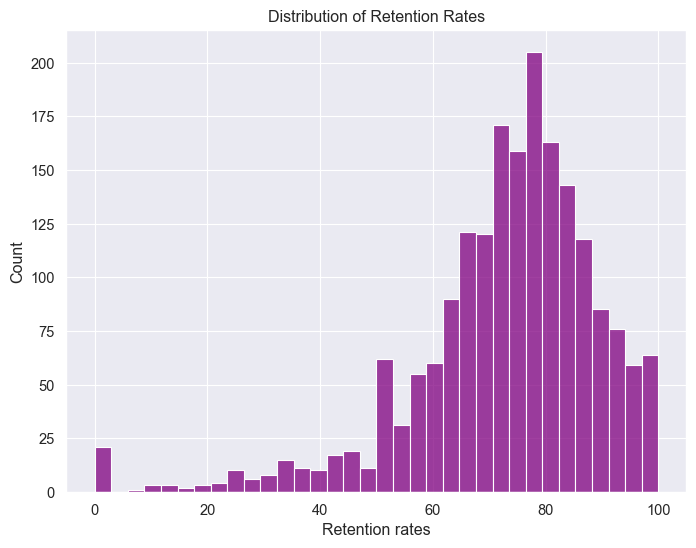

In [87]:
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=1.2)
plt.figure(figsize=(8,6))
sns.histplot(all_data['EF2017D_RV.Full-time retention rate, 2017'], color='purple')
plt.title('Distribution of Retention Rates')
plt.xlabel('Retention rates')
plt.show()

In [88]:
all_data['EF2017D_RV.Full-time retention rate, 2017'].describe()

count    1926.000000
mean       72.870717
std        17.192188
min         0.000000
25%        65.250000
50%        76.000000
75%        84.000000
max       100.000000
Name: EF2017D_RV.Full-time retention rate, 2017, dtype: float64

In [89]:
all_data[all_data['HD2016.Control of institution']=='Public']['EF2017D_RV.Full-time retention rate, 2017'].mean()

75.80104712041884

In [90]:
all_data[all_data['HD2016.Control of institution']=='Private not-for-profit']['EF2017D_RV.Full-time retention rate, 2017'].mean()

74.55687606112055

In [91]:
all_data[all_data['HD2016.Control of institution']=='Private for-profit']['EF2017D_RV.Full-time retention rate, 2017'].mean()

51.925714285714285

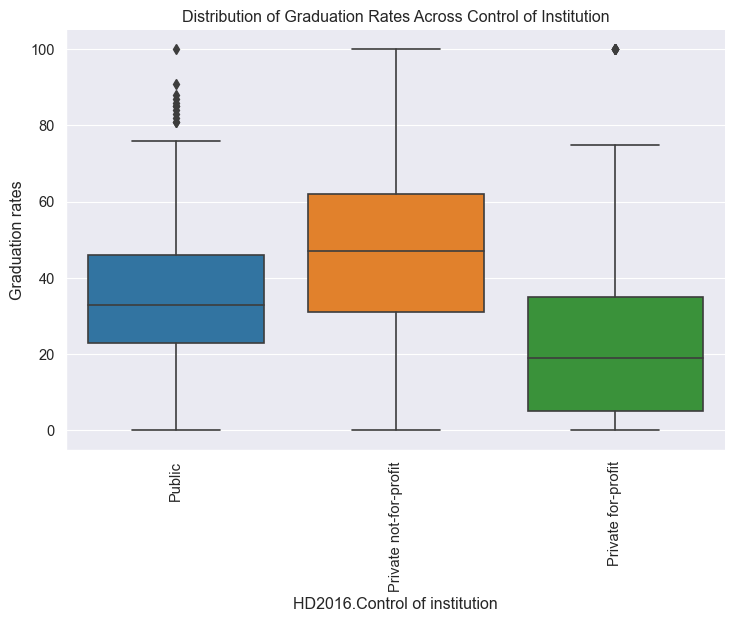

In [92]:
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=1.2)
sns.catplot(kind='box', 
            data=all_data, 
            x='HD2016.Control of institution', 
            y='grad_rate_2022_undergrad', height=5, aspect=1.5)
plt.xticks(rotation=90)
plt.title('Distribution of Graduation Rates Across Control of Institution')
plt.ylabel('Graduation rates')

plt.show()

In [93]:
all_data[all_data['HD2016.Control of institution']=='Public']['grad_rate_2022_undergrad'].mean()

35.883720930232556

In [94]:
all_data[all_data['HD2016.Control of institution']=='Private not-for-profit']['grad_rate_2022_undergrad'].mean()

45.488434163701065

In [95]:
all_data[all_data['HD2016.Control of institution']=='Private for-profit']['grad_rate_2022_undergrad'].mean()

26.57983193277311

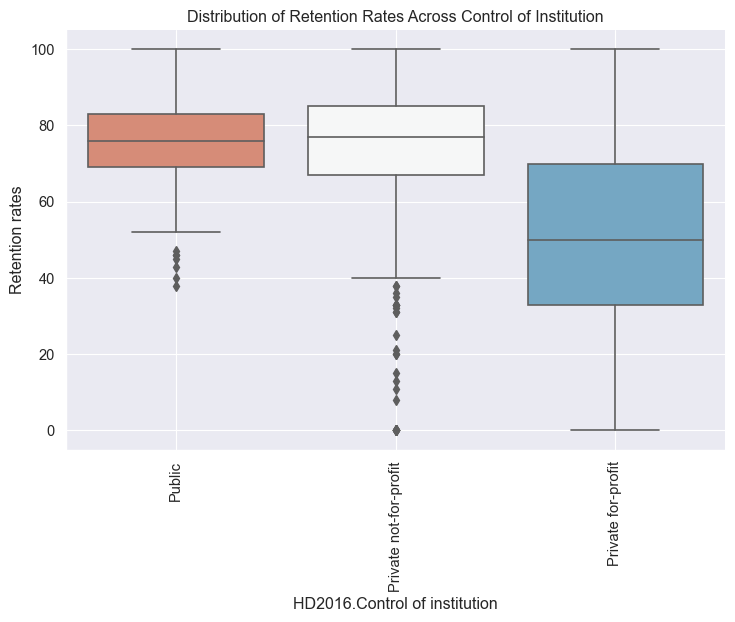

In [96]:
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=1.2)
sns.catplot(kind='box', 
            data=all_data, 
            x='HD2016.Control of institution', 
            y='EF2017D_RV.Full-time retention rate, 2017', palette='RdBu', height=5, aspect=1.5)
plt.title('Distribution of Retention Rates Across Control of Institution',)
plt.grid(True)
plt.xticks(rotation=90)
plt.ylabel('Retention rates')

plt.show()

##### histogram and scatterplot

In [97]:
variables_1 = ['grad_rate_2022_undergrad',
              'EF2017D_RV.Full-time retention rate, 2017',
              'EF2016D_RV.Student-to-faculty ratio',
              'DRVHR2016_RV.Total FTE staff', 
               'DRVHR2016_RV.Instructional FTE', 
               'ADM2016_RV.ACT Composite 25th percentile score', 
               'ADM2016_RV.ACT Composite 75th percentile score']

In [98]:
hist_1 = all_data[variables_1].rename({'grad_rate_2022_undergrad':'grad_rate', 
                                'EF2017D_RV.Full-time retention rate, 2017':'ret_rate', 
                                'EF2016D_RV.Student-to-faculty ratio':'stu_facu_ratio', 
                                'DRVHR2016_RV.Total FTE staff':'tot_fte_staff', 
                                'DRVHR2016_RV.Instructional FTE':'instruct_fte', 
                                'ADM2016_RV.ACT Composite 25th percentile score':'ACT_25th', 
                                'ADM2016_RV.ACT Composite 75th percentile score':'ACT_75th'},axis=1)

In [99]:
from pandas.plotting import scatter_matrix

In [100]:
sns.reset_defaults()

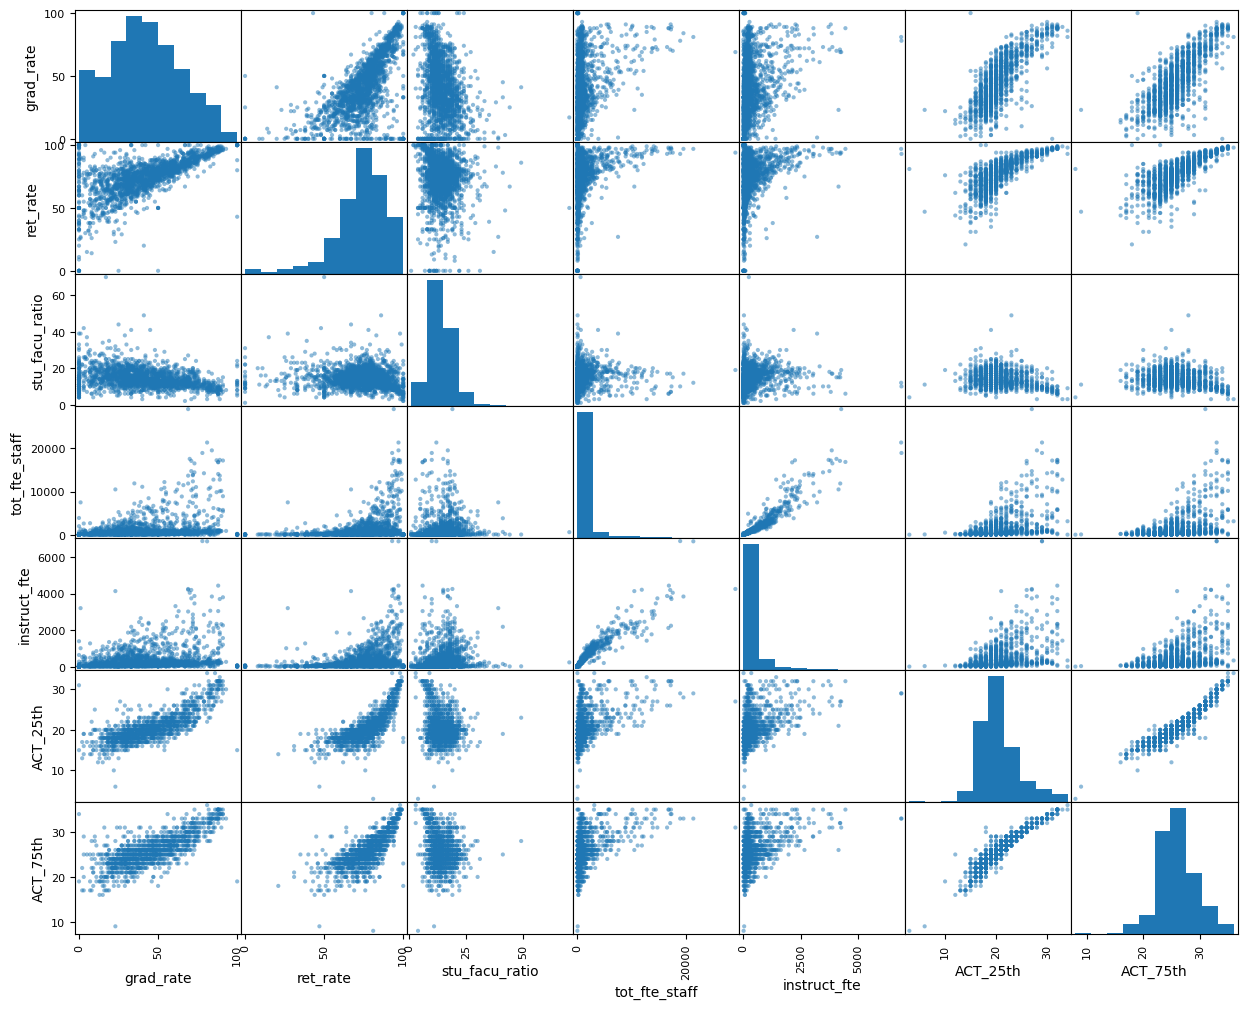

In [101]:
scatter_matrix(hist_1,figsize=(15,12))
plt.show()

#there are some variables that are correlated

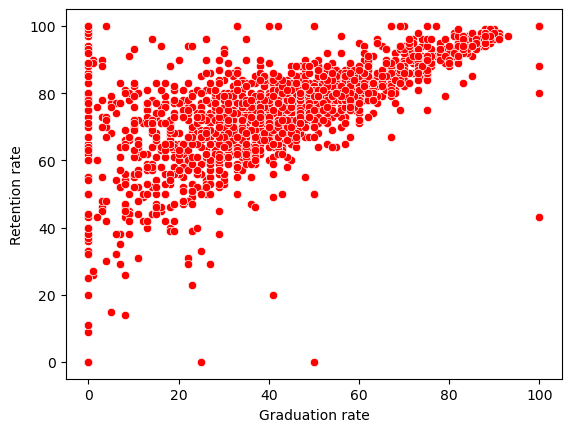

In [102]:
sns.scatterplot(data=all_data, 
               x='grad_rate_2022_undergrad',
               y='EF2017D_RV.Full-time retention rate, 2017', c='red')
plt.xlabel('Graduation rate')
plt.ylabel('Retention rate')
plt.show()

In [103]:
variables_2 = ['tuition&fees', 
               'tot_revenue', 
               'research_amt', 
               'stu_serv_amt', 
               'total_expenses', 
               'totalamt_FA']

In [104]:
hist_2 = all_data[variables_2]

In [105]:
hist_2 = hist_2/1000000

#in millions

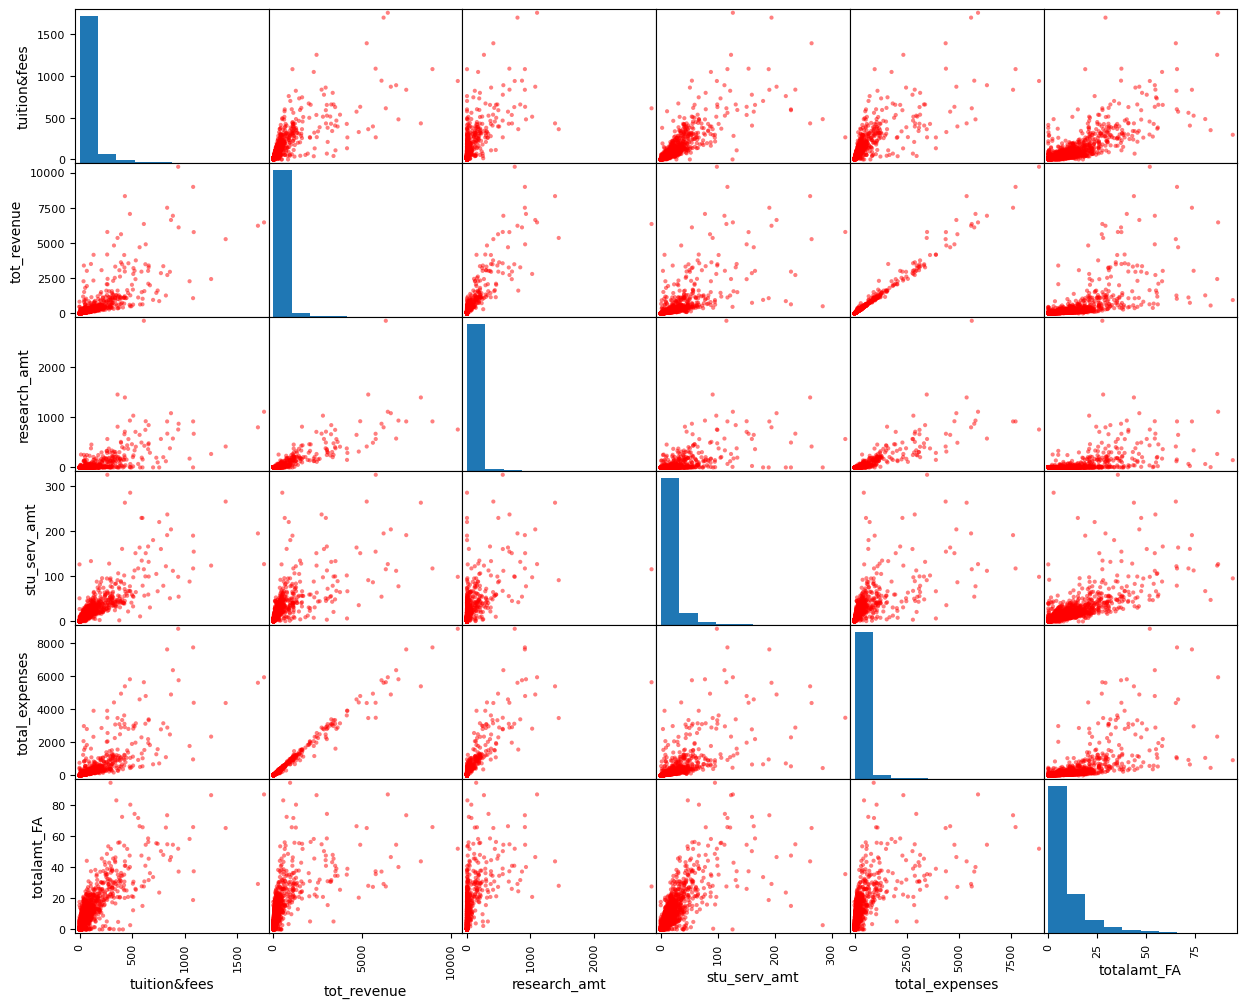

In [106]:
scatter_matrix(hist_2,figsize=(15,12),c='r')
plt.show()

In [107]:
all_data.corr(numeric_only=True)

unitid  \
unitid                                              1.000000   
grad_rate_2022_undergrad                           -0.236031   
HD2016.Longitude location of institution           -0.031291   
HD2016.Latitude location of institution            -0.116705   
IC2016_RV.Percent of undergraduates, who are fo...  0.012446   
...                                                      ...   
totFTFTundergrad_awarded_FA                        -0.215873   
percent_of_FTFT_awarded_FA                         -0.149602   
totalamt_FA                                        -0.263675   
FTEq_enrol_undergrad16-17                          -0.176001   
EF2017D_RV.Full-time retention rate, 2017          -0.228749   

                                                    grad_rate_2022_undergrad  \
unitid                                                             -0.236031   
grad_rate_2022_undergrad                                            1.000000   
HD2016.Longitude location of institution                            0.019513   
HD2016.Latitude location of institution                             0.235073   
IC2016_RV.Percent of undergraduates, who are fo...                  0.189772   
...                                                                      ...   
totFTFTundergrad_awarded_FA                                         0.180175   
percent_of_FTFT_awarded_FA                                         -0.060257   
totalamt_FA                                                         0.435164   
FTEq_enrol_undergrad16-17                                           0.116029   
EF2017D_RV.Full-time retention rate, 2017                           0.623425   

                                                    HD2016.Longitude location of institution  \
unitid                                                                             -0.031291   
grad_rate_2022_undergrad                                                            0.019513   
HD2016.Longitude location of institution                                            1.000000   
HD2016.Latitude location of institution                                            -0.028861   
IC2016_RV.Percent of undergraduates, who are fo...                                  0.074774   
...                                                                                      ...   
totFTFTundergrad_awarded_FA                                                        -0.049454   
percent_of_FTFT_awarded_FA                                                          0.010591   
totalamt_FA                                                                        -0.000160   
FTEq_enrol_undergrad16-17                                                          -0.063496   
EF2017D_RV.Full-time retention rate, 2017                                           0.075875   

                                                    HD2016.Latitude location of institution  \
unitid                                                                            -0.116705   
grad_rate_2022_undergrad                                                           0.235073   
HD2016.Longitude location of institution                                          -0.028861   
HD2016.Latitude location of institution                                            1.000000   
IC2016_RV.Percent of undergraduates, who are fo...                                 0.035353   
...                                                                                     ...   
totFTFTundergrad_awarded_FA                                                       -0.032911   
percent_of_FTFT_awarded_FA                                                         0.020146   
totalamt_FA                                                                        0.048931   
FTEq_enrol_undergrad16-17                                                         -0.035055   
EF2017D_RV.Full-time retention rate, 2017                                          0.122283   

                              

In [108]:
correlations = all_data[['grad_rate_2022_undergrad',
                  'HD2016.Longitude location of institution',
                  'HD2016.Latitude location of institution',
                 #'IC2016_RV.Percent of undergraduates, who are formally registered as students with disabilities, when percentage is more than 3 percent',
                 #'EF2016D_RV.Full-time first-time degree/certificate-seeking undergraduate (current year GRS cohort)',
                 'EF2016D_RV.Current year GRS cohort as a percent of entering class',
                  'EF2017D_RV.Full-time retention rate, 2017',
                 'EF2016D_RV.Student-to-faculty ratio',
                  'DRVHR2016_RV.Total FTE staff',
                  'DRVHR2016_RV.Instructional FTE',
                  'ADM2016_RV.Admission test scores',
                  'ADM2016_RV.Enrolled full time total',
                  #'ADM2016_RV.Number of first-time degree/certificate-seeking students submitting ACT scores',
                 #'ADM2016_RV.Percent of first-time degree/certificate-seeking students submitting ACT scores',
                 'ADM2016_RV.ACT Composite 25th percentile score',
                  'ADM2016_RV.ACT Composite 75th percentile score',
                 'AC_grandtotal',
                  'tuition&fees',
                  'tot_revenue',
                  'research_amt',
                  'stu_serv_amt',
                  'total_expenses','totalamt_FA']].corr(numeric_only=True)

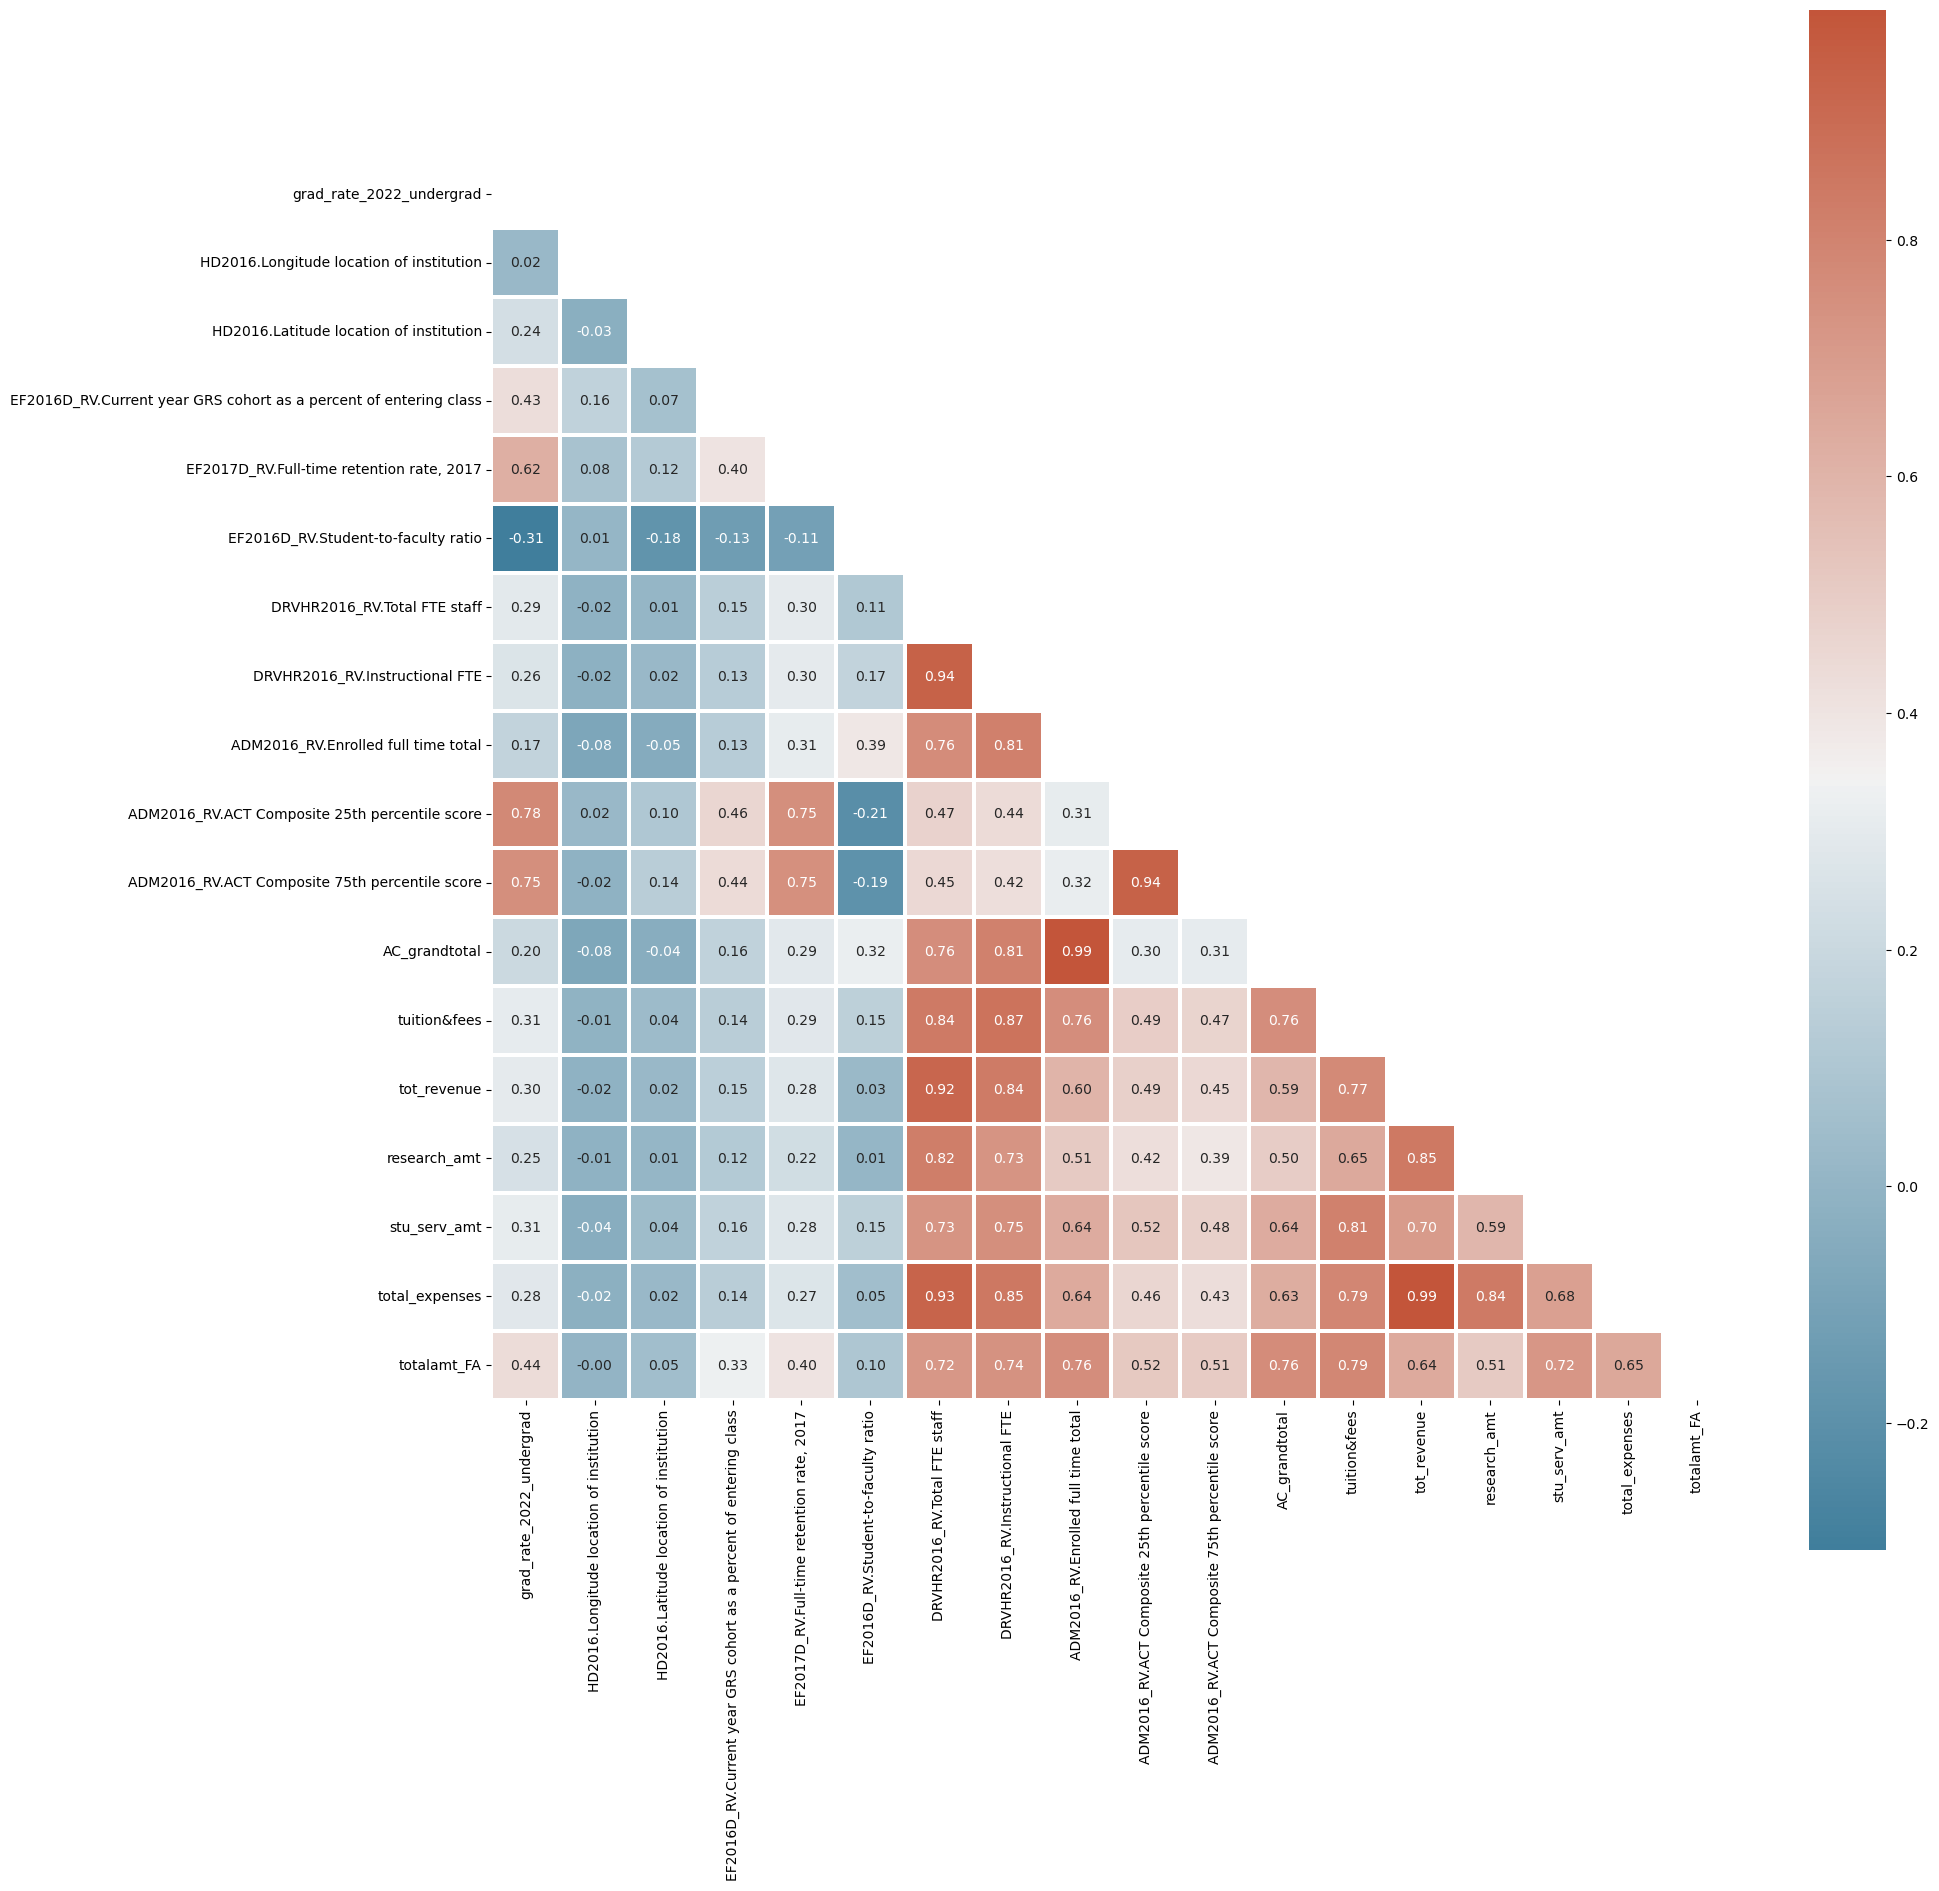

In [109]:
#sns.set_style("white")
#sns.set_context("paper", font_scale=1.2)
sns.reset_defaults()
mask = np.triu(np.ones_like(correlations))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.figure(figsize=(20,20))
sns.heatmap(correlations, 
            mask=mask,square=True, 
            fmt='.2f', annot=True, 
            linecolor='white',
            linewidths=1.5, 
            cmap=cmap)
plt.show()

In [110]:
pd.set_option('display.float_format','{:.1f}'.format)
all_data[['grad_rate_2022_undergrad',
                  'HD2016.Longitude location of institution',
                  'HD2016.Latitude location of institution',
                 'IC2016_RV.Percent of undergraduates, who are formally registered as students with disabilities, when percentage is more than 3 percent',
                 'EF2016D_RV.Full-time first-time degree/certificate-seeking undergraduate (current year GRS cohort)',
                 'EF2016D_RV.Current year GRS cohort as a percent of entering class',
                  'EF2017D_RV.Full-time retention rate, 2017',
                 'EF2016D_RV.Student-to-faculty ratio',
                  'DRVHR2016_RV.Total FTE staff',
                  'DRVHR2016_RV.Instructional FTE',
                  'ADM2016_RV.Admission test scores',
                  'ADM2016_RV.Enrolled full time total',
                  'ADM2016_RV.Number of first-time degree/certificate-seeking students submitting ACT scores',
                 'ADM2016_RV.Percent of first-time degree/certificate-seeking students submitting ACT scores',
                 'ADM2016_RV.ACT Composite 25th percentile score',
                  'ADM2016_RV.ACT Composite 75th percentile score',
                 'AC_grandtotal',
                  'tuition&fees',
                  'tot_revenue',
                  'research_amt',
                  'stu_serv_amt',
                  'total_expenses','totalamt_FA']].describe().T

count        mean  \
grad_rate_2022_undergrad                           1802.0        41.3   
HD2016.Longitude location of institution           2149.0       -88.8   
HD2016.Latitude location of institution            2149.0        38.0   
IC2016_RV.Percent of undergraduates, who are fo...  844.0         7.5   
EF2016D_RV.Full-time first-time degree/certific... 1910.0       825.2   
EF2016D_RV.Current year GRS cohort as a percent... 1910.0        60.1   
EF2017D_RV.Full-time retention rate, 2017          1926.0        72.9   
EF2016D_RV.Student-to-faculty ratio                2139.0        13.7   
DRVHR2016_RV.Total FTE staff                       2140.0      1049.7   
DRVHR2016_RV.Instructional FTE                     2140.0       326.5   
ADM2016_RV.Enrolled full time total                1679.0       908.3   
ADM2016_RV.Number of first-time degree/certific... 1272.0       652.7   
ADM2016_RV.Percent of first-time degree/certifi... 1272.0        59.1   
ADM2016_RV.ACT Composite 25th percentile score     1245.0        20.6   
ADM2016_RV.ACT Composite 75th percentile score     1245.0        25.8   
AC_grandtotal                                      1811.0       870.5   
tuition&fees                                       2149.0  67890009.7   
tot_revenue                                        2149.0 249274824.0   
research_amt                                       2149.0  25348392.2   
stu_serv_amt                                       2149.0  14662820.5   
total_expenses                                     2149.0 221550147.7   
totalamt_FA                                        1946.0   8429135.8   

                                                           std    min  \
grad_rate_2022_undergrad                                  23.1    0.0   
HD2016.Longitude location of institution                  16.6 -158.1   
HD2016.Latitude location of institution                    5.7   13.4   
IC2016_RV.Percent of undergraduates, who are fo...         5.0    4.0   
EF2016D_RV.Full-time first-time degree/certific...      1241.2    1.0   
EF2016D_RV.Current year GRS cohort as a percent...        24.8    0.0   
EF2017D_RV.Full-time retention rate, 2017                 17.2    0.0   
EF2016D_RV.Student-to-faculty ratio                        5.5    1.0   
DRVHR2016_RV.Total FTE staff                            2306.1    1.0   
DRVHR2016_RV.Instructional FTE                           568.7    0.0   
ADM2016_RV.Enrolled full time total                     1287.0    0.0   
ADM2016_RV.Number of first-time degree/certific...       996.2    0.0   
ADM2016_RV.Percent of first-time degree/certifi...        29.5    0.0   
ADM2016_RV.ACT Composite 25th percentile score             3.7    3.0   
ADM2016_RV.ACT Composite 75th percentile score             3.6    8.0   
AC_grandtotal                                           1283.8    1.0   
tuition&fees                                       138977165.0    0.0   
tot_revenue                                        763872789.4    0.0   
research_amt                                       123828224.9    0.0   
stu_serv_amt                                        26260403.5    0.0   
total_expenses                                     664352587.6    0.0   
totalamt_FA                                         11301059.8    0.0   

                                                          25%        50%  \
grad_rate_2022_undergrad                                 25.0       40.0   
HD2016.Longitude location of institution                -95.7      -84.8   
HD2016.Latitude location of institution                  34.6       39.5   
IC2016_RV.Percent of undergraduates, who are fo...        5.0        6.0   
EF2016D_RV.Full-time first-time degree/certific...      133.0      383.0   
EF2016D_RV.Current year GRS cohort as a percent...       45.0       64.0   
EF2017D_RV.Full-time retention rate, 2017                65.2       76.0   
EF2016D_RV.Student-to-faculty ratio                      10.0       13.0   
DRVHR201

In [111]:
all_data.columns

Index(['unitid', 'institution name', 'grad_rate_2022_undergrad',
       'HD2016.Control of institution',
       'HD2016.Longitude location of institution',
       'HD2016.Latitude location of institution',
       'IC2016_RV.Percent indicator of undergraduates formally registered as students with disabilities',
       'IC2016_RV.Percent of undergraduates, who are formally registered as students with disabilities, when percentage is more than 3 percent',
       'EF2016D_RV.Full-time first-time degree/certificate-seeking undergraduate (current year GRS cohort)',
       'EF2016D_RV.Total entering students at the undergraduate level, fall 2016',
       'EF2016D_RV.Current year GRS cohort as a percent of entering class',
       'EF2016D_RV.Student-to-faculty ratio', 'DRVHR2016_RV.Total FTE staff',
       'DRVHR2016_RV.Instructional FTE', 'ADM2016_RV.Admission test scores',
       'ADM2016_RV.Applicants men', 'ADM2016_RV.Applicants women',
       'ADM2016_RV.Admissions men', 'ADM2016_RV.Admis

In [112]:
adjusted_cohort = all_data[['unitid', 'institution name',
                            'AC_grandtotal',
                              'AC_totalmen',
                              'AC_totalwomen',
                              'AC_amerIndianAla',
                              'AC_asian',
                              'AC_blackorAfricanAmer',
                              'AC_hispanic',
                              'AC_hawaiiPacific',
                              'AC_white',
                              'AC_two+race',
                              'AC_unknownRace',
                              'AC_us_nonres']]
adjusted_cohort

unitid                       institution name  AC_grandtotal  \
0     100654               Alabama A & M University         1404.0   
1     100663    University of Alabama at Birmingham         1945.0   
2     100690                     Amridge University            2.0   
3     100706    University of Alabama in Huntsville         1193.0   
4     100724               Alabama State University         1143.0   
...      ...                                    ...            ...   
2144  489344  Chamberlain University-North Carolina            1.0   
2145  489353      Chamberlain University-California            NaN   
2146  489779               Purdue University Global           35.0   
2147  489788     Purdue University Global-Milwaukee            NaN   
2148  489937                    Carolina University           28.0   

      AC_totalmen  AC_totalwomen  AC_amerIndianAla  AC_asian  \
0           568.0          836.0               2.0       1.0   
1           728.0         1217.0              11.0     152.0   
2             1.0            1.0               0.0       1.0   
3           726.0          467.0              12.0      49.0   
4           424.0          719.0               2.0       5.0   
...           ...            ...               ...       ...   
2144          0.0            1.0               0.0       0.0   
2145          NaN            NaN               NaN       NaN   
2146         12.0           23.0               0.0       1.0   
2147          NaN            NaN               NaN       NaN   
2148         19.0            9.0               0.0       0.0   

      AC_blackorAfricanAmer  AC_hispanic  AC_hawaiiPacific  AC_white  \
0                    1276.0         15.0               2.0      17.0   
1                     493.0         51.0               1.0    1086.0   
2                       0.0          0.0               0.0       1.0   
3                      81.0         49.0               0.0     929.0   
4                    1081.0          8.0               0.0      16.0   
...                     ...          ...               ...       ...   
2144                    0.0          0.0               0.0       1.0   
2145                    NaN          NaN               NaN       NaN   
2146                    2.0          2.0               0.0      21.0   
2147                    NaN          NaN               NaN       NaN   
2148                    2.0          1.0               0.0       6.0   

      AC_two+race  AC_unknownRace  AC_us_nonres  
0            85.0             1.0           5.0  
1           102.0             6.0          43.0  
2             0.0             0.0           0.0  
3            22.0            23.0          28.0  
4            15.0            10.0           6.0  
...           ...             ...           ...  
2144          0.0             0.0           0.0  
2145          NaN             NaN           NaN  
2146          2.0             6.0           1.0  
2147          NaN             NaN           NaN  
2148          1.0            18.0           0.0  

[2149 rows x 14 columns]

In [113]:
cohort_completers = all_data[['unitid', 'institution name',
                              'CC_grandtotal',
                              'CC_totalmen',
                              'CC_totalwomen',
                              'CC_amerIndianAla',
                              'CC_asian',
                              'CC_blackorAfricanAmer',
                              'CC_hispanic',
                              'CC_hawaiiPacific',
                              'CC_white',
                              'CC_two+race',
                              'CC_unknownRace',
                              'CC_us_nonres']]
cohort_completers

unitid                       institution name  CC_grandtotal  \
0     100654               Alabama A & M University          178.0   
1     100663    University of Alabama at Birmingham          857.0   
2     100690                     Amridge University            1.0   
3     100706    University of Alabama in Huntsville          465.0   
4     100724               Alabama State University          156.0   
...      ...                                    ...            ...   
2144  489344  Chamberlain University-North Carolina            1.0   
2145  489353      Chamberlain University-California            NaN   
2146  489779               Purdue University Global            1.0   
2147  489788     Purdue University Global-Milwaukee            NaN   
2148  489937                    Carolina University            8.0   

      CC_totalmen  CC_totalwomen  CC_amerIndianAla  CC_asian  \
0            34.0          144.0               0.0       0.0   
1           267.0          590.0               3.0     108.0   
2             0.0            1.0               0.0       0.0   
3           247.0          218.0               4.0      18.0   
4            35.0          121.0               1.0       2.0   
...           ...            ...               ...       ...   
2144          0.0            1.0               0.0       0.0   
2145          NaN            NaN               NaN       NaN   
2146          1.0            0.0               0.0       0.0   
2147          NaN            NaN               NaN       NaN   
2148          5.0            3.0               0.0       0.0   

      CC_blackorAfricanAmer  CC_hispanic  CC_hawaiiPacific  CC_white  \
0                     157.0          4.0               0.0       1.0   
1                     141.0         17.0               1.0     520.0   
2                       0.0          0.0               0.0       1.0   
3                      16.0         16.0               0.0     378.0   
4                     139.0          1.0               0.0       5.0   
...                     ...          ...               ...       ...   
2144                    0.0          0.0               0.0       1.0   
2145                    NaN          NaN               NaN       NaN   
2146                    0.0          0.0               0.0       1.0   
2147                    NaN          NaN               NaN       NaN   
2148                    1.0          1.0               0.0       6.0   

      CC_two+race  CC_unknownRace  CC_us_nonres  
0            11.0             0.0           5.0  
1            43.0             3.0          21.0  
2             0.0             0.0           0.0  
3             7.0            11.0          15.0  
4             1.0             3.0           4.0  
...           ...             ...           ...  
2144          0.0             0.0           0.0  
2145          NaN             NaN           NaN  
2146          0.0             0.0           0.0  
2147          NaN             NaN           NaN  
2148          0.0             0.0           0.0  

[2149 rows x 14 columns]

##### grandtotal: completers vs non completers

In [114]:
#Percent of completers
print(f"completers total: {round(cohort_completers['CC_grandtotal'].sum()/adjusted_cohort['AC_grandtotal'].sum()*100, 1)} %")

#47.2% persons completed in 2016

completers total: 47.2 %


In [115]:
#percent of non graduates
print(f"non completers total: {round((adjusted_cohort['AC_grandtotal']-cohort_completers['CC_grandtotal']).sum()/adjusted_cohort['AC_grandtotal'].sum()*100,1)} %")

non completers total: 52.4 %


In [116]:
#47.2 + 52.4 = 99.6%

##### men: completers vs non completers

In [117]:
print(f"completers men: {round(cohort_completers['CC_totalmen'].sum()/adjusted_cohort['AC_totalmen'].sum()*100, 1)} %")

#41.8% of men completed

completers men: 41.8 %


In [118]:
#non completers men
print(f"non completers men: {round((adjusted_cohort['AC_totalmen']-cohort_completers['CC_totalmen']).sum()/adjusted_cohort['AC_totalmen'].sum()*100,1)} %")

non completers men: 57.7 %


In [119]:
#41.8 + 57.7 = 99.5

In [120]:
print(f"completers women: {round(cohort_completers['CC_totalwomen'].sum()/adjusted_cohort['AC_totalwomen'].sum()*100, 1)} %")

#51.6% of women completed 

completers women: 51.6 %


In [121]:
#non graduates women
print(f"non completers women: {round((adjusted_cohort['AC_totalwomen']-cohort_completers['CC_totalwomen']).sum()/adjusted_cohort['AC_totalwomen'].sum()*100,1)} %")

non completers women: 48.1 %


In [122]:
#51.6 + 48.1 = 99.7%

###### further investigation

In [123]:
adjusted_cohort['ac_total'] = adjusted_cohort.loc[:,'AC_totalmen'] + adjusted_cohort.loc[:,'AC_totalwomen']

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1744\3305434840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adjusted_cohort['ac_total'] = adjusted_cohort.loc[:,'AC_totalmen'] + adjusted_cohort.loc[:,'AC_totalwomen']


In [124]:
adjusted_cohort[['AC_grandtotal','ac_total']]

AC_grandtotal  ac_total
0            1404.0    1404.0
1            1945.0    1945.0
2               2.0       2.0
3            1193.0    1193.0
4            1143.0    1143.0
...             ...       ...
2144            1.0       1.0
2145            NaN       NaN
2146           35.0      35.0
2147            NaN       NaN
2148           28.0      28.0

[2149 rows x 2 columns]

In [125]:
sum_check = adjusted_cohort['AC_grandtotal']==adjusted_cohort['ac_total']

In [126]:
adjusted_cohort[sum_check]

unitid                               institution name  AC_grandtotal  \
0     100654                       Alabama A & M University         1404.0   
1     100663            University of Alabama at Birmingham         1945.0   
2     100690                             Amridge University            2.0   
3     100706            University of Alabama in Huntsville         1193.0   
4     100724                       Alabama State University         1143.0   
...      ...                                            ...            ...   
2139  488448                         Seattle Film Institute            6.0   
2140  488679  Indiana Wesleyan University-National & Global         1091.0   
2144  489344          Chamberlain University-North Carolina            1.0   
2146  489779                       Purdue University Global           35.0   
2148  489937                            Carolina University           28.0   

      AC_totalmen  AC_totalwomen  AC_amerIndianAla  AC_asian  \
0           568.0          836.0               2.0       1.0   
1           728.0         1217.0              11.0     152.0   
2             1.0            1.0               0.0       1.0   
3           726.0          467.0              12.0      49.0   
4           424.0          719.0               2.0       5.0   
...           ...            ...               ...       ...   
2139          6.0            0.0               0.0       0.0   
2140        362.0          729.0               2.0       8.0   
2144          0.0            1.0               0.0       0.0   
2146         12.0           23.0               0.0       1.0   
2148         19.0            9.0               0.0       0.0   

      AC_blackorAfricanAmer  AC_hispanic  AC_hawaiiPacific  AC_white  \
0                    1276.0         15.0               2.0      17.0   
1                     493.0         51.0               1.0    1086.0   
2                       0.0          0.0               0.0       1.0   
3                      81.0         49.0               0.0     929.0   
4                    1081.0          8.0               0.0      16.0   
...                     ...          ...               ...       ...   
2139                    0.0          1.0               0.0       5.0   
2140                  393.0         51.0               2.0     576.0   
2144                    0.0          0.0               0.0       1.0   
2146                    2.0          2.0               0.0      21.0   
2148                    2.0          1.0               0.0       6.0   

      AC_two+race  AC_unknownRace  AC_us_nonres  ac_total  
0            85.0             1.0           5.0    1404.0  
1           102.0             6.0          43.0    1945.0  
2             0.0             0.0           0.0       2.0  
3            22.0            23.0          28.0    1193.0  
4            15.0            10.0           6.0    1143.0  
...           ...             ...           ...       ...  
2139          0.0             0.0           0.0       6.0  
2140         49.0             7.0           3.0    1091.0  
2144          0.0             0.0           0.0       1.0  
2146          2.0             6.0           1.0      35.0  
2148          1.0            18.0           0.0      28.0  

[1811 rows x 15 columns]

In [127]:
#filtered data where Ac_grandtotal and ac_total are both null or unequal values
adjusted_cohort[~sum_check].isna().sum()

unitid                     0
institution name           0
AC_grandtotal            338
AC_totalmen              338
AC_totalwomen            338
AC_amerIndianAla         338
AC_asian                 338
AC_blackorAfricanAmer    338
AC_hispanic              338
AC_hawaiiPacific         338
AC_white                 338
AC_two+race              338
AC_unknownRace           338
AC_us_nonres             338
ac_total                 338
dtype: int64

In [128]:
adjusted_cohort[~sum_check]

unitid                                   institution name  \
6     100812                            Athens State University   
15    101541                                     Judson College   
23    102058                                   Selma University   
26    102261                         Southeastern Bible College   
31    102395                       United States Sports Academy   
...      ...                                                ...   
2141  488819                  The Colburn Conservatory of Music   
2142  488855               Wellington Shaw Christian University   
2143  489104  National American University-Westwood Teach-Ou...   
2145  489353                  Chamberlain University-California   
2147  489788                 Purdue University Global-Milwaukee   

      AC_grandtotal  AC_totalmen  AC_totalwomen  AC_amerIndianAla  AC_asian  \
6               NaN          NaN            NaN               NaN       NaN   
15              NaN          NaN            NaN               NaN       NaN   
23              NaN          NaN            NaN               NaN       NaN   
26              NaN          NaN            NaN               NaN       NaN   
31              NaN          NaN            NaN               NaN       NaN   
...             ...          ...            ...               ...       ...   
2141            NaN          NaN            NaN               NaN       NaN   
2142            NaN          NaN            NaN               NaN       NaN   
2143            NaN          NaN            NaN               NaN       NaN   
2145            NaN          NaN            NaN               NaN       NaN   
2147            NaN          NaN            NaN               NaN       NaN   

      AC_blackorAfricanAmer  AC_hispanic  AC_hawaiiPacific  AC_white  \
6                       NaN          NaN               NaN       NaN   
15                      NaN          NaN               NaN       NaN   
23                      NaN          NaN               NaN       NaN   
26                      NaN          NaN               NaN       NaN   
31                      NaN          NaN               NaN       NaN   
...                     ...          ...               ...       ...   
2141                    NaN          NaN               NaN       NaN   
2142                    NaN          NaN               NaN       NaN   
2143                    NaN          NaN               NaN       NaN   
2145                    NaN          NaN               NaN       NaN   
2147                    NaN          NaN               NaN       NaN   

      AC_two+race  AC_unknownRace  AC_us_nonres  ac_total  
6             NaN             NaN           NaN       NaN  
15            NaN             NaN           NaN       NaN  
23            NaN             NaN           NaN       NaN  
26            NaN             NaN           NaN       NaN  
31            NaN             NaN           NaN       NaN  
...           ...             ...           ...       ...  
2141          NaN             NaN           NaN       NaN  
2142          NaN             NaN           NaN       NaN  
2143          NaN             NaN           NaN       NaN  
2145          NaN             NaN           NaN       NaN  
2147          NaN             NaN           NaN       NaN  

[338 rows x 15 columns]

In [129]:
adjusted_cohort[sum_check]['AC_grandtotal'].sum()

1576504.0

In [130]:
adjusted_cohort['AC_grandtotal'].sum()

1576504.0

In [131]:
cohort_completers['cc_total'] = (cohort_completers.loc[:,'CC_totalmen'] + cohort_completers.loc[:,'CC_totalwomen'])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1744\254459329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_completers['cc_total'] = (cohort_completers.loc[:,'CC_totalmen'] + cohort_completers.loc[:,'CC_totalwomen'])


In [132]:
cohort_completers[['CC_grandtotal','cc_total']]

CC_grandtotal  cc_total
0             178.0     178.0
1             857.0     857.0
2               1.0       1.0
3             465.0     465.0
4             156.0     156.0
...             ...       ...
2144            1.0       1.0
2145            NaN       NaN
2146            1.0       1.0
2147            NaN       NaN
2148            8.0       8.0

[2149 rows x 2 columns]

In [133]:
sum_check1 = cohort_completers['CC_grandtotal']==cohort_completers['cc_total']

In [134]:
#filtered data where cc_grandtotal and cc_total are both null or unequal values
cohort_completers[~sum_check1].isna().sum()

unitid                     0
institution name           0
CC_grandtotal            444
CC_totalmen              444
CC_totalwomen            444
CC_amerIndianAla         444
CC_asian                 444
CC_blackorAfricanAmer    444
CC_hispanic              444
CC_hawaiiPacific         444
CC_white                 444
CC_two+race              444
CC_unknownRace           444
CC_us_nonres             444
cc_total                 444
dtype: int64

In [135]:
cohort_completers[~sum_check1]

unitid                                   institution name  \
6     100812                            Athens State University   
13    101453                      Heritage Christian University   
15    101541                                     Judson College   
23    102058                                   Selma University   
26    102261                         Southeastern Bible College   
...      ...                                                ...   
2141  488819                  The Colburn Conservatory of Music   
2142  488855               Wellington Shaw Christian University   
2143  489104  National American University-Westwood Teach-Ou...   
2145  489353                  Chamberlain University-California   
2147  489788                 Purdue University Global-Milwaukee   

      CC_grandtotal  CC_totalmen  CC_totalwomen  CC_amerIndianAla  CC_asian  \
6               NaN          NaN            NaN               NaN       NaN   
13              NaN          NaN            NaN               NaN       NaN   
15              NaN          NaN            NaN               NaN       NaN   
23              NaN          NaN            NaN               NaN       NaN   
26              NaN          NaN            NaN               NaN       NaN   
...             ...          ...            ...               ...       ...   
2141            NaN          NaN            NaN               NaN       NaN   
2142            NaN          NaN            NaN               NaN       NaN   
2143            NaN          NaN            NaN               NaN       NaN   
2145            NaN          NaN            NaN               NaN       NaN   
2147            NaN          NaN            NaN               NaN       NaN   

      CC_blackorAfricanAmer  CC_hispanic  CC_hawaiiPacific  CC_white  \
6                       NaN          NaN               NaN       NaN   
13                      NaN          NaN               NaN       NaN   
15                      NaN          NaN               NaN       NaN   
23                      NaN          NaN               NaN       NaN   
26                      NaN          NaN               NaN       NaN   
...                     ...          ...               ...       ...   
2141                    NaN          NaN               NaN       NaN   
2142                    NaN          NaN               NaN       NaN   
2143                    NaN          NaN               NaN       NaN   
2145                    NaN          NaN               NaN       NaN   
2147                    NaN          NaN               NaN       NaN   

      CC_two+race  CC_unknownRace  CC_us_nonres  cc_total  
6             NaN             NaN           NaN       NaN  
13            NaN             NaN           NaN       NaN  
15            NaN             NaN           NaN       NaN  
23            NaN             NaN           NaN       NaN  
26            NaN             NaN           NaN       NaN  
...           ...             ...           ...       ...  
2141          NaN             NaN           NaN       NaN  
2142          NaN             NaN           NaN       NaN  
2143          NaN             NaN           NaN       NaN  
2145          NaN             NaN           NaN       NaN  
2147          NaN             NaN           NaN       NaN  

[444 rows x 15 columns]

In [136]:
school_id = cohort_completers[~sum_check1]['unitid']

In [137]:
a_c_notnan = adjusted_cohort[(adjusted_cohort['unitid'].isin(school_id)) & (adjusted_cohort['AC_grandtotal'].notnull())].head()
a_c_notnan.rename({'AC_grandtotal': 'GR2022.Grand total adjusted',
                   'AC_totalmen':'GR2022.Total men',
                  'AC_totalwomen':'GR2022.Total women',
                  'AC_amerIndianAla':'GR2022.American Indian or Alaska Native total',
                  'AC_asian':'GR2022.Asian total',
                  'AC_blackorAfricanAmer':'GR2022.Black or African American total',
                  'AC_hispanic':'GR2022.Hispanic total',
                  'AC_hawaiiPacific':'GR2022.Native Hawaiian or Other Pacific Islander total',
                  'AC_white':'GR2022.White total',
                  'AC_two+race':'GR2022.Two or more races total',
                  'AC_unknownRace':'GR2022.Race/ethnicity unknown total',
                  'AC_us_nonres':'GR2022.U.S. Nonresident total'},axis=1)

unitid                                   institution name  \
13   101453                      Heritage Christian University   
69   110060                                Bethesda University   
125  117575                       Southern California Seminary   
128  117672  Southern California University of Health Sciences   
146  120838                          Pacific States University   

     GR2022.Grand total adjusted  GR2022.Total men  GR2022.Total women  \
13                           1.0               1.0                 0.0   
69                          23.0              14.0                 9.0   
125                          1.0               1.0                 0.0   
128                          2.0               0.0                 2.0   
146                          7.0               4.0                 3.0   

     GR2022.American Indian or Alaska Native total  GR2022.Asian total  \
13                                             0.0                 0.0   
69                                             0.0                 0.0   
125                                            0.0                 0.0   
128                                            0.0                 0.0   
146                                            0.0                 0.0   

     GR2022.Black or African American total  GR2022.Hispanic total  \
13                                      0.0                    0.0   
69                                      4.0                    8.0   
125                                     0.0                    0.0   
128                                     0.0                    0.0   
146                                     0.0                    0.0   

     GR2022.Native Hawaiian or Other Pacific Islander total  \
13                                                 0.0        
69                                                 0.0        
125                                                0.0        
128                                                0.0        
146                                                0.0        

     GR2022.White total  GR2022.Two or more races total  \
13                  1.0                             0.0   
69                  2.0                             0.0   
125                 1.0                             0.0   
128                 2.0                             0.0   
146                 0.0                             0.0   

     GR2022.Race/ethnicity unknown total  GR2022.U.S. Nonresident total  \
13                                   0.0                            0.0   
69                                   0.0                            9.0   
125                                  0.0                            0.0   
128                                  0.0                            0.0   
146                                  0.0                            7.0   

     ac_total  
13        1.0  
69       23.0  
125       1.0  
128       2.0  
146       7.0

In [138]:
school_id_2 = adjusted_cohort[(adjusted_cohort['unitid'].isin(school_id)) & (adjusted_cohort['AC_grandtotal'].notnull())]['unitid']

In [139]:
cc_nan = cohort_completers[cohort_completers['unitid'].isin(school_id_2)].head()
cc_nan.rename({'CC_grandtotal': 'GR2022.Grand total completers',
                   'CC_totalmen':'GR2022.Total men completers',
                  'CC_totalwomen':'GR2022.Total women completers',
                  'CC_amerIndianAla':'GR2022.American Indian or Alaska Native total completers',
                  'CC_asian':'GR2022.Asian total completers',
                  'CC_blackorAfricanAmer':'GR2022.Black or African American total completers',
                  'CC_hispanic':'GR2022.Hispanic total completers',
                  'CC_hawaiiPacific':'GR2022.Native Hawaiian or Other Pacific Islander total completers',
                  'CC_white':'GR2022.White total completers',
                  'CC_two+race':'GR2022.Two or more races total completers',
                  'CC_unknownRace':'GR2022.Race/ethnicity unknown total completers',
                  'CC_us_nonres':'GR2022.U.S. Nonresident total completers'},axis=1)

unitid                                   institution name  \
13   101453                      Heritage Christian University   
69   110060                                Bethesda University   
125  117575                       Southern California Seminary   
128  117672  Southern California University of Health Sciences   
146  120838                          Pacific States University   

     GR2022.Grand total completers  GR2022.Total men completers  \
13                             NaN                          NaN   
69                             NaN                          NaN   
125                            NaN                          NaN   
128                            NaN                          NaN   
146                            NaN                          NaN   

     GR2022.Total women completers  \
13                             NaN   
69                             NaN   
125                            NaN   
128                            NaN   
146                            NaN   

     GR2022.American Indian or Alaska Native total completers  \
13                                                 NaN          
69                                                 NaN          
125                                                NaN          
128                                                NaN          
146                                                NaN          

     GR2022.Asian total completers  \
13                             NaN   
69                             NaN   
125                            NaN   
128                            NaN   
146                            NaN   

     GR2022.Black or African American total completers  \
13                                                 NaN   
69                                                 NaN   
125                                                NaN   
128                                                NaN   
146                                                NaN   

     GR2022.Hispanic total completers  \
13                                NaN   
69                                NaN   
125                               NaN   
128                               NaN   
146                               NaN   

     GR2022.Native Hawaiian or Other Pacific Islander total completers  \
13                                                 NaN                   
69                                                 NaN                   
125                                                NaN                   
128                                                NaN                   
146                                                NaN                   

     GR2022.White total completers  GR2022.Two or more races total completers  \
13                             NaN                                        NaN   
69                             NaN                                        NaN   
125                            NaN                                        NaN   
128                            NaN                                        NaN   
146                            NaN                                        NaN   

     GR2022.Race/ethnicity unknown total completers  \
13                                              NaN   
69                                              NaN   
125                                             NaN   
128                                             NaN   
146                                             NaN   

     GR2022.U.S. Nonresident total completers  cc_total  
13                                        NaN       NaN  
69                                        NaN       NaN  
125                                       NaN       NaN  
128                                       NaN       NaN  
146                                       NaN       NaN

In [140]:
#we can see that the number of missing values for completers table is not equal 
#to missing numbers for adjusted cohort

In [141]:
#creating a set based on non-missing values from completers table because it has more missing values than
#adjusted cohort missing values
filtered_cc_data = cohort_completers[sum_check1]
filtered_ac_data = adjusted_cohort[sum_check1]

In [142]:
filtered_ac_data.isna().sum()

unitid                   0
institution name         0
AC_grandtotal            0
AC_totalmen              0
AC_totalwomen            0
AC_amerIndianAla         0
AC_asian                 0
AC_blackorAfricanAmer    0
AC_hispanic              0
AC_hawaiiPacific         0
AC_white                 0
AC_two+race              0
AC_unknownRace           0
AC_us_nonres             0
ac_total                 0
dtype: int64

In [143]:
filtered_cc_data.isna().sum()

unitid                   0
institution name         0
CC_grandtotal            0
CC_totalmen              0
CC_totalwomen            0
CC_amerIndianAla         0
CC_asian                 0
CC_blackorAfricanAmer    0
CC_hispanic              0
CC_hawaiiPacific         0
CC_white                 0
CC_two+race              0
CC_unknownRace           0
CC_us_nonres             0
cc_total                 0
dtype: int64

In [144]:
#Percent of completers
print(f"{round(filtered_cc_data['CC_grandtotal'].sum()/filtered_ac_data['AC_grandtotal'].sum()*100, 1)} %")



47.4 %


In [145]:
print(f"{round(filtered_cc_data['CC_totalmen'].sum()/filtered_ac_data['AC_totalmen'].sum()*100, 1)} %")



42.0 %


In [146]:
print(f"{round(filtered_cc_data['CC_totalwomen'].sum()/filtered_ac_data['AC_totalwomen'].sum()*100, 1)} %")



51.7 %


In [147]:
filtered_ac_data.head()

unitid                     institution name  AC_grandtotal  AC_totalmen  \
0  100654             Alabama A & M University         1404.0        568.0   
1  100663  University of Alabama at Birmingham         1945.0        728.0   
2  100690                   Amridge University            2.0          1.0   
3  100706  University of Alabama in Huntsville         1193.0        726.0   
4  100724             Alabama State University         1143.0        424.0   

   AC_totalwomen  AC_amerIndianAla  AC_asian  AC_blackorAfricanAmer  \
0          836.0               2.0       1.0                 1276.0   
1         1217.0              11.0     152.0                  493.0   
2            1.0               0.0       1.0                    0.0   
3          467.0              12.0      49.0                   81.0   
4          719.0               2.0       5.0                 1081.0   

   AC_hispanic  AC_hawaiiPacific  AC_white  AC_two+race  AC_unknownRace  \
0         15.0               2.0      17.0         85.0             1.0   
1         51.0               1.0    1086.0        102.0             6.0   
2          0.0               0.0       1.0          0.0             0.0   
3         49.0               0.0     929.0         22.0            23.0   
4          8.0               0.0      16.0         15.0            10.0   

   AC_us_nonres  ac_total  
0           5.0    1404.0  
1          43.0    1945.0  
2           0.0       2.0  
3          28.0    1193.0  
4           6.0    1143.0

In [148]:
filtered_cc_data.head()

unitid                     institution name  CC_grandtotal  CC_totalmen  \
0  100654             Alabama A & M University          178.0         34.0   
1  100663  University of Alabama at Birmingham          857.0        267.0   
2  100690                   Amridge University            1.0          0.0   
3  100706  University of Alabama in Huntsville          465.0        247.0   
4  100724             Alabama State University          156.0         35.0   

   CC_totalwomen  CC_amerIndianAla  CC_asian  CC_blackorAfricanAmer  \
0          144.0               0.0       0.0                  157.0   
1          590.0               3.0     108.0                  141.0   
2            1.0               0.0       0.0                    0.0   
3          218.0               4.0      18.0                   16.0   
4          121.0               1.0       2.0                  139.0   

   CC_hispanic  CC_hawaiiPacific  CC_white  CC_two+race  CC_unknownRace  \
0          4.0               0.0       1.0         11.0             0.0   
1         17.0               1.0     520.0         43.0             3.0   
2          0.0               0.0       1.0          0.0             0.0   
3         16.0               0.0     378.0          7.0            11.0   
4          1.0               0.0       5.0          1.0             3.0   

   CC_us_nonres  cc_total  
0           5.0     178.0  
1          21.0     857.0  
2           0.0       1.0  
3          15.0     465.0  
4           4.0     156.0

In [149]:
#non graduates
round((filtered_ac_data['AC_grandtotal']-filtered_cc_data['CC_grandtotal']).sum()/filtered_ac_data['AC_grandtotal'].sum()*100,1)

52.6

In [150]:
#non graduates men
round((filtered_ac_data['AC_totalmen']-filtered_cc_data['CC_totalmen']).sum()/filtered_ac_data['AC_totalmen'].sum()*100,1)

58.0

In [151]:
#non graduates women
round((filtered_ac_data['AC_totalwomen']-filtered_cc_data['CC_totalwomen']).sum()/filtered_ac_data['AC_totalwomen'].sum()*100,1)

48.3

it is important to use instituitions that have records for completers across features.
Some instituitions recorded data for adjusted completers but did not record data for completers table.

##### distribution of underrepresented minorities and also students with financial aid
##### hispanics/latinos, african americans, native americans/alaskan native, native hawaiian/pacific inslanders and those of two or more races.

##### asia is excluded because per definition of the office of diversity and outreach, the only asians considered as URM are filipino, Hmong, or Vietnamese

In [152]:
adjusted_cohort.head()

unitid                     institution name  AC_grandtotal  AC_totalmen  \
0  100654             Alabama A & M University         1404.0        568.0   
1  100663  University of Alabama at Birmingham         1945.0        728.0   
2  100690                   Amridge University            2.0          1.0   
3  100706  University of Alabama in Huntsville         1193.0        726.0   
4  100724             Alabama State University         1143.0        424.0   

   AC_totalwomen  AC_amerIndianAla  AC_asian  AC_blackorAfricanAmer  \
0          836.0               2.0       1.0                 1276.0   
1         1217.0              11.0     152.0                  493.0   
2            1.0               0.0       1.0                    0.0   
3          467.0              12.0      49.0                   81.0   
4          719.0               2.0       5.0                 1081.0   

   AC_hispanic  AC_hawaiiPacific  AC_white  AC_two+race  AC_unknownRace  \
0         15.0               2.0      17.0         85.0             1.0   
1         51.0               1.0    1086.0        102.0             6.0   
2          0.0               0.0       1.0          0.0             0.0   
3         49.0               0.0     929.0         22.0            23.0   
4          8.0               0.0      16.0         15.0            10.0   

   AC_us_nonres  ac_total  
0           5.0    1404.0  
1          43.0    1945.0  
2           0.0       2.0  
3          28.0    1193.0  
4           6.0    1143.0

In [153]:
URM_ac = adjusted_cohort[['AC_amerIndianAla', 
                          'AC_blackorAfricanAmer', 
                          'AC_hispanic', 
                          'AC_hawaiiPacific', 
                          'AC_two+race']]

In [154]:
URM_ac_hist = adjusted_cohort[['AC_amerIndianAla', 
                          'AC_blackorAfricanAmer', 
                          'AC_hispanic', 
                          'AC_hawaiiPacific', 
                          'AC_two+race']].sum(axis=1).copy()
URM_ac_hist.max()

4018.0

In [155]:
URM_cc = cohort_completers[['CC_amerIndianAla', 
                          'CC_blackorAfricanAmer', 
                          'CC_hispanic', 
                          'CC_hawaiiPacific', 
                          'CC_two+race']]

In [156]:
URM_cc_hist = cohort_completers[['CC_amerIndianAla', 
                          'CC_blackorAfricanAmer', 
                          'CC_hispanic', 
                          'CC_hawaiiPacific', 
                          'CC_two+race']].sum(axis=1)
URM_cc_hist.max()

1816.0

In [157]:
represented_group_ac = adjusted_cohort[['AC_asian','AC_white']]
represented_group_ac.max()

AC_asian   2394.0
AC_white   6064.0
dtype: float64

In [158]:
represented_group_cc = cohort_completers[['CC_asian','CC_white']]
represented_group_cc.max()

CC_asian   2070.0
CC_white   4182.0
dtype: float64

In [159]:
represented_group_ac_hist = adjusted_cohort[['AC_asian','AC_white']].sum(axis=1)
represented_group_ac_hist.max()

6466.0

In [160]:
represented_group_cc_hist = cohort_completers[['CC_asian','CC_white']].sum(axis=1)
represented_group_cc_hist.max()

4546.0

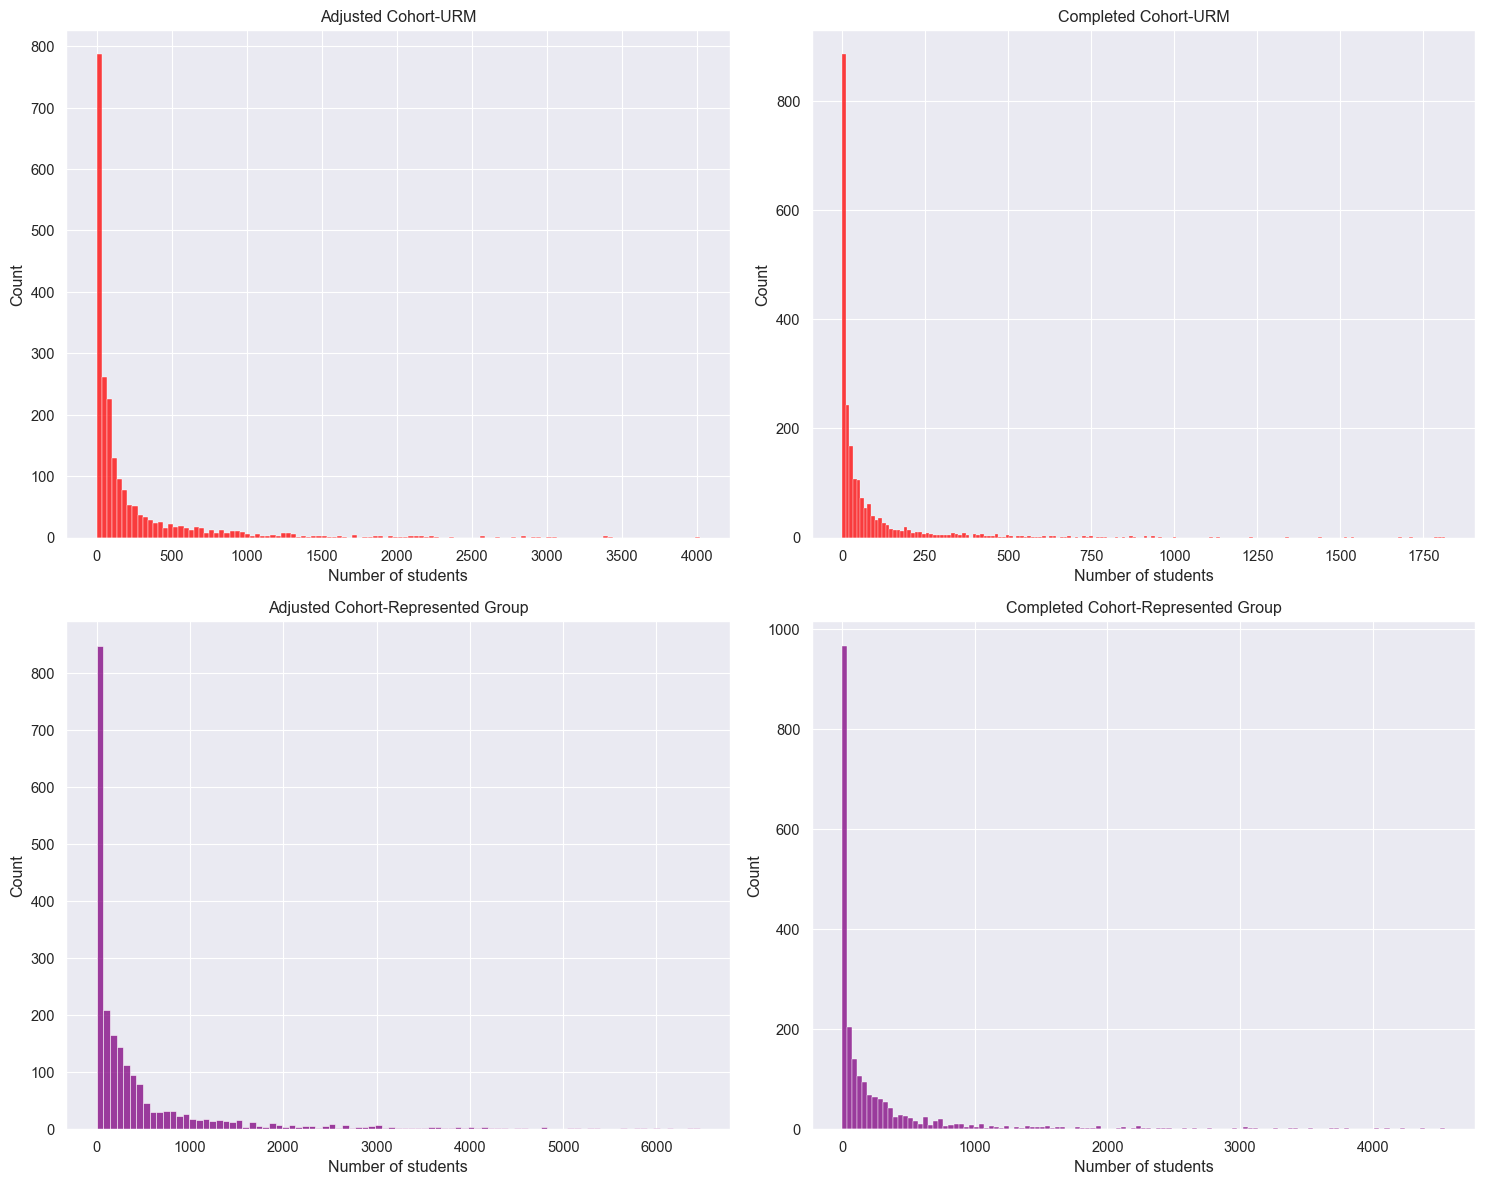

In [161]:
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=1.2)
fig, ax = plt.subplots(2,2,figsize=(15,12))

sns.histplot(URM_ac_hist, color='red',ax=ax[0,0])
ax[0,0].set_title('Adjusted Cohort-URM')
ax[0,0].set_xlabel('Number of students')

sns.histplot(URM_cc_hist, color='red',ax=ax[0,1])
ax[0,1].set_title('Completed Cohort-URM')
ax[0,1].set_xlabel('Number of students')

sns.histplot(represented_group_ac_hist, color='purple',ax=ax[1,0])
ax[1,0].set_title('Adjusted Cohort-Represented Group')
ax[1,0].set_xlabel('Number of students')

sns.histplot(represented_group_cc_hist, color='purple',ax=ax[1,1])
ax[1,1].set_title('Completed Cohort-Represented Group')
ax[1,1].set_xlabel('Number of students')

plt.tight_layout()
plt.show()

In [162]:
UMR_grad_rates = pd.DataFrame()
UMR_grad_rates

Empty DataFrame
Columns: []
Index: []

In [163]:
UMR_grad_rates['amerIndianAla'] = (URM_cc['CC_amerIndianAla']/URM_ac['AC_amerIndianAla'])*100
UMR_grad_rates['blackorAfricanAmer'] = (URM_cc['CC_blackorAfricanAmer']/URM_ac['AC_blackorAfricanAmer'])*100
UMR_grad_rates['hispanic'] = (URM_cc['CC_hispanic']/URM_ac['AC_hispanic'])*100
UMR_grad_rates['hawaiiPacific'] = (URM_cc['CC_hawaiiPacific']/URM_ac['AC_hawaiiPacific'])*100
UMR_grad_rates['two+race'] = (URM_cc['CC_two+race']/URM_ac['AC_two+race'])*100
UMR_grad_rates['represented_grp'] = (represented_group_cc_hist/represented_group_ac_hist)*100

In [164]:
UMR_grad_rates.rename({'amerIndianAla':'American Indian or Alaska Native',
                      'blackorAfricanAmer':'Black or African American',
                      'hispanic':'Hispanic',
                      'hawaiiPacific':'Native Hawaiian or Other Pacific Islander ',
                      'two+race':'Two or more races',
                      'represented_grp':'Represented group'},axis=1,inplace=True)

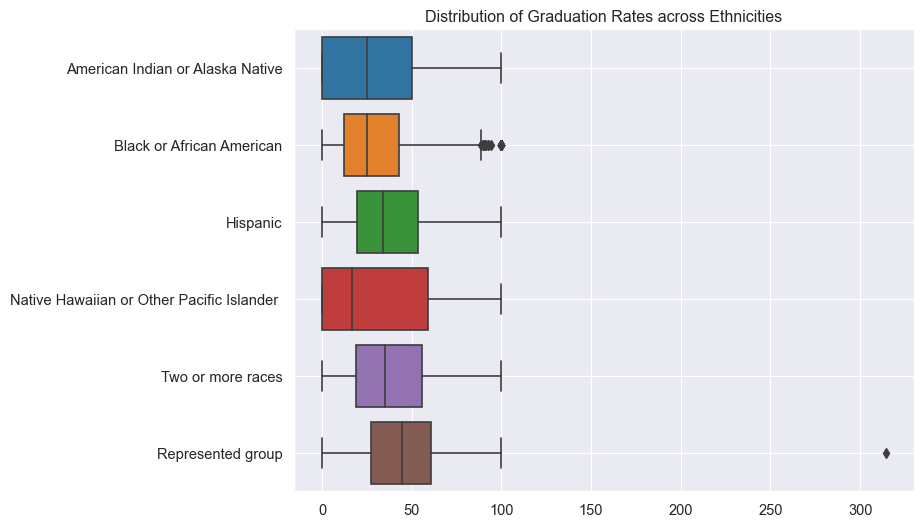

In [165]:
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=1.2)
plt.figure(figsize=(8,6))
sns.boxplot(data=UMR_grad_rates,orient='h')
plt.grid(True)
plt.title('Distribution of Graduation Rates across Ethnicities')
#plt.xticks(rotation=90)
plt.show()

#represented group has a higher median that all groups

In [166]:
UMR_grad_rates[UMR_grad_rates['Represented group'] == UMR_grad_rates['Represented group'].max()]

American Indian or Alaska Native  Black or African American  Hispanic  \
1225                              34.2                        0.0      79.7   

      Native Hawaiian or Other Pacific Islander   Two or more races  \
1225                                         NaN                0.0   

      Represented group  
1225              314.3

In [167]:
adjusted_cohort.iloc[1225]

unitid                           206817
institution name         Bacone College
AC_grandtotal                     485.0
AC_totalmen                       336.0
AC_totalwomen                     149.0
AC_amerIndianAla                  161.0
AC_asian                           12.0
AC_blackorAfricanAmer              78.0
AC_hispanic                        69.0
AC_hawaiiPacific                    0.0
AC_white                           58.0
AC_two+race                        18.0
AC_unknownRace                     77.0
AC_us_nonres                       12.0
ac_total                          485.0
Name: 1225, dtype: object

In [168]:
cohort_completers.iloc[1225]

unitid                           206817
institution name         Bacone College
CC_grandtotal                     330.0
CC_totalmen                       165.0
CC_totalwomen                     165.0
CC_amerIndianAla                   55.0
CC_asian                           55.0
CC_blackorAfricanAmer               0.0
CC_hispanic                        55.0
CC_hawaiiPacific                    0.0
CC_white                          165.0
CC_two+race                         0.0
CC_unknownRace                      0.0
CC_us_nonres                        0.0
cc_total                          330.0
Name: 1225, dtype: object

In [169]:
data_point = all_data.loc[all_data['unitid']==206817,['grad_rate_2022_undergrad',
                                        'EF2016D_RV.Full-time first-time degree/certificate-seeking undergraduate (current year GRS cohort)',
                                         'AC_grandtotal',
                                         'CC_grandtotal',
                                         'AC_asian',
                                         'AC_white',
                                         'CC_asian',
                                         'CC_white']]
data_point.rename({'grad_rate_2022_undergrad':'DRVGR2022.Graduation rate - Bachelor degree within 4 years, total',
                       'AC_grandtotal':'GR2022.Grand total adjusted',
                       'CC_grandtotal':'GR2022.Grand total completers',
                       'AC_asian':'GR2022.Asian total',
                       'AC_white':'GR2022.White total'},axis=1)[['DRVGR2022.Graduation rate - Bachelor degree within 4 years, total',
                                                                 'EF2016D_RV.Full-time first-time degree/certificate-seeking undergraduate (current year GRS cohort)',
                                                                'GR2022.Grand total adjusted','GR2022.Grand total completers']]

DRVGR2022.Graduation rate - Bachelor degree within 4 years, total  \
1225                                              100.0                   

      EF2016D_RV.Full-time first-time degree/certificate-seeking undergraduate (current year GRS cohort)  \
1225                                              399.0                                                    

      GR2022.Grand total adjusted  GR2022.Grand total completers  
1225                        485.0                          330.0

In [170]:
error_grad_rate = all_data.loc[all_data['grad_rate_2022_undergrad']==100,['grad_rate_2022_undergrad',
                                         'AC_grandtotal',
                                         'CC_grandtotal',
                                         'AC_asian',
                                         'AC_white',
                                         'CC_asian',
                                         'CC_white',
                                        'EF2016D_RV.Full-time first-time degree/certificate-seeking undergraduate (current year GRS cohort)'                           
                                            ]]

error_grad_rate.rename({'grad_rate_2022_undergrad':'DRVGR2022.Graduation rate - Bachelor degree within 4 years, total',
                       'AC_grandtotal':'GR2022.Grand total adjusted',
                       'CC_grandtotal':'GR2022.Grand total completers',
                       'AC_asian':'GR2022.Asian total',
                       'AC_white':'GR2022.White total'},axis=1)[['DRVGR2022.Graduation rate - Bachelor degree within 4 years, total',
                                                                 'EF2016D_RV.Full-time first-time degree/certificate-seeking undergraduate (current year GRS cohort)',
                                                                'GR2022.Grand total adjusted','GR2022.Grand total completers']]

DRVGR2022.Graduation rate - Bachelor degree within 4 years, total  \
117                                               100.0                   
205                                               100.0                   
469                                               100.0                   
830                                               100.0                   
1225                                              100.0                   
1762                                              100.0                   
1853                                              100.0                   
1894                                              100.0                   
2016                                              100.0                   
2035                                              100.0                   
2036                                              100.0                   
2120                                              100.0                   
2124                                              100.0                   
2144                                              100.0                   

      EF2016D_RV.Full-time first-time degree/certificate-seeking undergraduate (current year GRS cohort)  \
117                                                11.0                                                    
205                                                 1.0                                                    
469                                                 4.0                                                    
830                                                 5.0                                                    
1225                                              399.0                                                    
1762                                               35.0                                                    
1853                                                8.0                                                    
1894                                                1.0                                                    
2016                                                2.0                                                    
2035                                                1.0                                                    
2036                                                1.0                                                    
2120                                                2.0                                                    
2124                                                1.0                                                    
2144                                                1.0                                                    

      GR2022.Grand total adjusted  GR2022.Grand total completers  
117                           8.0                            2.0  
205                           1.0                            1.0  
469                           3.0                            3.0  
830                           5.0                            1.0  
1225                        485.0                          330.0  
1762                         34.0                            2.0  
1853                          5.0                            2.0  
1894                          1.0                            1.0  
2016                          2.0                            2.0  
2035                          1.0                            1.0  
2036                          1.0                            1.0  
2120                          2.0                            1.0  
2124                          1.0                            1.0  
2144                          1.0                            1.0

In [171]:
all_data[all_data['unitid']==206817][['EF2016D_RV.Full-time first-time degree/certificate-seeking undergraduate (current year GRS cohort)',
                                     'AC_grandtotal','CC_grandtotal','grad_rate_2022_undergrad']]

EF2016D_RV.Full-time first-time degree/certificate-seeking undergraduate (current year GRS cohort)  \
1225                                              399.0                                                    

      AC_grandtotal  CC_grandtotal  grad_rate_2022_undergrad  
1225          485.0          330.0                     100.0

In [172]:
#calculating graduation rates to match it with the graduation rates in the dataset
manual_graduation_rates = round(all_data['CC_grandtotal']/all_data['AC_grandtotal']*100,0)
manual_graduation_rates.head()

0   13.0
1   44.0
2   50.0
3   39.0
4   14.0
dtype: float64

In [173]:
all_data['grad_rate_2022_undergrad'].head()

0   13.0
1   44.0
2   50.0
3   39.0
4   14.0
Name: grad_rate_2022_undergrad, dtype: float64

In [174]:
graduation_rates_boolean = all_data['grad_rate_2022_undergrad']==manual_graduation_rates

In [175]:
all_data.loc[~graduation_rates_boolean,['grad_rate_2022_undergrad',
                                         'AC_grandtotal',
                                         'CC_grandtotal']].head(30)

grad_rate_2022_undergrad  AC_grandtotal  CC_grandtotal
6                         NaN            NaN            NaN
10                        7.0           22.0            1.0
13                        0.0            1.0            NaN
15                        NaN            NaN            NaN
16                       29.0          377.0           96.0
21                       34.0          390.0          129.0
23                        NaN            NaN            NaN
26                        NaN            NaN            NaN
28                       33.0          136.0           43.0
31                        NaN            NaN            NaN
32                       14.0         1322.0          137.0
33                       25.0          670.0          114.0
34                       14.0          118.0           10.0
38                        NaN            NaN            NaN
41                       47.0         5005.0         2327.0
42                        NaN            NaN            NaN
45                        NaN            NaN            NaN
47                        NaN            NaN            NaN
52                       32.0         1817.0          491.0
54                       18.0          125.0           14.0
55                       28.0           84.0            8.0
60                       62.0          395.0          234.0
65                       29.0          941.0          195.0
66                       13.0          618.0           74.0
69                        0.0           23.0            NaN
71                        NaN            NaN            NaN
77                        NaN            NaN            NaN
86                       13.0         1584.0          198.0
99                        NaN            NaN            NaN
102                      76.0         1509.0         1124.0

In [176]:
all_data.loc[~graduation_rates_boolean,['grad_rate_2022_undergrad',
                                         'AC_grandtotal',
                                         'CC_grandtotal']].isna().sum()

grad_rate_2022_undergrad    347
AC_grandtotal               338
CC_grandtotal               444
dtype: int64

In [177]:
#use your own calculation for the graduation rates

In [178]:
all_data.columns

Index(['unitid', 'institution name', 'grad_rate_2022_undergrad',
       'HD2016.Control of institution',
       'HD2016.Longitude location of institution',
       'HD2016.Latitude location of institution',
       'IC2016_RV.Percent indicator of undergraduates formally registered as students with disabilities',
       'IC2016_RV.Percent of undergraduates, who are formally registered as students with disabilities, when percentage is more than 3 percent',
       'EF2016D_RV.Full-time first-time degree/certificate-seeking undergraduate (current year GRS cohort)',
       'EF2016D_RV.Total entering students at the undergraduate level, fall 2016',
       'EF2016D_RV.Current year GRS cohort as a percent of entering class',
       'EF2016D_RV.Student-to-faculty ratio', 'DRVHR2016_RV.Total FTE staff',
       'DRVHR2016_RV.Instructional FTE', 'ADM2016_RV.Admission test scores',
       'ADM2016_RV.Applicants men', 'ADM2016_RV.Applicants women',
       'ADM2016_RV.Admissions men', 'ADM2016_RV.Admis

In [179]:
others = all_data[['ADM2016_RV.Applicants men',
         'ADM2016_RV.Applicants women', 
         'ADM2016_RV.Admissions men', 
         'ADM2016_RV.Admissions women', 
         'ADM2016_RV.Enrolled  men', 
         'ADM2016_RV.Enrolled  women']].copy()
others.head()

ADM2016_RV.Applicants men  ADM2016_RV.Applicants women  \
0                     2725.0                       4318.0   
1                     3510.0                       5949.0   
2                        NaN                          NaN   
3                     2385.0                       2160.0   
4                     2967.0                       6086.0   

   ADM2016_RV.Admissions men  ADM2016_RV.Admissions women  \
0                     2276.0                       3878.0   
1                     2062.0                       3437.0   
2                        NaN                          NaN   
3                     1930.0                       1537.0   
4                     1293.0                       2862.0   

   ADM2016_RV.Enrolled  men  ADM2016_RV.Enrolled  women  
0                     652.0                       916.0  
1                     758.0                      1263.0  
2                       NaN                         NaN  
3                     735.0                       478.0  
4                     434.0                       738.0

In [180]:
others[['ADM2016_RV.Applicants men',
                                     'ADM2016_RV.Applicants women']].sum(axis=1)

0      7043.0
1      9459.0
2         0.0
3      4545.0
4      9053.0
        ...  
2144      2.0
2145      1.0
2146      0.0
2147      0.0
2148    101.0
Length: 2149, dtype: float64

In [181]:
others['total_applicants'] = others[['ADM2016_RV.Applicants men',
                                     'ADM2016_RV.Applicants women']].sum(axis=1)

others['total_admissions'] = others[['ADM2016_RV.Admissions men',
                                     'ADM2016_RV.Admissions women']].sum(axis=1)

others['total_enrolment'] = others[['ADM2016_RV.Enrolled  men',
                                     'ADM2016_RV.Enrolled  women']].sum(axis=1)
others.head()

ADM2016_RV.Applicants men  ADM2016_RV.Applicants women  \
0                     2725.0                       4318.0   
1                     3510.0                       5949.0   
2                        NaN                          NaN   
3                     2385.0                       2160.0   
4                     2967.0                       6086.0   

   ADM2016_RV.Admissions men  ADM2016_RV.Admissions women  \
0                     2276.0                       3878.0   
1                     2062.0                       3437.0   
2                        NaN                          NaN   
3                     1930.0                       1537.0   
4                     1293.0                       2862.0   

   ADM2016_RV.Enrolled  men  ADM2016_RV.Enrolled  women  total_applicants  \
0                     652.0                       916.0            7043.0   
1                     758.0                      1263.0            9459.0   
2                       NaN                         NaN               0.0   
3                     735.0                       478.0            4545.0   
4                     434.0                       738.0            9053.0   

   total_admissions  total_enrolment  
0            6154.0           1568.0  
1            5499.0           2021.0  
2               0.0              0.0  
3            3467.0           1213.0  
4            4155.0           1172.0

In [182]:
others['admission_rate'] = round((others['total_admissions']/others['total_applicants'])*100,0)
others['enrolment_rate'] = round((others['total_enrolment']/others['total_admissions'])*100,0)
others.head()

ADM2016_RV.Applicants men  ADM2016_RV.Applicants women  \
0                     2725.0                       4318.0   
1                     3510.0                       5949.0   
2                        NaN                          NaN   
3                     2385.0                       2160.0   
4                     2967.0                       6086.0   

   ADM2016_RV.Admissions men  ADM2016_RV.Admissions women  \
0                     2276.0                       3878.0   
1                     2062.0                       3437.0   
2                        NaN                          NaN   
3                     1930.0                       1537.0   
4                     1293.0                       2862.0   

   ADM2016_RV.Enrolled  men  ADM2016_RV.Enrolled  women  total_applicants  \
0                     652.0                       916.0            7043.0   
1                     758.0                      1263.0            9459.0   
2                       NaN                         NaN               0.0   
3                     735.0                       478.0            4545.0   
4                     434.0                       738.0            9053.0   

   total_admissions  total_enrolment  admission_rate  enrolment_rate  
0            6154.0           1568.0            87.0            25.0  
1            5499.0           2021.0            58.0            37.0  
2               0.0              0.0             NaN             NaN  
3            3467.0           1213.0            76.0            35.0  
4            4155.0           1172.0            46.0            28.0

In [183]:
others.isna().sum()

ADM2016_RV.Applicants men      458
ADM2016_RV.Applicants women    458
ADM2016_RV.Admissions men      507
ADM2016_RV.Admissions women    529
ADM2016_RV.Enrolled  men       512
ADM2016_RV.Enrolled  women     533
total_applicants                 0
total_admissions                 0
total_enrolment                  0
admission_rate                 465
enrolment_rate                 468
dtype: int64

In [184]:
others.describe().T

count   mean    std  min   25%    50%    75%  \
ADM2016_RV.Applicants men   1691.0 2671.4 4549.2  0.0 352.5 1122.0 2855.5   
ADM2016_RV.Applicants women 1691.0 3444.3 5306.8  0.0 506.5 1590.0 3943.0   
ADM2016_RV.Admissions men   1642.0 1470.1 2092.5  0.0 259.2  729.5 1701.5   
ADM2016_RV.Admissions women 1620.0 2061.5 2710.6  0.0 391.8 1102.5 2499.5   
ADM2016_RV.Enrolled  men    1637.0  430.0  626.9  0.0  86.0  199.0  474.0   
ADM2016_RV.Enrolled  women  1616.0  531.5  721.3  0.0 112.0  262.0  616.2   
total_applicants            2149.0 4812.3 9002.9  0.0  23.0 1615.0 5282.0   
total_admissions            2149.0 2677.3 4398.4  0.0  17.0 1012.0 3213.0   
total_enrolment             2149.0  727.2 1229.4  0.0  11.0  290.0  768.0   
admission_rate              1684.0   65.8   20.7  0.0  53.8   68.0   81.0   
enrolment_rate              1681.0   36.0   21.2  0.0  21.0   30.0   44.0   

                                max  
ADM2016_RV.Applicants men   45362.0  
ADM2016_RV.Applicants women 51750.0  
ADM2016_RV.Admissions men   15351.0  
ADM2016_RV.Admissions women 17822.0  
ADM2016_RV.Enrolled  men     5210.0  
ADM2016_RV.Enrolled  women   4932.0  
total_applicants            97112.0  
total_admissions            31630.0  
total_enrolment             10142.0  
admission_rate                100.0  
enrolment_rate                100.0

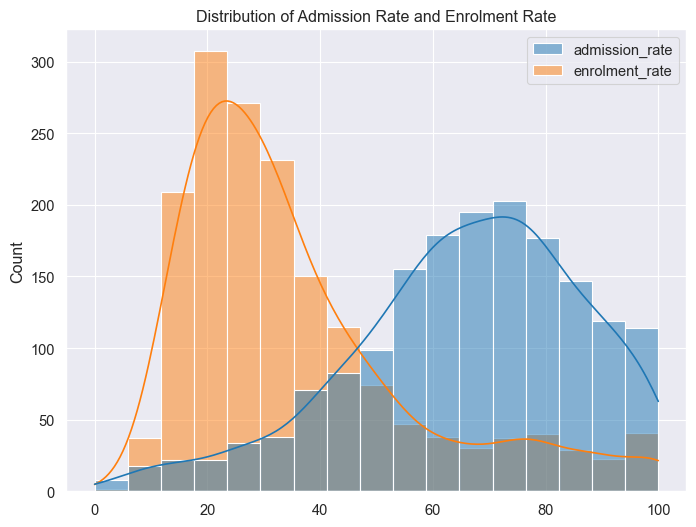

In [185]:
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=1.2)
plt.figure(figsize=(8,6))
sns.histplot(others[['admission_rate','enrolment_rate']], element='bars', kde=True)
plt.title('Distribution of Admission Rate and Enrolment Rate')
plt.show()

# STAGE 3

# PRE-PROCESSING

In [186]:
for x,i in enumerate(list(all_data.columns)):
    print(f"{x+1}. {i}")

1. unitid
2. institution name
3. grad_rate_2022_undergrad
4. HD2016.Control of institution
5. HD2016.Longitude location of institution
6. HD2016.Latitude location of institution
7. IC2016_RV.Percent indicator of undergraduates formally registered as students with disabilities
8. IC2016_RV.Percent of undergraduates, who are formally registered as students with disabilities, when percentage is more than 3 percent
9. EF2016D_RV.Full-time first-time degree/certificate-seeking undergraduate (current year GRS cohort)
10. EF2016D_RV.Total entering students at the undergraduate level, fall 2016
11. EF2016D_RV.Current year GRS cohort as a percent of entering class
12. EF2016D_RV.Student-to-faculty ratio
13. DRVHR2016_RV.Total FTE staff
14. DRVHR2016_RV.Instructional FTE
15. ADM2016_RV.Admission test scores
16. ADM2016_RV.Applicants men
17. ADM2016_RV.Applicants women
18. ADM2016_RV.Admissions men
19. ADM2016_RV.Admissions women
20. ADM2016_RV.Enrolled  men
21. ADM2016_RV.Enrolled  women
22. ADM

##### Eliminating rows or institutions that did not have records for cohort completers or adjusted completers or graduation rates
##### and dropping some columns

In [187]:
all_data[['grad_rate_2022_undergrad','AC_grandtotal','CC_grandtotal',
          'EF2016D_RV.Full-time first-time degree/certificate-seeking undergraduate (current year GRS cohort)']]

grad_rate_2022_undergrad  AC_grandtotal  CC_grandtotal  \
0                         13.0         1404.0          178.0   
1                         44.0         1945.0          857.0   
2                         50.0            2.0            1.0   
3                         39.0         1193.0          465.0   
4                         14.0         1143.0          156.0   
...                        ...            ...            ...   
2144                     100.0            1.0            1.0   
2145                       NaN            NaN            NaN   
2146                      10.0           35.0            1.0   
2147                       NaN            NaN            NaN   
2148                      29.0           28.0            8.0   

      EF2016D_RV.Full-time first-time degree/certificate-seeking undergraduate (current year GRS cohort)  
0                                                1410.0                                                   
1                                                1948.0                                                   
2                                                   3.0                                                   
3                                                1203.0                                                   
4                                                1143.0                                                   
...                                                 ...                                                   
2144                                                1.0                                                   
2145                                                NaN                                                   
2146                                                NaN                                                   
2147                                                NaN                                                   
2148                                               23.0                                                   

[2149 rows x 4 columns]

In [188]:
all_data[['grad_rate_2022_undergrad','AC_grandtotal','CC_grandtotal',
         'EF2016D_RV.Full-time first-time degree/certificate-seeking undergraduate (current year GRS cohort)']].isna().sum()

grad_rate_2022_undergrad                                                                              347
AC_grandtotal                                                                                         338
CC_grandtotal                                                                                         444
EF2016D_RV.Full-time first-time degree/certificate-seeking undergraduate (current year GRS cohort)    239
dtype: int64

In [189]:
#where graduation rate is not null but cc_grandtotal (completers) is null
all_data.loc[(all_data['grad_rate_2022_undergrad'].notnull()) & (all_data['CC_grandtotal'].isna()),
            ['grad_rate_2022_undergrad','AC_grandtotal','CC_grandtotal',
            'EF2016D_RV.Full-time first-time degree/certificate-seeking undergraduate (current year GRS cohort)']]


#I cannot confirm if the NaN is zero or not, hence I will remove instituitions that have CC_grandtotal as NaN

grad_rate_2022_undergrad  AC_grandtotal  CC_grandtotal  \
13                         0.0            1.0            NaN   
69                         0.0           23.0            NaN   
125                        0.0            1.0            NaN   
146                        0.0            7.0            NaN   
166                        0.0            4.0            NaN   
...                        ...            ...            ...   
2115                       0.0            1.0            NaN   
2118                       0.0           53.0            NaN   
2125                       0.0            1.0            NaN   
2135                       0.0            1.0            NaN   
2136                       0.0            4.0            NaN   

      EF2016D_RV.Full-time first-time degree/certificate-seeking undergraduate (current year GRS cohort)  
13                                                  1.0                                                   
69                                                 60.0                                                   
125                                                 4.0                                                   
146                                                 2.0                                                   
166                                                 6.0                                                   
...                                                 ...                                                   
2115                                                1.0                                                   
2118                                               53.0                                                   
2125                                                1.0                                                   
2135                                                NaN                                                   
2136                                                3.0                                                   

[97 rows x 4 columns]

In [190]:
#1. retaining institutions that have a value for graduation rate column

updated_1 = all_data.loc[(all_data['grad_rate_2022_undergrad'].notna())].copy()

In [191]:
#excluding institutions that have NaN in Completers column (CC_grandtotal)
updated_2 = updated_1[updated_1['CC_grandtotal'].notna()].copy()

In [192]:
#No NaN in the columns used in calculating graduation rates
updated_2[['grad_rate_2022_undergrad',
           'AC_grandtotal',
           'CC_grandtotal',
           'EF2016D_RV.Full-time first-time degree/certificate-seeking undergraduate (current year GRS cohort)']].isna().sum()

grad_rate_2022_undergrad                                                                               0
AC_grandtotal                                                                                          0
CC_grandtotal                                                                                          0
EF2016D_RV.Full-time first-time degree/certificate-seeking undergraduate (current year GRS cohort)    22
dtype: int64

In [193]:
#number of instutions left after removing those that have na in columns used for calculating graduation rates
updated_2.shape

(1705, 68)

In [194]:
#dropping some columns because they were duplicated. 
#Some columns also contained so many na's and cannot be imputed
updated_2[['IC2016_RV.Percent of undergraduates, who are formally registered as students with disabilities, when percentage is more than 3 percent',
         'IC2016_RV.Percent indicator of undergraduates formally registered as students with disabilities']].isna().sum()


IC2016_RV.Percent of undergraduates, who are formally registered as students with disabilities, when percentage is more than 3 percent    928
IC2016_RV.Percent indicator of undergraduates formally registered as students with disabilities                                             0
dtype: int64

In [195]:
#these 2 columns will not be used in the analysis
#for the disability column, there is another column that is informative than the one below so we will drop this
#for the FTFT column, there is another column that is the same 
updated_2.drop(['EF2016D_RV.Full-time first-time degree/certificate-seeking undergraduate (current year GRS cohort)',
          'IC2016_RV.Percent of undergraduates, who are formally registered as students with disabilities, when percentage is more than 3 percent'],axis=1,inplace=True)

In [196]:
updated_2

unitid                                   institution name  \
0     100654                           Alabama A & M University   
1     100663                University of Alabama at Birmingham   
2     100690                                 Amridge University   
3     100706                University of Alabama in Huntsville   
4     100724                           Alabama State University   
...      ...                                                ...   
2131  487603  Northwest University-Center for Online and Ext...   
2138  488350                     Yeshiva Gedolah Shaarei Shmuel   
2144  489344              Chamberlain University-North Carolina   
2146  489779                           Purdue University Global   
2148  489937                                Carolina University   

      grad_rate_2022_undergrad HD2016.Control of institution  \
0                         13.0                        Public   
1                         44.0                        Public   
2                         50.0        Private not-for-profit   
3                         39.0                        Public   
4                         14.0                        Public   
...                        ...                           ...   
2131                      17.0        Private not-for-profit   
2138                      26.0        Private not-for-profit   
2144                     100.0            Private for-profit   
2146                      10.0            Private for-profit   
2148                      29.0        Private not-for-profit   

      HD2016.Longitude location of institution  \
0                                        -86.6   
1                                        -86.8   
2                                        -86.2   
3                                        -86.6   
4                                        -86.3   
...                                        ...   
2131                                    -122.2   
2138                                     -74.2   
2144                                     -80.9   
2146                                     -86.1   
2148                                     -80.3   

      HD2016.Latitude location of institution  \
0                                        34.8   
1                                        33.5   
2                                        32.4   
3                                        34.7   
4                                        32.4   
...                                       ...   
2131                                     47.7   
2138                                     40.1   
2144                                     35.1   
2146                                     39.9   
2148                                     36.1   

     IC2016_RV.Percent indicator of undergraduates formally registered as students with disabilities  \
0                                     3 percent or less                                                
1                                     3 percent or less                                                
2                                     3 percent or less                                                
3                                   More than 3 percent                                                
4                                     3 percent or less                                                
...                                                 ...                                                
2131                                  3 percent or less                                                
2138                                  3 percent or less                                                
2144                                  3 percent or less                                                
2146                                  3 percent or less                                                
2148                                  3 percent or less                                           

In [197]:
#dropping SAT scores because ACT scores will be used. The proportion of schools who accepted these were same as SAT scores
#Moreover, this is easy to interpret as these are the composite scores

updated_2.drop(['ADM2016_RV.Number of first-time degree/certificate-seeking students submitting SAT scores',
          'ADM2016_RV.Percent of first-time degree/certificate-seeking students submitting SAT scores',
          'ADM2016_RV.SAT Critical Reading 25th percentile score',
          'ADM2016_RV.SAT Critical Reading 75th percentile score',
          'ADM2016_RV.SAT Math 25th percentile score',
          'ADM2016_RV.SAT Math 75th percentile score',
          ],axis=1,inplace=True)

In [198]:
updated_2.drop(['ADM2016_RV.Number of first-time degree/certificate-seeking students submitting ACT scores'],axis=1,
              inplace=True)

In [199]:
#exclduing institutions that had missing values for admission ADM2016_RV.Admission test scores
updated_3 = updated_2.loc[updated_2['ADM2016_RV.Admission test scores'].notna()].copy()

In [200]:
#drop these columns: they are represented by other columns
updated_3.drop(['ADM2016_RV.Enrolled part time total','ADM2016_RV.Enrolled full time total'],axis=1,inplace=True)

In [201]:
#removing institutions where there are missing values in Enrolment men column affect the calculation of #enrolnmnt rate
updated_4 = updated_3.loc[updated_3['ADM2016_RV.Enrolled  men'].notna()].copy()

In [202]:
#removing institutions where there are missing values in Enrolment women column affect the calculation of #enrolnmnt rate

updated_5 = updated_4.loc[updated_3['ADM2016_RV.Enrolled  women'].notna()].copy()

# checking correctness of data and creating some variables

In [203]:
round((updated_5['CC_grandtotal'].sum()/updated_5['AC_grandtotal'].sum())*100,1)
#percentage of completers

48.6

In [204]:
round(((updated_5['AC_grandtotal']-updated_5['CC_grandtotal']).sum()/updated_5['AC_grandtotal'].sum())*100,1)
#percentage of non-completers

51.4

In [205]:
round((updated_5['CC_totalmen'].sum()/updated_5['AC_totalmen'].sum())*100,1)
#percentage of men who completed

43.2

In [206]:
round(((updated_5['AC_totalmen']-updated_5['CC_totalmen']).sum()/updated_5['AC_totalmen'].sum())*100,1)
#percentage of non-completers

56.8

In [207]:
round((updated_5['CC_totalwomen'].sum()/updated_5['AC_totalwomen'].sum())*100,1)
#percentage of women who completed

53.0

In [208]:
round(((updated_5['AC_totalwomen']-updated_5['CC_totalwomen']).sum()/updated_5['AC_totalwomen'].sum())*100,1)
#percentage of non-completers

47.0

In [209]:
#percentages show that the sum of groups are 100%.
#this is ideal

##### creating graduation rate variable to compare with original graduation rates

In [210]:
grad_check = round((updated_5['CC_grandtotal']/updated_5['AC_grandtotal'])*100)

In [211]:
compare_grad_rate = updated_5['grad_rate_2022_undergrad']==grad_check

In [212]:
updated_5[compare_grad_rate]

unitid                      institution name  grad_rate_2022_undergrad  \
0     100654              Alabama A & M University                      13.0   
1     100663   University of Alabama at Birmingham                      44.0   
3     100706   University of Alabama in Huntsville                      39.0   
4     100724              Alabama State University                      14.0   
5     100751             The University of Alabama                      55.0   
...      ...                                   ...                       ...   
2123  486938         Chamberlain University-Nevada                      33.0   
2126  486965           Hussian College-Los Angeles                      51.0   
2129  487375  Arizona College of Nursing-Las Vegas                      75.0   
2130  487524                     Husson University                      42.0   
2148  489937                   Carolina University                      29.0   

     HD2016.Control of institution  HD2016.Longitude location of institution  \
0                           Public                                     -86.6   
1                           Public                                     -86.8   
3                           Public                                     -86.6   
4                           Public                                     -86.3   
5                           Public                                     -87.5   
...                            ...                                       ...   
2123            Private for-profit                                    -115.3   
2126            Private for-profit                                    -118.3   
2129            Private for-profit                                    -115.2   
2130        Private not-for-profit                                     -68.8   
2148        Private not-for-profit                                     -80.3   

      HD2016.Latitude location of institution  \
0                                        34.8   
1                                        33.5   
3                                        34.7   
4                                        32.4   
5                                        33.2   
...                                       ...   
2123                                     36.2   
2126                                     34.1   
2129                                     36.1   
2130                                     44.8   
2148                                     36.1   

     IC2016_RV.Percent indicator of undergraduates formally registered as students with disabilities  \
0                                     3 percent or less                                                
1                                     3 percent or less                                                
3                                   More than 3 percent                                                
4                                     3 percent or less                                                
5                                   More than 3 percent                                                
...                                                 ...                                                
2123                                  3 percent or less                                                
2126                                  3 percent or less                                                
2129                                  3 percent or less                                                
2130                                  3 percent or less                                                
2148                                  3 percent or less                                                

      EF2016D_RV.Total entering students at the undergraduate level, fall 2016  \
0                                                1857.0                          
1                                                3796.0                          


In [213]:
updated_5.shape

(1476, 57)

In [214]:
updated_5['calculated_grad_rate'] = grad_check

In [215]:
#graduation rates which were correctly calculated from extracted data compared to calculated data

updated_5[compare_grad_rate][['grad_rate_2022_undergrad','calculated_grad_rate','CC_grandtotal','AC_grandtotal']]

grad_rate_2022_undergrad  calculated_grad_rate  CC_grandtotal  \
0                         13.0                  13.0          178.0   
1                         44.0                  44.0          857.0   
3                         39.0                  39.0          465.0   
4                         14.0                  14.0          156.0   
5                         55.0                  55.0         4129.0   
...                        ...                   ...            ...   
2123                      33.0                  33.0            1.0   
2126                      51.0                  51.0           25.0   
2129                      75.0                  75.0            3.0   
2130                      42.0                  42.0          251.0   
2148                      29.0                  29.0            8.0   

      AC_grandtotal  
0            1404.0  
1            1945.0  
3            1193.0  
4            1143.0  
5            7532.0  
...             ...  
2123            3.0  
2126           49.0  
2129            4.0  
2130          596.0  
2148           28.0  

[1172 rows x 4 columns]

In [216]:
#graduation rates which were wrongly calculated from extracted data compared to calculated data

updated_5[~compare_grad_rate][['grad_rate_2022_undergrad','calculated_grad_rate','CC_grandtotal','AC_grandtotal']]

grad_rate_2022_undergrad  calculated_grad_rate  CC_grandtotal  \
16                        29.0                  25.0           96.0   
21                        34.0                  33.0          129.0   
32                        14.0                  10.0          137.0   
33                        25.0                  17.0          114.0   
34                        14.0                   8.0           10.0   
...                        ...                   ...            ...   
2080                      33.0                  15.0          555.0   
2083                      13.0                  12.0            4.0   
2089                      41.0                   2.0            7.0   
2119                      37.0                  34.0           25.0   
2120                     100.0                  50.0            1.0   

      AC_grandtotal  
16            377.0  
21            390.0  
32           1322.0  
33            670.0  
34            118.0  
...             ...  
2080         3657.0  
2083           32.0  
2089          404.0  
2119           73.0  
2120            2.0  

[304 rows x 4 columns]

In [217]:
updated_5.isna().sum()

unitid                                                                                               0
institution name                                                                                     0
grad_rate_2022_undergrad                                                                             0
HD2016.Control of institution                                                                        0
HD2016.Longitude location of institution                                                             0
HD2016.Latitude location of institution                                                              0
IC2016_RV.Percent indicator of undergraduates formally registered as students with disabilities      0
EF2016D_RV.Total entering students at the undergraduate level, fall 2016                             7
EF2016D_RV.Current year GRS cohort as a percent of entering class                                    7
EF2016D_RV.Student-to-faculty ratio                                      

In [218]:
updated_5.loc[updated_5['CC_grandtotal']>updated_5['AC_grandtotal']]

#there is no institution with completrs cohort greater adjusted cohort, this is good

Empty DataFrame
Columns: [unitid, institution name, grad_rate_2022_undergrad, HD2016.Control of institution, HD2016.Longitude location of institution, HD2016.Latitude location of institution, IC2016_RV.Percent indicator of undergraduates formally registered as students with disabilities, EF2016D_RV.Total entering students at the undergraduate level, fall 2016, EF2016D_RV.Current year GRS cohort as a percent of entering class, EF2016D_RV.Student-to-faculty ratio, DRVHR2016_RV.Total FTE staff, DRVHR2016_RV.Instructional FTE, ADM2016_RV.Admission test scores, ADM2016_RV.Applicants men, ADM2016_RV.Applicants women, ADM2016_RV.Admissions men, ADM2016_RV.Admissions women, ADM2016_RV.Enrolled  men, ADM2016_RV.Enrolled  women, ADM2016_RV.Percent of first-time degree/certificate-seeking students submitting ACT scores, ADM2016_RV.ACT Composite 25th percentile score, ADM2016_RV.ACT Composite 75th percentile score, AC_grandtotal, AC_totalmen, AC_totalwomen, AC_amerIndianAla, AC_asian, AC_blackorAfricanAmer, AC_hispanic, AC_hawaiiPacific, AC_white, AC_two+race, AC_unknownRace, AC_us_nonres, CC_grandtotal, CC_totalmen, CC_totalwomen, CC_amerIndianAla, CC_asian, CC_blackorAfricanAmer, CC_hispanic, CC_hawaiiPacific, CC_white, CC_two+race, CC_unknownRace, CC_us_nonres, tuition&fees, tot_revenue, research_amt, stu_serv_amt, total_expenses, totFTFTundergrad, totFTFTundergrad_awarded_FA, percent_of_FTFT_awarded_FA, totalamt_FA, FTEq_enrol_undergrad16-17, EF2017D_RV.Full-time retention rate, 2017, calculated_grad_rate]
Index: []

[0 rows x 58 columns]

In [219]:
#check
um = pd.DataFrame()

In [220]:
um['unitid'] = updated_5['unitid']
um['instit'] = updated_5['institution name']
um['amerIndianAla'] = (updated_5['CC_amerIndianAla']/updated_5['AC_amerIndianAla'])*100
um['blackorAfricanAmer'] = (updated_5['CC_blackorAfricanAmer']/updated_5['AC_blackorAfricanAmer'])*100
um['hispanic'] = (updated_5['CC_hispanic']/updated_5['AC_hispanic'])*100
um['hawaiiPacific'] = (updated_5['CC_hawaiiPacific']/updated_5['AC_hawaiiPacific'])*100
um['two+race'] = (updated_5['CC_two+race']/updated_5['AC_two+race'])*100
um['represented_grp'] = ((updated_5['CC_asian']+updated_5['CC_white'])/(updated_5['AC_asian']+updated_5['AC_white']))*100

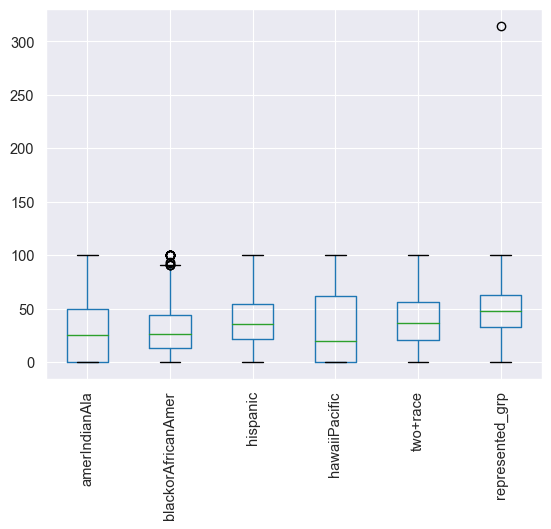

In [221]:
um.iloc[:,2:].boxplot()
plt.xticks(rotation=90)
plt.show()

In [222]:
um[um['represented_grp']==um['represented_grp'].max()]

unitid          instit  amerIndianAla  blackorAfricanAmer  hispanic  \
1225  206817  Bacone College           34.2                 0.0      79.7   

      hawaiiPacific  two+race  represented_grp  
1225            NaN       0.0            314.3

In [223]:
updated_5.loc[updated_5['unitid']==206817,['grad_rate_2022_undergrad',
                                          'calculated_grad_rate', 
                                           'AC_grandtotal', 
                                           'CC_grandtotal', 
                                           'AC_asian',
                                           'AC_white',
                                          'CC_asian', 'CC_white']]

grad_rate_2022_undergrad  calculated_grad_rate  AC_grandtotal  \
1225                     100.0                  68.0          485.0   

      CC_grandtotal  AC_asian  AC_white  CC_asian  CC_white  
1225          330.0      12.0      58.0      55.0     165.0

In [224]:
updated_5.loc[(updated_5['CC_asian']>updated_5['AC_asian']) |
              (updated_5['CC_white']>updated_5['AC_white']) | 
              (updated_5['CC_amerIndianAla']>updated_5['AC_amerIndianAla']) |
              (updated_5['CC_blackorAfricanAmer']>updated_5['AC_blackorAfricanAmer']) | 
              (updated_5['CC_hispanic']>updated_5['AC_hispanic']) |
             (updated_5['CC_hawaiiPacific']>updated_5['AC_hawaiiPacific']) |
              (updated_5['CC_two+race']>updated_5['AC_two+race']) | 
              (updated_5['CC_unknownRace']>updated_5['AC_unknownRace']) |
             (updated_5['CC_us_nonres']>updated_5['AC_us_nonres'])
             ] 


#this institution will be elimated because the completers as white and asians are greater than adjusted cohort

unitid institution name  grad_rate_2022_undergrad  \
1225  206817   Bacone College                     100.0   

     HD2016.Control of institution  HD2016.Longitude location of institution  \
1225        Private not-for-profit                                     -95.3   

      HD2016.Latitude location of institution  \
1225                                     35.8   

     IC2016_RV.Percent indicator of undergraduates formally registered as students with disabilities  \
1225                                  3 percent or less                                                

      EF2016D_RV.Total entering students at the undergraduate level, fall 2016  \
1225                                              520.0                          

      EF2016D_RV.Current year GRS cohort as a percent of entering class  \
1225                                               77.0                   

      EF2016D_RV.Student-to-faculty ratio  ...  research_amt  stu_serv_amt  \
1225                                 21.0  ...           0.0     4933833.0   

     total_expenses  totFTFTundergrad  totFTFTundergrad_awarded_FA  \
1225     13927374.0             399.0                        380.0   

      percent_of_FTFT_awarded_FA  totalamt_FA  FTEq_enrol_undergrad16-17  \
1225                        95.0    4277184.0                      899.0   

      EF2017D_RV.Full-time retention rate, 2017  calculated_grad_rate  
1225                                       43.0                  68.0  

[1 rows x 58 columns]

In [225]:
updated_5.shape

(1476, 58)

In [226]:
eliminated_inst_id = 206817
eliminated_inst_id_bool = updated_5['unitid']==eliminated_inst_id

In [227]:
updated_6 = updated_5.loc[~eliminated_inst_id_bool].copy()

In [228]:
um_1 = pd.DataFrame()
um_1['unitid'] = updated_6['unitid']
um_1['instit'] = updated_6['institution name']
um_1['amerIndianAla'] = (updated_6['CC_amerIndianAla']/updated_6['AC_amerIndianAla'])*100
um_1['blackorAfricanAmer'] = (updated_6['CC_blackorAfricanAmer']/updated_6['AC_blackorAfricanAmer'])*100
um_1['hispanic'] = (updated_6['CC_hispanic']/updated_6['AC_hispanic'])*100
um_1['hawaiiPacific'] = (updated_6['CC_hawaiiPacific']/updated_6['AC_hawaiiPacific'])*100
um_1['two+race'] = (updated_6['CC_two+race']/updated_6['AC_two+race'])*100
um_1['represented_grp'] = ((updated_6['CC_asian']+updated_6['CC_white'])/(updated_6['AC_asian']+updated_6['AC_white']))*100

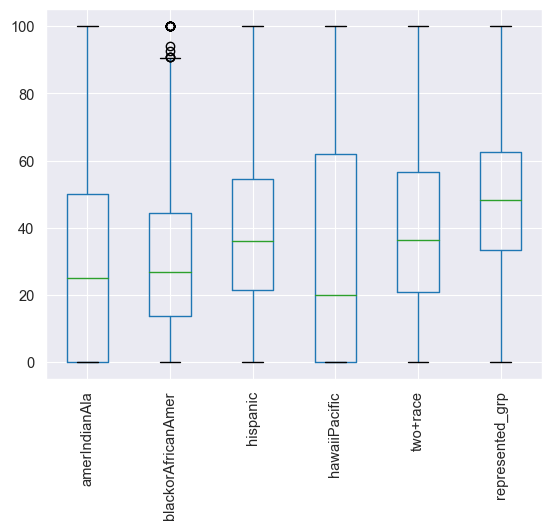

In [229]:
um_1.iloc[:,2:].boxplot()
plt.xticks(rotation=90)
plt.show()

#all institutions graduation rate for each ethnic group is within 0-100%

In [230]:
def labelencoders(data):
    #0 will be for institutions with less than 3% disabled persons and 1 for 3% or more disabled persons
    lab_disabilty = LabelEncoder()
    data['IC2016_RV.Percent indicator of undergraduates formally registered as students with disabilities'] = lab_disabilty.fit_transform(data['IC2016_RV.Percent indicator of undergraduates formally registered as students with disabilities'])
    
    #group admission test as either required or not
    data['ADM2016_RV.Admission test scores'] = data['ADM2016_RV.Admission test scores'].apply(lambda x:'Not required' if x=='Recommended' 
                                                                             or x=='Neither required nor recommended' 
                                                                             or x=='Considered but not required' else x)
    lab_admission_test = LabelEncoder()
    data['ADM2016_RV.Admission test scores'] = lab_admission_test.fit_transform(data['ADM2016_RV.Admission test scores'])
    
    
    #group control as either private or public.
    #public is 1, private is 0
    data['HD2016.Control of institution'] = data['HD2016.Control of institution'].apply(lambda x:'Private' if x=='Private not-for-profit' 
                                                                             or x=='Private for-profit' 
                                                                             else x)
    
    lab_control = LabelEncoder()
    data['HD2016.Control of institution'] = lab_control.fit_transform(data['HD2016.Control of institution'])
    
    return data
    

In [231]:
all_data = labelencoders(updated_6)

In [232]:
#to help remove outliers, a function is created to calculate the lower_limit, upper_limit and Interquartile_range
def limits(column_name,table):
    Q1 = table[column_name].quantile(0.25) 
    Q3 = table[column_name].quantile(0.75)
    IQR = Q3-Q1                  #Interquartile range
    lower_lim = Q1 - (1.5 * IQR) #calculating the lower_limit
    
    #lower_limit_retention_rate = limits('Retention rate',table)
    
    #creating a new feature which shows which Retention rate is an outlier
    table['Outlier'] = table['EF2017D_RV.Full-time retention rate, 2017'].apply(lambda x: 0 if x > lower_lim else 1)
    
    return table

In [233]:
all_data = limits('EF2017D_RV.Full-time retention rate, 2017',all_data)

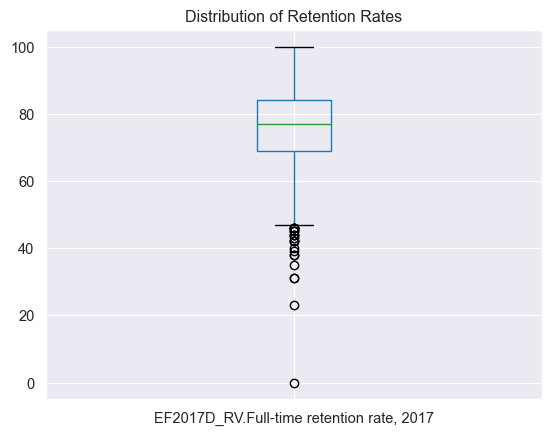

In [234]:
all_data[['EF2017D_RV.Full-time retention rate, 2017']].boxplot()
plt.title('Distribution of Retention Rates')
plt.show()

# Columns for percentage changes

In [235]:
#read files

faculty_enrol = pd.read_csv('STU FAC AND ENROL.csv')
faculty_enrol.drop(['year'],axis=1,inplace=True)

funds_16_17 = pd.read_csv('TUITION ETC 16-17.csv')
funds_17_18 = pd.read_csv('TUITION ETC 17-18.csv')

In [236]:
#tuition & Student services for 2016 cohort
funds_16_17['16_17_TUITION'] = funds_16_17[['F1617_F2_RV.Tuition and fees - Total', 
                            'F1617_F3_RV.Tuition and fees', 
                            'F1617_F1A_RV.Tuition and fees, after deducting discounts and allowances']].sum(axis=1)

funds_16_17['16_17_STUDENT_SERV'] = funds_16_17[['F1617_F2_RV.Student service-Total amount', 
                                        'F1617_F3_RV.Student service-Total amount', 
                                        'F1617_F1A_RV.Student services - Current year total']].sum(axis=1)

data_16_17 = funds_16_17.drop(['F1617_F2_RV.Tuition and fees - Total', 
            'F1617_F3_RV.Tuition and fees', 
            'F1617_F1A_RV.Tuition and fees, after deducting discounts and allowances', 
             'F1617_F2_RV.Student service-Total amount', 
            'F1617_F3_RV.Student service-Total amount', 
            'F1617_F1A_RV.Student services - Current year total','year'],axis=1).copy()

In [237]:
##tuition & Student services for anticipated 2017 cohort
funds_17_18['17_18_TUITION']=funds_17_18[['F1718_F2_RV.Tuition and fees - Total', 
                     'F1718_F3_RV.Tuition and fees', 
                     'F1718_F1A_RV.Tuition and fees, after deducting discounts and allowances']].sum(axis=1)


funds_17_18['17_18_STUDENT_SERV']=funds_17_18[['F1718_F2_RV.Student service-Total amount', 
                     'F1718_F3_RV.Student service-Total amount', 
                     'F1718_F1A_RV.Student services - Current year total']].sum(axis=1)


data_17_18 = funds_17_18.drop(['F1718_F2_RV.Tuition and fees - Total', 
              'F1718_F3_RV.Tuition and fees', 
              'F1718_F1A_RV.Tuition and fees, after deducting discounts and allowances', 
             'F1718_F2_RV.Student service-Total amount', 
              'F1718_F3_RV.Student service-Total amount', 
              'F1718_F1A_RV.Student services - Current year total','year'],axis=1).copy()

In [238]:
#combining 2016 and 2017 tuition & student service data
data_combined = data_16_17.merge(data_17_18, on=['unitid','institution name']).copy()

data_combined_2 = data_combined.merge(faculty_enrol,on=['unitid','institution name']).copy()

data_combined_3 = data_combined_2[['unitid',
           'institution name',
           #'EF2017D_RV.Full-time retention rate, 2017',
            'EF2016D_RV.Student-to-faculty ratio',
            'EF2017D_RV.Student-to-faculty ratio',
            'SFA1617_RV.Total amount of federal, state, local or institutional grant aid awarded to full-time first-time undergraduates',
            'SFA1718_RV.Total amount of federal, state, local or institutional grant aid awarded to full-time first-time undergraduates',
            'SFA1718_RV.Total amount of student loans awarded to full-time first-time undergraduates',
            'SFA1617_RV.Total amount of student loans awarded to full-time first-time undergraduates',
            'DRVEF2016_RV.Full-time first-time degree/certificate-seeking undergraduate enrollment',
            'DRVEF2017_RV.Full-time first-time degree/certificate-seeking undergraduate enrollment',
            '16_17_TUITION',
            '17_18_TUITION',
            '16_17_STUDENT_SERV',
            '17_18_STUDENT_SERV']].copy()

In [239]:
all_data = all_data.merge(data_combined_3,on=['unitid','institution name','EF2016D_RV.Student-to-faculty ratio']).copy()

# Ceating variables to be used to create other variables eg. URM and Non-URM variables

In [240]:
def concat_years_data(year):
    
    all_year_data = pd.read_csv(f'{year} CC AND AC.csv')
    ac_year_ = "Bachelor's or equiv subcohort (4-yr institution) adjusted cohort (revised cohort minus exclusions)"
    reporting_year = all_year_data.iloc[0,2]
    ac_result_year = all_year_data[f'GR{reporting_year}.Cohort data'] == ac_year_
    ac_year = all_year_data[ac_result_year].copy()
    cc_year = all_year_data[~ac_result_year].copy()

    ac_year = ac_year.rename({f'GR{reporting_year}_RV.Grand total':f'{year}_AC_Grandtotal', 
       f'GR{reporting_year}_RV.American Indian or Alaska Native total':f'{year}_AC_American Indian or Alaska Native total',
       f'GR{reporting_year}_RV.Asian total':f'{year}_AC_Asian total',
       f'GR{reporting_year}_RV.Black or African American total':f'{year}_AC_Black or African American total',
       f'GR{reporting_year}_RV.Hispanic total':f'{year}_AC_Hispanic total', 
       f'GR{reporting_year}_RV.Native Hawaiian or Other Pacific Islander total':f'{year}_AC_Native Hawaiian or Other Pacific Islander total',
       f'GR{reporting_year}_RV.White total':f'{year}_AC_White total',
       f'GR{reporting_year}_RV.Two or more races total':f'{year}_AC_Two or more races total',
       f'GR{reporting_year}_RV.Race/ethnicity unknown total':f'{year}_AC_Race/ethnicity unknown total',
       f'GR{reporting_year}_RV.Nonresident alien total':f'{year}_AC_Nonresident alien total'},axis=1).drop(['IDX_GR',f'GR{reporting_year}.Cohort data','year'],axis=1).copy()


    cc_year = cc_year.rename({f'GR{reporting_year}_RV.Grand total':f'{year}_CC_Grandtotal', 
       f'GR{reporting_year}_RV.American Indian or Alaska Native total':f'{year}_CC_American Indian or Alaska Native total',
       f'GR{reporting_year}_RV.Asian total':f'{year}_CC_Asian total',
       f'GR{reporting_year}_RV.Black or African American total':f'{year}_CC_Black or African American total',
       f'GR{reporting_year}_RV.Hispanic total':f'{year}_CC_Hispanic total', 
       f'GR{reporting_year}_RV.Native Hawaiian or Other Pacific Islander total':f'{year}_CC_Native Hawaiian or Other Pacific Islander total',
       f'GR{reporting_year}_RV.White total':f'{year}_CC_White total',
       f'GR{reporting_year}_RV.Two or more races total':f'{year}_CC_Two or more races total',
       f'GR{reporting_year}_RV.Race/ethnicity unknown total':f'{year}_CC_Race/ethnicity unknown total',
       f'GR{reporting_year}_RV.Nonresident alien total':f'{year}_CC_Nonresident alien total'},axis=1).drop(['IDX_GR',f'GR{reporting_year}.Cohort data','year'],axis=1).copy()

    ac_year_updated_1 = ac_year.merge(cc_year, on=['unitid','institution name'])
    
    grad_rate = pd.read_csv(f'{year} GRAD RATES.csv')
    
    ac_year_updated_2 = ac_year_updated_1.merge(grad_rate, 
                                           on=['unitid','institution name']).drop(['year'],axis=1).copy()
    
    
    return ac_year_updated_2



In [241]:
#first one-getting adjusted and cohort data
all_data_1 = all_data.copy() 
years_data = [2013,2014,2015]


for year in years_data:
    x = concat_years_data(year)
    all_data_1 = all_data_1.merge(x, on=['unitid','institution name'])

In [242]:
all_data = all_data_1.copy()

In [243]:
#retention_data = all_data[all_data['Outlier']==0].copy()

# Splitting the dataset into Train and Test

In [244]:
X_grad = all_data.drop(['grad_rate_2022_undergrad','calculated_grad_rate'],axis=1)
#y_grad = all_data['calculated_grad_rate'].values
y_grad = all_data['grad_rate_2022_undergrad'].values

In [245]:
X_retention = all_data.drop(['EF2017D_RV.Full-time retention rate, 2017',
                             'grad_rate_2022_undergrad',
                             'calculated_grad_rate'],axis=1)
y_retention = all_data['EF2017D_RV.Full-time retention rate, 2017'].values

In [246]:
# for graduation rates

X_train_grad, X_test_grad, y_train_grad, y_test_grad = train_test_split(X_grad, y_grad, test_size=0.25,random_state=4)

In [247]:
# for retention rates

X_train_ret, X_test_ret, y_train_ret, y_test_ret = train_test_split(X_retention, y_retention, test_size=0.25,
                                                                    random_state=3)

# FEATURE CREATION & ETC

# Creating the URM and Non-URM features. Including different percentage measures

In [248]:
#data = all_data_1.copy()  
def features(year,ac_year_updated_1):
    #ac_year_updated_1 = data
    ac_year_updated_1[f'urm_ac_{year}'] = ac_year_updated_1[[f'{year}_AC_American Indian or Alaska Native total', 
                                              f'{year}_AC_Black or African American total',
                                              f'{year}_AC_Hispanic total', 
                                              f'{year}_AC_Native Hawaiian or Other Pacific Islander total',
                                              f'{year}_AC_Two or more races total']].sum(axis=1)

    ac_year_updated_1[f'urm_cc_{year}'] = ac_year_updated_1[[f'{year}_CC_American Indian or Alaska Native total', 
                                              f'{year}_CC_Black or African American total',
                                              f'{year}_CC_Hispanic total', 
                                              f'{year}_CC_Native Hawaiian or Other Pacific Islander total',
                                              f'{year}_CC_Two or more races total']].sum(axis=1)

    ac_year_updated_1[f'non_urm_cc_{year}'] = ac_year_updated_1[[f'{year}_CC_Asian total', 
                                                                 f'{year}_CC_White total']].sum(axis=1)

    ac_year_updated_1[f'non_urm_ac_{year}'] = ac_year_updated_1[[f'{year}_AC_Asian total', 
                                                                 f'{year}_AC_White total']].sum(axis=1)


    ac_year_updated_2 = ac_year_updated_1[['unitid','institution name',f'urm_cc_{year}',
                                   f'urm_ac_{year}',
                                   f'non_urm_cc_{year}',
                                   f'non_urm_ac_{year}',
                                   f'{year}_AC_Grandtotal',
                                   f'{year}_CC_Grandtotal']].copy()
    #fill with 0 if Na.
    ac_year_updated_2[f'percentage of total urm who completed_{year}'] = round((ac_year_updated_2[f'urm_cc_{year}']/ac_year_updated_2[f'urm_ac_{year}'])*100,0)
    ac_year_updated_2[f'percentage of total non_urm who completed_{year}'] = round((ac_year_updated_2[f'non_urm_cc_{year}']/ac_year_updated_2[f'non_urm_ac_{year}'])*100,0)

    ac_year_updated_2[f'urm grad_rate_{year}'] = round((ac_year_updated_2[f'urm_cc_{year}']/ac_year_updated_2[f'{year}_AC_Grandtotal'])*100,0)
    ac_year_updated_2[f'non_urm grad_rate_{year}'] = round((ac_year_updated_2[f'non_urm_cc_{year}']/ac_year_updated_2[f'{year}_AC_Grandtotal'])*100,0)



    ac_year_updated_2[f'diff_non.urm grad - urm grad_{year}'] = ac_year_updated_2[f'non_urm grad_rate_{year}'] - ac_year_updated_2[f'urm grad_rate_{year}']


    #dealing with zero division
    ac_year_updated_2.loc[(ac_year_updated_2[f'urm_cc_{year}']==0) & (ac_year_updated_2[f'urm_ac_{year}']==0),
                             f'percentage of total urm who completed_{year}'] = 0


    #dealing with zero division
    ac_year_updated_2.loc[(ac_year_updated_2[f'non_urm_cc_{year}']==0) & (ac_year_updated_2[f'non_urm_ac_{year}']==0),
                             f'percentage of total non_urm who completed_{year}'] = 0
    
    
    
    
    return ac_year_updated_2


# Features for Ratio and Average values

In [249]:
#creating features to aid in creating other features
def new_features(yr1,yr2,yr3,all_years_1):
    #all_years_1 = all_data_2.copy()
    all_years_1['A.C.(prior yrs)'] = all_years_1[[f'{yr1}_AC_Grandtotal',
                                               f'{yr2}_AC_Grandtotal',
                                               f'{yr3}_AC_Grandtotal']].sum(axis=1)
    
    
    all_years_1['C.C.(prior yrs)'] = all_years_1[[f'{yr1}_CC_Grandtotal',
                                               f'{yr2}_CC_Grandtotal',
                                               f'{yr3}_CC_Grandtotal']].sum(axis=1)
    
    
    all_years_1['Avg Grad.Rate(prior yrs)'] = round(all_years_1[[f'DRVGR{yr3+6}_RV.Graduation rate - Bachelor degree within 4 years, total',
                f'DRVGR{yr2+6}_RV.Graduation rate - Bachelor degree within 4 years, total', 
                f'DRVGR{yr1+6}_RV.Graduation rate - Bachelor degree within 4 years, total']].mean(axis=1),0)
    
    
    all_years_1['Avg of Non URM Grad-URM Grad(prior yrs)']=round(all_years_1[[f'diff_non.urm grad - urm grad_{yr1}',
                                                 f'diff_non.urm grad - urm grad_{yr2}',
                                                 f'diff_non.urm grad - urm grad_{yr3}']].mean(axis=1),0)
    

    all_years_1['Avg Perc. of Tot URM Compl(prior yrs)'] = round(all_years_1[[f'percentage of total urm who completed_{yr1}', 
                                                f'percentage of total urm who completed_{yr2}', 
                                                f'percentage of total urm who completed_{yr3}']].mean(axis=1),0)
    
    
    all_years_1['Avg Perc. of Tot Non URM Compl(prior yrs)'] = round(all_years_1[[f'percentage of total non_urm who completed_{yr1}', 
                                                f'percentage of total non_urm who completed_{yr2}', 
                                                f'percentage of total non_urm who completed_{yr3}']].mean(axis=1),0)
    
    
    enrol = pd.read_csv(f'{yr3+1} ENROL.csv')
    enrol = enrol[['unitid','institution name',f'EF{yr3+1}A_RV.Grand total']].copy()
    all_years_2 = all_years_1.merge(enrol, on=['unitid','institution name'], how='left').copy()
    enrol_na = all_years_2[f'EF{yr3+1}A_RV.Grand total'].isna()
    all_years_3 = all_years_2.loc[~enrol_na].copy()
    
    all_years_3['Ratio of Enrol to Tot. A.C.'] = all_years_3[f'EF{yr3+1}A_RV.Grand total'] / all_years_3['A.C.(prior yrs)']
    
    all_years_3['Ratio of Enrol to Tot. C.C.'] = all_years_3[f'EF{yr3+1}A_RV.Grand total'] / all_years_3['C.C.(prior yrs)']
    
    all_years_4 = all_years_3.drop(['DRVGR2021_RV.Graduation rate - Bachelor degree within 4 years, total', 
                 'DRVGR2020_RV.Graduation rate - Bachelor degree within 4 years, total',
                 'DRVGR2019_RV.Graduation rate - Bachelor degree within 4 years, total',
                 'percentage of total urm who completed_2015','percentage of total non_urm who completed_2015',
                 'percentage of total urm who completed_2014','percentage of total non_urm who completed_2014',
                 'percentage of total urm who completed_2013','percentage of total non_urm who completed_2013',
                 'diff_non.urm grad - urm grad_2013','diff_non.urm grad - urm grad_2014','diff_non.urm grad - urm grad_2015', 
                  'urm_cc_2015','non_urm_ac_2015','urm_cc_2014','urm_ac_2014','urm_cc_2013','urm_ac_2013',
                  'urm_ac_2015','non_urm_cc_2013','non_urm_cc_2014','non_urm_ac_2014','non_urm_cc_2015',
                  'non_urm_ac_2013','2015_AC_Grandtotal','2015_CC_Grandtotal','2014_AC_Grandtotal','2014_CC_Grandtotal',
                  '2013_AC_Grandtotal','2013_CC_Grandtotal','urm grad_rate_2015','non_urm grad_rate_2015',
                  'urm grad_rate_2014','non_urm grad_rate_2014','urm grad_rate_2013','non_urm grad_rate_2013'
                 ],axis=1).copy()
    
    
    return all_years_4

# Percentage Changes Features

In [250]:
def percentage_changes(data): 
    #percentage change in student-to-faculty ratio
    data['Percent change (16-17), Student-to-faculty ratio']=round(((data['EF2017D_RV.Student-to-faculty ratio']-data['EF2016D_RV.Student-to-faculty ratio'])/
                            data[('EF2016D_RV.Student-to-faculty ratio')]) * 100,0)
    
    
    #percentage change in scholarship
    data['Percent change (16-17), Scholarship'] = round(((data['SFA1718_RV.Total amount of federal, state, local or institutional grant aid awarded to full-time first-time undergraduates']-data['SFA1617_RV.Total amount of federal, state, local or institutional grant aid awarded to full-time first-time undergraduates'])/
     data[('SFA1617_RV.Total amount of federal, state, local or institutional grant aid awarded to full-time first-time undergraduates')]) * 100,0)
    
    
    #percentage change in loan
    data['Percent change (16-17), Loans'] = round(((data['SFA1718_RV.Total amount of student loans awarded to full-time first-time undergraduates']-data['SFA1617_RV.Total amount of student loans awarded to full-time first-time undergraduates'])/
     data[('SFA1617_RV.Total amount of student loans awarded to full-time first-time undergraduates')]) * 100,0)
    
    
    #percentage change in FTFT undergrad enrolment
    data['Percent change (16-17), Enrolment'] = round(((data['DRVEF2017_RV.Full-time first-time degree/certificate-seeking undergraduate enrollment']-data['DRVEF2016_RV.Full-time first-time degree/certificate-seeking undergraduate enrollment'])/
     data[('DRVEF2016_RV.Full-time first-time degree/certificate-seeking undergraduate enrollment')]) * 100,0)
    
    #percentage change in FTFT undergrad tuition
    data['Percent change (16-17), Tuition'] = round(((data['17_18_TUITION']-data['16_17_TUITION'])/
     data[('16_17_TUITION')]) * 100,0)


    #percentage change in FTFT student service
    data['Percent change (16-17), Stu. Serv.'] = round(((data['17_18_STUDENT_SERV']-data['16_17_STUDENT_SERV'])/
     data[('16_17_STUDENT_SERV')]) * 100,0)
    
    
    #if there are inf
    inf_studentfaculty = np.isinf(data['Percent change (16-17), Student-to-faculty ratio'])
    data.loc[inf_studentfaculty,'Percent change (16-17), Student-to-faculty ratio'] = 100.0
    
    
    #if there are inf
    inf_scholarship = np.isinf(data['Percent change (16-17), Scholarship'])   
    #because in 2016 there was 0 scholarship, i will cap the percentage to 100% 
    data.loc[inf_scholarship,'Percent change (16-17), Scholarship'] = 100.0
    
    
    #if there are inf
    inf_loan = np.isinf(data['Percent change (16-17), Loans'])
    #because in 2016 there was 0 scholarship, i will cap the percentage to 100% 
    data.loc[inf_loan,'Percent change (16-17), Loans'] = 100.0
    
    
    #if there are inf
    inf_enrolment = np.isinf(data['Percent change (16-17), Enrolment'])
    #because in 2016 there was 0 scholarship, i will cap the percentage to 100% 
    data.loc[inf_enrolment,'Percent change (16-17), Enrolment'] = 100.0
    
    
    #if there are inf
    inf_stu_serv = np.isinf(data['Percent change (16-17), Stu. Serv.'])
    #because in 2016 and 2017 there were 0 scholarship, i will make this 0%
    data.loc[inf_stu_serv,'Percent change (16-17), Stu. Serv.'] = 0.0
    
    
    
    data.loc[(data['SFA1617_RV.Total amount of federal, state, local or institutional grant aid awarded to full-time first-time undergraduates']==0) &
                    (data['SFA1718_RV.Total amount of federal, state, local or institutional grant aid awarded to full-time first-time undergraduates']==0),
                   'Percent change (16-17), Scholarship'] = 0
    
    data.loc[(data['SFA1617_RV.Total amount of student loans awarded to full-time first-time undergraduates']==0) &
                    (data['SFA1718_RV.Total amount of student loans awarded to full-time first-time undergraduates']==0),
                    'Percent change (16-17), Loans'] = 0
    
    
    data.loc[(data['DRVEF2016_RV.Full-time first-time degree/certificate-seeking undergraduate enrollment']==0) &
                    (data['DRVEF2017_RV.Full-time first-time degree/certificate-seeking undergraduate enrollment']==0),
                    ['Percent change (16-17), Enrolment']] = 0
    
    data.loc[(data['16_17_TUITION']==0) &
                    (data['17_18_TUITION']==0),
                    'Percent change (16-17), Tuition'] = 0
    
    data.loc[(data['16_17_STUDENT_SERV']==0) &
                    (data['17_18_STUDENT_SERV']==0),
                    'Percent change (16-17), Stu. Serv.'] = 0
    
    data.loc[(data['EF2016D_RV.Student-to-faculty ratio']==0) &
                    (data['EF2017D_RV.Student-to-faculty ratio']==0),
                    'Percent change (16-17), Student-to-faculty ratio'] = 0
    
    return data



# Admission rate and Enrolment rate Features


In [251]:
#for graduation rates
def admission_enrolment_graduation(data):
    data['total_applications'] = data[['ADM2016_RV.Applicants men','ADM2016_RV.Applicants women']].sum(axis=1)
    data['total_admissions'] = data[['ADM2016_RV.Admissions men','ADM2016_RV.Admissions women']].sum(axis=1)
    data['total_enrolled'] = data[['ADM2016_RV.Enrolled  men','ADM2016_RV.Enrolled  women']].sum(axis=1)
    
    data['Admission rate']=round((data['total_admissions']/data['total_applications'])*100,0)
    data['Enrolment rate']=round((data['total_enrolled']/data['total_admissions'])*100,0)
    
    #drop columns that were only used for feature engineering
    updated_7 = data.drop(['ADM2016_RV.Applicants men','ADM2016_RV.Applicants women', 
                'ADM2016_RV.Admissions men','ADM2016_RV.Admissions women','ADM2016_RV.Enrolled  men', 
                'ADM2016_RV.Enrolled  women','AC_grandtotal','AC_totalmen','AC_totalwomen', 
                'AC_amerIndianAla','AC_asian','AC_blackorAfricanAmer', 
                'AC_hispanic','AC_hawaiiPacific','AC_white','AC_two+race','AC_unknownRace', 
                'AC_us_nonres','CC_grandtotal','CC_totalmen','CC_totalwomen','CC_amerIndianAla','CC_asian', 
                'CC_blackorAfricanAmer','CC_hispanic','CC_hawaiiPacific','CC_white','CC_two+race','CC_unknownRace', 
                'CC_us_nonres','total_applications','total_admissions','total_enrolled', 
                #'grad_rate_2022_undergrad',
                '2013_AC_American Indian or Alaska Native total','2013_AC_Asian total', '2013_AC_Black or African American total',
               '2013_AC_Hispanic total','2013_AC_Native Hawaiian or Other Pacific Islander total',
               '2013_AC_White total', '2013_AC_Two or more races total','2013_AC_Race/ethnicity unknown total',
               '2013_AC_Nonresident alien total','2013_CC_American Indian or Alaska Native total',
               '2013_CC_Asian total', '2013_CC_Black or African American total','2013_CC_Hispanic total',
               '2013_CC_Native Hawaiian or Other Pacific Islander total','2013_CC_White total', '2013_CC_Two or more races total',
               '2013_CC_Race/ethnicity unknown total','2013_CC_Nonresident alien total','2014_AC_American Indian or Alaska Native total',
               '2014_AC_Asian total', '2014_AC_Black or African American total','2014_AC_Hispanic total',
               '2014_AC_Native Hawaiian or Other Pacific Islander total','2014_AC_White total', '2014_AC_Two or more races total',
               '2014_AC_Race/ethnicity unknown total','2014_AC_Nonresident alien total','2014_CC_American Indian or Alaska Native total',
               '2014_CC_Asian total', '2014_CC_Black or African American total','2014_CC_Hispanic total',
               '2014_CC_Native Hawaiian or Other Pacific Islander total','2014_CC_White total', '2014_CC_Two or more races total',
               '2014_CC_Race/ethnicity unknown total','2014_CC_Nonresident alien total','2015_AC_American Indian or Alaska Native total',
               '2015_AC_Asian total', '2015_AC_Black or African American total','2015_AC_Hispanic total',
               '2015_AC_Native Hawaiian or Other Pacific Islander total','2015_AC_White total',
                '2015_AC_Two or more races total',
               '2015_AC_Race/ethnicity unknown total','2015_AC_Nonresident alien total',
                '2015_CC_American Indian or Alaska Native total',
               '2015_CC_Asian total', '2015_CC_Black or African American total','2015_CC_Hispanic total',
                '2015_CC_Native Hawaiian or Other Pacific Islander total',
               '2015_CC_White total', '2015_CC_Two or more races total','2015_CC_Race/ethnicity unknown total',
               '2015_CC_Nonresident alien total','institution name','unitid',
    'SFA1617_RV.Total amount of federal, state, local or institutional grant aid awarded to full-time first-time undergraduates',
    'SFA1718_RV.Total amount of federal, state, local or institutional grant aid awarded to full-time first-time undergraduates',
    'SFA1617_RV.Total amount of student loans awarded to full-time first-time undergraduates',
    'SFA1718_RV.Total amount of student loans awarded to full-time first-time undergraduates',
    "DRVEF2016_RV.Full-time first-time degree/certificate-seeking undergraduate enrollment",
    "DRVEF2017_RV.Full-time first-time degree/certificate-seeking undergraduate enrollment",
    '16_17_TUITION','17_18_TUITION','16_17_STUDENT_SERV','17_18_STUDENT_SERV','EF2017D_RV.Student-to-faculty ratio',
                          ],axis=1).copy()
    
    
    updated_8 = updated_7.rename({'HD2016.Control of institution':'Control of institution', 
                  'HD2016.Longitude location of institution':'Longitude', 
                  'HD2016.Latitude location of institution': 'Latitude', 
                  'IC2016_RV.Percent indicator of undergraduates formally registered as students with disabilities':'Percent indicator of students with disabilities', 
                  'EF2016D_RV.Total entering students at the undergraduate level, fall 2016': 'Total entering students(undergrad)', 
                  'EF2016D_RV.Current year GRS cohort as a percent of entering class':'Percent of entering class',
                  'EF2017D_RV.Full-time retention rate, 2017' : 'Retention rate', 
                  'EF2016D_RV.Student-to-faculty ratio':'Student-to-faculty ratio',
                  'DRVHR2016_RV.Total FTE staff':'Total FTE staff',
                  'DRVHR2016_RV.Instructional FTE': 'Instructional FTE',
                  'ADM2016_RV.Admission test scores':'Admission test scores',
                  'ADM2016_RV.Percent of first-time degree/certificate-seeking students submitting ACT scores': '% of students submitting ACT scores',
                  'ADM2016_RV.ACT Composite 25th percentile score':'ACT Composite 25th percentile score',
                  'ADM2016_RV.ACT Composite 75th percentile score':'ACT Composite 75th percentile score',
                  'tuition&fees':'Tuition and fees',
                  'tot_revenue':'Total revenue',
                  'total_expenses':'Total expenses',
                  'research_amt': 'Research amount',
                  'stu_serv_amt':'Student service amount',
                  'totFTFTundergrad':'Total number of FTFT students - F.A cohort',
                  'totFTFTundergrad_awarded_FA':'Number of FTFT stud. awarded any F.A',
                  'percent_of_FTFT_awarded_FA': 'Percent of FTFT stud. awarded any FA', 
                  'totalamt_FA': 'Amt of F.A awarded to FTFT stud.',
                  'FTEq_enrol_undergrad16-17': 'Reported F.T.E undergrad. enrollment',
                  #'calculated_grad_rate':'Graduation rate',
                  'URM percentage of completers':'Percentage of completers, URM',
                  'Represented percentage of completers': 'Percentage of completers, Represented group'
                 
                 },axis=1).copy()
    
    #drop institutions with retention rate as na
    #updated_9 = updated_8.dropna(subset='Retention rate').copy()
    
    return updated_8

In [252]:
#for graduation rates
def admission_enrolment_retention(data):
    data['total_applications'] = data[['ADM2016_RV.Applicants men','ADM2016_RV.Applicants women']].sum(axis=1)
    data['total_admissions'] = data[['ADM2016_RV.Admissions men','ADM2016_RV.Admissions women']].sum(axis=1)
    data['total_enrolled'] = data[['ADM2016_RV.Enrolled  men','ADM2016_RV.Enrolled  women']].sum(axis=1)
    
    data['Admission rate']=round((data['total_admissions']/data['total_applications'])*100,0)
    data['Enrolment rate']=round((data['total_enrolled']/data['total_admissions'])*100,0)
    
    #drop columns that were only used for feature engineering
    updated_7 = data.drop(['ADM2016_RV.Applicants men','ADM2016_RV.Applicants women', 
                'ADM2016_RV.Admissions men','ADM2016_RV.Admissions women','ADM2016_RV.Enrolled  men', 
                'ADM2016_RV.Enrolled  women','AC_grandtotal','AC_totalmen','AC_totalwomen', 
                'AC_amerIndianAla','AC_asian','AC_blackorAfricanAmer', 
                'AC_hispanic','AC_hawaiiPacific','AC_white','AC_two+race','AC_unknownRace', 
                'AC_us_nonres','CC_grandtotal','CC_totalmen','CC_totalwomen','CC_amerIndianAla','CC_asian', 
                'CC_blackorAfricanAmer','CC_hispanic','CC_hawaiiPacific','CC_white','CC_two+race','CC_unknownRace', 
                'CC_us_nonres','total_applications','total_admissions','total_enrolled', 
                #'grad_rate_2022_undergrad',
                '2013_AC_American Indian or Alaska Native total','2013_AC_Asian total', '2013_AC_Black or African American total',
               '2013_AC_Hispanic total','2013_AC_Native Hawaiian or Other Pacific Islander total',
               '2013_AC_White total', '2013_AC_Two or more races total','2013_AC_Race/ethnicity unknown total',
               '2013_AC_Nonresident alien total','2013_CC_American Indian or Alaska Native total',
               '2013_CC_Asian total', '2013_CC_Black or African American total','2013_CC_Hispanic total',
               '2013_CC_Native Hawaiian or Other Pacific Islander total','2013_CC_White total', '2013_CC_Two or more races total',
               '2013_CC_Race/ethnicity unknown total','2013_CC_Nonresident alien total','2014_AC_American Indian or Alaska Native total',
               '2014_AC_Asian total', '2014_AC_Black or African American total','2014_AC_Hispanic total',
               '2014_AC_Native Hawaiian or Other Pacific Islander total','2014_AC_White total', '2014_AC_Two or more races total',
               '2014_AC_Race/ethnicity unknown total','2014_AC_Nonresident alien total','2014_CC_American Indian or Alaska Native total',
               '2014_CC_Asian total', '2014_CC_Black or African American total','2014_CC_Hispanic total',
               '2014_CC_Native Hawaiian or Other Pacific Islander total','2014_CC_White total', '2014_CC_Two or more races total',
               '2014_CC_Race/ethnicity unknown total','2014_CC_Nonresident alien total','2015_AC_American Indian or Alaska Native total',
               '2015_AC_Asian total', '2015_AC_Black or African American total','2015_AC_Hispanic total',
               '2015_AC_Native Hawaiian or Other Pacific Islander total','2015_AC_White total',
                '2015_AC_Two or more races total',
               '2015_AC_Race/ethnicity unknown total','2015_AC_Nonresident alien total',
                '2015_CC_American Indian or Alaska Native total',
               '2015_CC_Asian total', '2015_CC_Black or African American total','2015_CC_Hispanic total',
                '2015_CC_Native Hawaiian or Other Pacific Islander total',
               '2015_CC_White total', '2015_CC_Two or more races total','2015_CC_Race/ethnicity unknown total',
               '2015_CC_Nonresident alien total','institution name','unitid',
    'SFA1617_RV.Total amount of federal, state, local or institutional grant aid awarded to full-time first-time undergraduates',
    'SFA1718_RV.Total amount of federal, state, local or institutional grant aid awarded to full-time first-time undergraduates',
    'SFA1617_RV.Total amount of student loans awarded to full-time first-time undergraduates',
    'SFA1718_RV.Total amount of student loans awarded to full-time first-time undergraduates',
    "DRVEF2016_RV.Full-time first-time degree/certificate-seeking undergraduate enrollment",
    "DRVEF2017_RV.Full-time first-time degree/certificate-seeking undergraduate enrollment",
    '16_17_TUITION','17_18_TUITION','16_17_STUDENT_SERV','17_18_STUDENT_SERV','EF2017D_RV.Student-to-faculty ratio',
                          ],axis=1).copy()
    
    
    updated_8 = updated_7.rename({'HD2016.Control of institution':'Control of institution', 
                  'HD2016.Longitude location of institution':'Longitude', 
                  'HD2016.Latitude location of institution': 'Latitude', 
                  'IC2016_RV.Percent indicator of undergraduates formally registered as students with disabilities':'Percent indicator of students with disabilities', 
                  'EF2016D_RV.Total entering students at the undergraduate level, fall 2016': 'Total entering students(undergrad)', 
                  'EF2016D_RV.Current year GRS cohort as a percent of entering class':'Percent of entering class',
                  #'EF2017D_RV.Full-time retention rate, 2017' : 'Retention rate', 
                  'EF2016D_RV.Student-to-faculty ratio':'Student-to-faculty ratio',
                  'DRVHR2016_RV.Total FTE staff':'Total FTE staff',
                  'DRVHR2016_RV.Instructional FTE': 'Instructional FTE',
                  'ADM2016_RV.Admission test scores':'Admission test scores',
                  'ADM2016_RV.Percent of first-time degree/certificate-seeking students submitting ACT scores': '% of students submitting ACT scores',
                  'ADM2016_RV.ACT Composite 25th percentile score':'ACT Composite 25th percentile score',
                  'ADM2016_RV.ACT Composite 75th percentile score':'ACT Composite 75th percentile score',
                  'tuition&fees':'Tuition and fees',
                  'tot_revenue':'Total revenue',
                  'total_expenses':'Total expenses',
                  'research_amt': 'Research amount',
                  'stu_serv_amt':'Student service amount',
                  'totFTFTundergrad':'Total number of FTFT students - F.A cohort',
                  'totFTFTundergrad_awarded_FA':'Number of FTFT stud. awarded any F.A',
                  'percent_of_FTFT_awarded_FA': 'Percent of FTFT stud. awarded any FA', 
                  'totalamt_FA': 'Amt of F.A awarded to FTFT stud.',
                  'FTEq_enrol_undergrad16-17': 'Reported F.T.E undergrad. enrollment',
                  #'calculated_grad_rate':'Graduation rate',
                  'URM percentage of completers':'Percentage of completers, URM',
                  'Represented percentage of completers': 'Percentage of completers, Represented group'
                 
                 },axis=1).copy()
    
    #drop institutions with retention rate as na
    #updated_9 = updated_8.dropna(subset='Retention rate').copy()
    
    return updated_8

In [253]:
#combining the functions
def all_feature_creation_grad(data, yr1, yr2, yr3):
    
    #data--> this will be either the train or test data

    #first one-getting adjusted and cohort data
    #all_data_1 = data.copy() 
    #years_data = [yr1,yr2,yr3]


    #for year in years_data:
        #x = concat_years_data(year)
        #all_data_1 = all_data_1.merge(x, on=['unitid','institution name'])



    
    #years_data = [2013,2014,2015]
    
    years_data = [yr1,yr2,yr3]
    #second one-creating URM and Non-URM features
    for year in years_data:
        y = features(year, data)
        
        y.drop([f"{year}_AC_Grandtotal",
                f"{year}_CC_Grandtotal",
                f"urm_ac_{year}",
                f"urm_cc_{year}",
               f"non_urm_ac_{year}",
                f"non_urm_cc_{year}"],axis=1,inplace=True)
        
        data = data.merge(y, on=['unitid','institution name'])




    #third one-averages of URM and Non-URM percentages and rates
    new_features_1 = new_features(yr1, yr2, yr3, data).copy()



    #fourth one-percentage changes
    updated_6 = percentage_changes(new_features_1)


    #admission and enrolment rates
    X_graduation_rate = admission_enrolment_graduation(updated_6)
    
    #X_retention_rate = data_to_scale.drop(['Retention rate','Graduation rate'],axis=1)
    #X_graduation_rate = data_to_scale.drop('Graduation rate',axis=1)
    
    return X_graduation_rate

In [254]:
#combining the functions
def all_feature_creation_retention(data, yr1, yr2, yr3):
    
    #data--> this will be either the train or test data

    #first one-getting adjusted and cohort data
    #all_data_1 = data.copy() 
    #years_data = [yr1,yr2,yr3]


    #for year in years_data:
        #x = concat_years_data(year)
        #all_data_1 = all_data_1.merge(x, on=['unitid','institution name'])



    
    #years_data = [2013,2014,2015]
    
    years_data = [yr1,yr2,yr3]
    #second one-creating URM and Non-URM features
    for year in years_data:
        y = features(year, data)
        
        y.drop([f"{year}_AC_Grandtotal",
                f"{year}_CC_Grandtotal",
                f"urm_ac_{year}",
                f"urm_cc_{year}",
               f"non_urm_ac_{year}",
                f"non_urm_cc_{year}"],axis=1,inplace=True)
        
        data = data.merge(y, on=['unitid','institution name'])




    #third one-averages of URM and Non-URM percentages and rates
    new_features_1 = new_features(yr1, yr2, yr3, data).copy()



    #fourth one-percentage changes
    updated_6 = percentage_changes(new_features_1)


    #admission and enrolment rates
    X_retention_rate = admission_enrolment_retention(updated_6)
    
    #X_retention_rate = data_to_scale.drop(['Retention rate','Graduation rate'],axis=1)
    #X_graduation_rate = data_to_scale.drop('Graduation rate',axis=1)
    
    return X_retention_rate

In [255]:
def vif_based_columns_graduation(data):
    updated_vif = data.copy()
    
    median_vif = updated_vif.median(numeric_only=True)
    updated_vif.fillna(median_vif,inplace=True)
    
    vif_data = pd.DataFrame()
    vif_data['feature'] = updated_vif.drop(['Total number of FTFT students - F.A cohort',
                                       'ACT Composite 75th percentile score',
                                       'ACT Composite 25th percentile score',
                                       'EF2016A_RV.Grand total',
                                       'Avg Grad.Rate(prior yrs)',
                                       'A.C.(prior yrs)',
                                       'Total revenue',
                                       'Reported F.T.E undergrad. enrollment',
                                       'Percent of FTFT stud. awarded any FA',
                                       'Avg Perc. of Tot Non URM Compl(prior yrs)',
                                       'Longitude','Latitude',
                                       'Total FTE staff',
                                       'Number of FTFT stud. awarded any F.A',
                                       'Percent of entering class',
                                       'Ratio of Enrol to Tot. A.C.',
                                       'Student-to-faculty ratio',
                                       'Instructional FTE',
                                        'Tuition and fees',
                                       'Admission rate','C.C.(prior yrs)',
                                        'Percent change (16-17), Enrolment', 
                                        'Percent change (16-17), Tuition',
                                        'Percent change (16-17), Stu. Serv.',
                                        'Percent indicator of students with disabilities',
                                           'Ratio of Enrol to Tot. C.C.',
                                           'Enrolment rate','Admission test scores',
                                        'Outlier','Control of institution'],axis=1).columns
    
    #calculating the VIF of features
    vif_data['VIF'] = [variance_inflation_factor(updated_vif.drop(['Total number of FTFT students - F.A cohort',
                                                              'ACT Composite 75th percentile score',
                                                              'ACT Composite 25th percentile score',
                                                              'EF2016A_RV.Grand total',
                                                              'Avg Grad.Rate(prior yrs)',
                                                              'A.C.(prior yrs)',
                                                              'Total revenue',
                                                              'Reported F.T.E undergrad. enrollment',
                                                              'Percent of FTFT stud. awarded any FA',
                                                              'Avg Perc. of Tot Non URM Compl(prior yrs)',
                                                              'Longitude','Latitude',
                                                              'Total FTE staff',
                                                              'Number of FTFT stud. awarded any F.A',
                                                              'Percent of entering class',
                                                              'Ratio of Enrol to Tot. A.C.',
                                                              'Student-to-faculty ratio',
                                                              'Instructional FTE',
                                                              'Tuition and fees',
                                                              'Admission rate',
                                                              'C.C.(prior yrs)',
                                                            'Percent change (16-17), Enrolment', 
                                                             'Percent change (16-17), Tuition',
                                                            'Percent change (16-17), Stu. Serv.',
                                                            'Percent indicator of students with disabilities',
                                                                'Ratio of Enrol to Tot. C.C.',
                                                                'Enrolment rate',
                                                            'Outlier','Admission test scores',
                                                        'Control of institution'],axis=1).values, i) 
                   for i in range(len(updated_vif.drop(['Total number of FTFT students - F.A cohort',
                                                       'ACT Composite 75th percentile score',
                                                       'ACT Composite 25th percentile score',
                                                       'EF2016A_RV.Grand total',
                                                       'Avg Grad.Rate(prior yrs)',
                                                       'A.C.(prior yrs)',
                                                       'Total revenue',
                                                       'Reported F.T.E undergrad. enrollment',
                                                       'Percent of FTFT stud. awarded any FA',
                                                       'Avg Perc. of Tot Non URM Compl(prior yrs)',
                                                       'Longitude','Latitude',
                                                       'Total FTE staff',
                                                       'Number of FTFT stud. awarded any F.A',
                                                       'Percent of entering class',
                                                       'Ratio of Enrol to Tot. A.C.',
                                                       'Student-to-faculty ratio',
                                                       'Instructional FTE', 
                                                       'Tuition and fees',
                                                       'Admission rate',
                                                       'C.C.(prior yrs)',
                                                        'Percent change (16-17), Enrolment', 
                                                        'Percent change (16-17), Tuition',
                                                       'Percent change (16-17), Stu. Serv.',
                                                        'Percent indicator of students with disabilities',
                                                        'Ratio of Enrol to Tot. C.C.','Enrolment rate',
                                                       'Outlier',
                                                       'Control of institution',
                                                       'Admission test scores'],axis=1).columns))]
    
    columns_to_use = list(vif_data['feature'].values)
    data = data[columns_to_use]
    
    return data
    

In [256]:
def vif_based_columns_retention(data):
    updated_vif = data.copy()
    
    median_vif = updated_vif.median(numeric_only=True)
    updated_vif.fillna(median_vif,inplace=True)
    
    vif_data = pd.DataFrame()
    vif_data['feature'] = updated_vif.drop([
                                       #'ACT Composite 75th percentile score',
                                       'ACT Composite 25th percentile score',
                                       'Reported F.T.E undergrad. enrollment',
                                       'Research amount'
                                       ],axis=1).columns
    
    #calculating the VIF of features
    vif_data['VIF'] = [variance_inflation_factor(updated_vif.drop([#'ACT Composite 75th percentile score',
                                       'ACT Composite 25th percentile score',
                                       'Reported F.T.E undergrad. enrollment',
                                        'Research amount'],axis=1).values, i) 
                   for i in range(len(updated_vif.drop([#'ACT Composite 75th percentile score',
                                       'ACT Composite 25th percentile score',
                                       'Reported F.T.E undergrad. enrollment',
                                        'Research amount'],axis=1).columns))]
    
    columns_to_use = list(vif_data['feature'].values)
    data = data[columns_to_use]
    
    return data
    

# Combining all functions

# TRAIN DATA FOR GRADUATION RATES

###### Feature creation and VIF-based selection of features

In [257]:
X_train_grad = all_feature_creation_grad(X_train_grad,2013,2014,2015)
X_train_grad = vif_based_columns_graduation(X_train_grad)

In [258]:
#cat_attribs = ['Control of institution','Percent indicator of students with disabilities',
#                 'Admission test scores','Outlier']

#square root columns
sqrt_variables = ['Total entering students(undergrad)', 
                 'Research amount',
                  'Student service amount',
                  'Total expenses',
                 'Amt of F.A awarded to FTFT stud.',
                 #'Enrolment rate',
                 'Retention rate',
                 '% of students submitting ACT scores'
                 ]

non_sqrt_variables = ['Percent change (16-17), Student-to-faculty ratio',
                     'Percent change (16-17), Scholarship',
                     'Percent change (16-17), Loans',
                     #'Percent change (16-17), Enrolment',
                     #'Percent change (16-17), Tuition',
                     #'Percent change (16-17), Stu. Serv.',
                     'Avg of Non URM Grad-URM Grad(prior yrs)',
                     'Avg Perc. of Tot URM Compl(prior yrs)',
                     #'Ratio of Enrol to Tot. C.C.'
                     ]

In [259]:
#all data for shap
X_grad_all = all_feature_creation_grad(X_grad,2013,2014,2015)
X_grad_all = vif_based_columns_graduation(X_grad_all)

# TEST DATA FOR GRADUATION RATES

In [260]:
X_test_grad = all_feature_creation_grad(X_test_grad,2013,2014,2015)
X_test_grad = vif_based_columns_graduation(X_test_grad)

# Pipeline for graduation rate

In [261]:
#creating a pre-processor
sqrt_pipeline = Pipeline([('imputeMedian',SimpleImputer(strategy='median')),
                            ('squareRoot',FunctionTransformer(np.sqrt)),
                            ('numerical',StandardScaler())])

non_sqrt_pipeline = Pipeline([('imputeMedian',SimpleImputer(strategy='median')),
                               ('numerical',StandardScaler())])

pre_processor = ColumnTransformer([('sqrt_num', sqrt_pipeline, sqrt_variables),
                                   ('non_sqrt_num', non_sqrt_pipeline, non_sqrt_variables),
                                   #('cat', OneHotEncoder(drop='if_binary'),cat_attribs)
                                  ])

pre_processor_shap = ColumnTransformer([('sqrt_num', sqrt_pipeline, sqrt_variables),
                                   ('non_sqrt_num', non_sqrt_pipeline, non_sqrt_variables),
                                   #('cat', OneHotEncoder(drop='if_binary'),cat_attribs)
                                  ])

# Data for SHAP models

In [262]:
X_train_grad_shap = pre_processor_shap.fit_transform(X_train_grad)
X_train_grad_shap = pd.DataFrame(X_train_grad_shap,columns=X_train_grad.columns)

In [263]:
X_test_grad_shap = pre_processor_shap.transform(X_test_grad)
X_test_grad_shap = pd.DataFrame(X_test_grad_shap,columns=X_test_grad.columns)

# To calculate metrics

In [264]:
def train_metrics(best_model, X_train, y_train):
    y_train_pred = best_model.predict(X_train)
    print(f"Train R-Square: {r2_score(y_train, y_train_pred)*100}")
    print(f"Train RMSE: {root_mean_squared_error(y_train, y_train_pred)}")
    print(f"Train MAE: {mean_absolute_error(y_train, y_train_pred)}")
    
def test_metrics(best_model, X_test, y_test):
    y_test_pred = best_model.predict(X_test)
    print(f"Test R-Square:{r2_score(y_test, y_test_pred)*100}")
    print(f"Test RMSE: {root_mean_squared_error(y_test, y_test_pred)}")
    print(f"Test MAE: {mean_absolute_error(y_test, y_test_pred)}")


### Applying algorithms
##### Linear regression

In [265]:
model_linear_regression = Pipeline([('preprocessor', pre_processor),
                                    ('lin_reg',LinearRegression())])

In [266]:
model_linear_regression.fit(X_train_grad, y_train_grad)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('sqrt_num',
                                                  Pipeline(steps=[('imputeMedian',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('squareRoot',
                                                                   FunctionTransformer(func=<ufunc 'sqrt'>)),
                                                                  ('numerical',
                                                                   StandardScaler())]),
                                                  ['Total entering '
                                                   'students(undergrad)',
                                                   'Research amount',
                                                   'Student service amount',
                                                   'Total expenses',
                                                   'Amt of F.A awarded to FTFT '
                                                   'st...
                                                   'ACT scores']),
                                                 ('non_sqrt_num',
                                                  Pipeline(steps=[('imputeMedian',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('numerical',
                                                                   StandardScaler())]),
                                                  ['Percent change (16-17), '
                                                   'Student-to-faculty ratio',
                                                   'Percent change (16-17), '
                                                   'Scholarship',
                                                   'Percent change (16-17), '
                                                   'Loans',
                                                   'Avg of Non URM Grad-URM '
                                                   'Grad(prior yrs)',
                                                   'Avg Perc. of Tot URM '
                                                   'Compl(prior yrs)'])])),
                ('lin_reg', LinearRegression())])

In [267]:
train_metrics(model_linear_regression, X_train_grad, y_train_grad)

Train R-Square: 88.0206265206981
Train RMSE: 6.879097296291382
Train MAE: 4.6376290925781385


In [268]:
test_metrics(model_linear_regression, X_test_grad, y_test_grad)

Test R-Square:89.19008611782576
Test RMSE: 6.628700616167315
Test MAE: 4.488063924343354


##### SVR

In [269]:
svr_model = Pipeline([('preprocessor', pre_processor),
                        ('svr',SVR())])

In [270]:
svr_model.fit(X_train_grad, y_train_grad)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('sqrt_num',
                                                  Pipeline(steps=[('imputeMedian',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('squareRoot',
                                                                   FunctionTransformer(func=<ufunc 'sqrt'>)),
                                                                  ('numerical',
                                                                   StandardScaler())]),
                                                  ['Total entering '
                                                   'students(undergrad)',
                                                   'Research amount',
                                                   'Student service amount',
                                                   'Total expenses',
                                                   'Amt of F.A awarded to FTFT '
                                                   'st...
                                                   '% of students submitting '
                                                   'ACT scores']),
                                                 ('non_sqrt_num',
                                                  Pipeline(steps=[('imputeMedian',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('numerical',
                                                                   StandardScaler())]),
                                                  ['Percent change (16-17), '
                                                   'Student-to-faculty ratio',
                                                   'Percent change (16-17), '
                                                   'Scholarship',
                                                   'Percent change (16-17), '
                                                   'Loans',
                                                   'Avg of Non URM Grad-URM '
                                                   'Grad(prior yrs)',
                                                   'Avg Perc. of Tot URM '
                                                   'Compl(prior yrs)'])])),
                ('svr', SVR())])

In [271]:
train_metrics(svr_model, X_train_grad, y_train_grad)

Train R-Square: 80.05093261480634
Train RMSE: 8.877193738941289
Train MAE: 5.896746285284988


In [272]:
test_metrics(svr_model, X_test_grad, y_test_grad)

Test R-Square:81.06571219079184
Test RMSE: 8.772871633617765
Test MAE: 6.021870090261512


##### Random Forest

In [273]:
random_forest_model = Pipeline([('preprocessor', pre_processor),
                        ('randomforest',RandomForestRegressor(random_state=7))])

In [274]:
random_forest_model.fit(X_train_grad, y_train_grad)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('sqrt_num',
                                                  Pipeline(steps=[('imputeMedian',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('squareRoot',
                                                                   FunctionTransformer(func=<ufunc 'sqrt'>)),
                                                                  ('numerical',
                                                                   StandardScaler())]),
                                                  ['Total entering '
                                                   'students(undergrad)',
                                                   'Research amount',
                                                   'Student service amount',
                                                   'Total expenses',
                                                   'Amt of F.A awarded to FTFT '
                                                   'st...
                                                  Pipeline(steps=[('imputeMedian',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('numerical',
                                                                   StandardScaler())]),
                                                  ['Percent change (16-17), '
                                                   'Student-to-faculty ratio',
                                                   'Percent change (16-17), '
                                                   'Scholarship',
                                                   'Percent change (16-17), '
                                                   'Loans',
                                                   'Avg of Non URM Grad-URM '
                                                   'Grad(prior yrs)',
                                                   'Avg Perc. of Tot URM '
                                                   'Compl(prior yrs)'])])),
                ('randomforest', RandomForestRegressor(random_state=7))])

In [275]:
train_metrics(random_forest_model, X_train_grad, y_train_grad)

Train R-Square: 98.48757411914448
Train RMSE: 2.4442827888891916
Train MAE: 1.6200749063670412


In [276]:
test_metrics(random_forest_model, X_test_grad, y_test_grad)

Test R-Square:88.88204467490732
Test RMSE: 6.72248357634094
Test MAE: 4.200280112044818


##### Decision tree

In [277]:
decision_tree_model = Pipeline([('preprocessor', pre_processor),
                        ('decisiontree',DecisionTreeRegressor(random_state=6))])

In [278]:
decision_tree_model.fit(X_train_grad, y_train_grad)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('sqrt_num',
                                                  Pipeline(steps=[('imputeMedian',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('squareRoot',
                                                                   FunctionTransformer(func=<ufunc 'sqrt'>)),
                                                                  ('numerical',
                                                                   StandardScaler())]),
                                                  ['Total entering '
                                                   'students(undergrad)',
                                                   'Research amount',
                                                   'Student service amount',
                                                   'Total expenses',
                                                   'Amt of F.A awarded to FTFT '
                                                   'st...
                                                  Pipeline(steps=[('imputeMedian',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('numerical',
                                                                   StandardScaler())]),
                                                  ['Percent change (16-17), '
                                                   'Student-to-faculty ratio',
                                                   'Percent change (16-17), '
                                                   'Scholarship',
                                                   'Percent change (16-17), '
                                                   'Loans',
                                                   'Avg of Non URM Grad-URM '
                                                   'Grad(prior yrs)',
                                                   'Avg Perc. of Tot URM '
                                                   'Compl(prior yrs)'])])),
                ('decisiontree', DecisionTreeRegressor(random_state=6))])

In [279]:
train_metrics(decision_tree_model, X_train_grad, y_train_grad)

Train R-Square: 100.0
Train RMSE: 0.0
Train MAE: 0.0


In [280]:
test_metrics(decision_tree_model, X_test_grad, y_test_grad)

Test R-Square:74.66643322680548
Test RMSE: 10.147649477389647
Test MAE: 6.078431372549019


##### Xgboost

In [281]:
xgboost_model = Pipeline([('preprocessor', pre_processor),
                        ('xgboost',XGBRegressor(random_state=9))])

In [282]:
xgboost_model.fit(X_train_grad, y_train_grad)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('sqrt_num',
                                                  Pipeline(steps=[('imputeMedian',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('squareRoot',
                                                                   FunctionTransformer(func=<ufunc 'sqrt'>)),
                                                                  ('numerical',
                                                                   StandardScaler())]),
                                                  ['Total entering '
                                                   'students(undergrad)',
                                                   'Research amount',
                                                   'Student service amount',
                                                   'Total expenses',
                                                   'Amt of F.A awarded to FTFT '
                                                   'st...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=9, ...))])

In [283]:
train_metrics(xgboost_model, X_train_grad, y_train_grad)

Train R-Square: 99.98066966693222
Train RMSE: 0.2763338374266337
Train MAE: 0.19271885299504027


In [284]:
test_metrics(xgboost_model, X_test_grad, y_test_grad)

Test R-Square:88.07783906859657
Test RMSE: 6.9613709646799755
Test MAE: 4.480111886139343


# APPLYING GRID SEARCH

In [285]:
pipe_svr = Pipeline([('preprocessor',pre_processor),
                     ('svr',SVR())])

In [286]:
#params_svr_f = {'svr__C': loguniform(1e-3, 1e4),  # logarithmic scale for C
#                'svr__epsilon': uniform(0.01, 1),  # uniform distribution for epsilon
#                'svr__kernel': ['linear', 'rbf', 'poly'],  # common kernels
#                'svr__gamma': ['scale', 'auto'] + list(loguniform(1e-4, 1e2).rvs(10)),  # mix fixed and sampled gamma values
#                'svr__degree': randint(2, 5)  # degree for poly kernel if used
#                }

In [287]:
#search_svr = RandomizedSearchCV(estimator=pipe_svr,#param_distributions=params_svr_f,
#                              param_grid=params_svr_f, 
#                              cv=10, 
#                              scoring='neg_root_mean_squared_error',random_state=40)

In [288]:
#creating a grid search while tuning the parameters of SVR
#this is evaluated by the negative root mean squared error
params_svr = {'svr__kernel':['linear', 'poly', 'rbf'], 
              'svr__degree': [2,3,4]}

search_svr = GridSearchCV(estimator=pipe_svr, 
                          param_grid=params_svr, 
                          cv=10, 
                          scoring='neg_root_mean_squared_error')

In [289]:
search_svr.fit(X_train_grad, y_train_grad)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('sqrt_num',
                                                                         Pipeline(steps=[('imputeMedian',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('squareRoot',
                                                                                          FunctionTransformer(func=<ufunc 'sqrt'>)),
                                                                                         ('numerical',
                                                                                          StandardScaler())]),
                                                                         ['Total '
                                                                          'entering '
                                                                          'students(undergrad)',
                                                                          'Research '
                                                                          'amount',
                                                                          'Student '
                                                                          'service '
                                                                          'amount',
                                                                          'Tota...
                                                                         ['Percent '
                                                                          'change '
                                                                          '(16-17), '
                                                                          'Student-to-faculty '
                                                                          'ratio',
                                                                          'Percent '
                                                                          'change '
                                                                          '(16-17), '
                                                                          'Scholarship',
                                                                          'Percent '
                                                                          'change '
                                                                          '(16-17), '
                                                                          'Loans',
                                                                          'Avg '
                                                                          'of '
                                                                          'Non '
                                                                          'URM '
                                                                          'Grad-URM '
                                                                          'Grad(prior '
                                                                          'yrs)',
                                                                          'Avg '
                                                                          'Perc. '
                                                                          'of '
                                                                          'Tot '
                                                                          'URM '
                                                                          'Compl(prior '
                                                                          'yrs)'])])),
                                       ('svr', SVR())]),
             param_grid={'svr__degree': [2, 3, 4],

In [290]:
search_svr.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('sqrt_num',
                                                  Pipeline(steps=[('imputeMedian',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('squareRoot',
                                                                   FunctionTransformer(func=<ufunc 'sqrt'>)),
                                                                  ('numerical',
                                                                   StandardScaler())]),
                                                  ['Total entering '
                                                   'students(undergrad)',
                                                   'Research amount',
                                                   'Student service amount',
                                                   'Total expenses',
                                                   'Amt of F.A awarded to FTFT '
                                                   'st...
                                                 ('non_sqrt_num',
                                                  Pipeline(steps=[('imputeMedian',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('numerical',
                                                                   StandardScaler())]),
                                                  ['Percent change (16-17), '
                                                   'Student-to-faculty ratio',
                                                   'Percent change (16-17), '
                                                   'Scholarship',
                                                   'Percent change (16-17), '
                                                   'Loans',
                                                   'Avg of Non URM Grad-URM '
                                                   'Grad(prior yrs)',
                                                   'Avg Perc. of Tot URM '
                                                   'Compl(prior yrs)'])])),
                ('svr', SVR(degree=2, kernel='linear'))])

In [291]:
best_svr = search_svr.best_estimator_

In [292]:
train_metrics(best_svr, X_train_grad, y_train_grad)

Train R-Square: 87.85269546070921
Train RMSE: 6.927146290020912
Train MAE: 4.593313179264542


In [293]:
test_metrics(best_svr, X_test_grad, y_test_grad)

Test R-Square:89.02563467847577
Test RMSE: 6.6789315746471
Test MAE: 4.5335118660580465


##### Random forest

In [294]:
pipe_random = Pipeline([('preprocessor',pre_processor),
                         ('randomFor',RandomForestRegressor(random_state=5))])

In [295]:
#creating a grid search while tuning the parameters of SVR
#this is evaluated by the negative root mean squared error
params_random = {'randomFor__max_depth': [3,5,None], 
                 'randomFor__max_leaf_nodes': [3,10,None]
                 }

search_random = GridSearchCV(estimator=pipe_random, 
                          param_grid=params_random, 
                          cv=10, 
                          scoring='neg_root_mean_squared_error')

In [296]:
search_random.fit(X_train_grad, y_train_grad)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('sqrt_num',
                                                                         Pipeline(steps=[('imputeMedian',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('squareRoot',
                                                                                          FunctionTransformer(func=<ufunc 'sqrt'>)),
                                                                                         ('numerical',
                                                                                          StandardScaler())]),
                                                                         ['Total '
                                                                          'entering '
                                                                          'students(undergrad)',
                                                                          'Research '
                                                                          'amount',
                                                                          'Student '
                                                                          'service '
                                                                          'amount',
                                                                          'Tota...
                                                                          'Percent '
                                                                          'change '
                                                                          '(16-17), '
                                                                          'Scholarship',
                                                                          'Percent '
                                                                          'change '
                                                                          '(16-17), '
                                                                          'Loans',
                                                                          'Avg '
                                                                          'of '
                                                                          'Non '
                                                                          'URM '
                                                                          'Grad-URM '
                                                                          'Grad(prior '
                                                                          'yrs)',
                                                                          'Avg '
                                                                          'Perc. '
                                                                          'of '
                                                                          'Tot '
                                                                          'URM '
                                                                          'Compl(prior '
                                                                          'yrs)'])])),
                                       ('randomFor',
                                        RandomForestRegressor(random_state=5))]),
             param_grid={'randomFor__max_depth': [3, 5, None],
                         'randomFor__max_leaf_nodes': [3, 10, None]},
             scoring='neg_root_mean_squared_error')

In [297]:
search_random.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('sqrt_num',
                                                  Pipeline(steps=[('imputeMedian',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('squareRoot',
                                                                   FunctionTransformer(func=<ufunc 'sqrt'>)),
                                                                  ('numerical',
                                                                   StandardScaler())]),
                                                  ['Total entering '
                                                   'students(undergrad)',
                                                   'Research amount',
                                                   'Student service amount',
                                                   'Total expenses',
                                                   'Amt of F.A awarded to FTFT '
                                                   'st...
                                                 ('non_sqrt_num',
                                                  Pipeline(steps=[('imputeMedian',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('numerical',
                                                                   StandardScaler())]),
                                                  ['Percent change (16-17), '
                                                   'Student-to-faculty ratio',
                                                   'Percent change (16-17), '
                                                   'Scholarship',
                                                   'Percent change (16-17), '
                                                   'Loans',
                                                   'Avg of Non URM Grad-URM '
                                                   'Grad(prior yrs)',
                                                   'Avg Perc. of Tot URM '
                                                   'Compl(prior yrs)'])])),
                ('randomFor', RandomForestRegressor(random_state=5))])

In [298]:
best_random = search_random.best_estimator_

In [299]:
train_metrics(best_random, X_train_grad, y_train_grad)

Train R-Square: 98.36865223135126
Train RMSE: 2.5385614235475167
Train MAE: 1.6272191011235955


In [300]:
test_metrics(best_random, X_test_grad, y_test_grad)

Test R-Square:89.00412287578091
Test RMSE: 6.68547434569087
Test MAE: 4.180196078431372


In [301]:
best_random.named_steps.randomFor

RandomForestRegressor(random_state=5)

###### Decision Tree

In [302]:
pipe_dec_tree = Pipeline([('preprocessor',pre_processor),
                         ('decTree',DecisionTreeRegressor(random_state=5))])

In [303]:
#creating a grid search while tuning the parameters of SVR
#this is evaluated by the negative root mean squared error
params_decTree = {
                  'decTree__max_depth': [3,5,None], 
                 'decTree__max_leaf_nodes': [3,5,None]
                  
                    
                 }

search_decTree = GridSearchCV(estimator=pipe_dec_tree, 
                              param_grid=params_decTree, 
                              cv=10, 
                              scoring='neg_root_mean_squared_error')

In [304]:
search_decTree.fit(X_train_grad, y_train_grad)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('sqrt_num',
                                                                         Pipeline(steps=[('imputeMedian',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('squareRoot',
                                                                                          FunctionTransformer(func=<ufunc 'sqrt'>)),
                                                                                         ('numerical',
                                                                                          StandardScaler())]),
                                                                         ['Total '
                                                                          'entering '
                                                                          'students(undergrad)',
                                                                          'Research '
                                                                          'amount',
                                                                          'Student '
                                                                          'service '
                                                                          'amount',
                                                                          'Tota...
                                                                          'ratio',
                                                                          'Percent '
                                                                          'change '
                                                                          '(16-17), '
                                                                          'Scholarship',
                                                                          'Percent '
                                                                          'change '
                                                                          '(16-17), '
                                                                          'Loans',
                                                                          'Avg '
                                                                          'of '
                                                                          'Non '
                                                                          'URM '
                                                                          'Grad-URM '
                                                                          'Grad(prior '
                                                                          'yrs)',
                                                                          'Avg '
                                                                          'Perc. '
                                                                          'of '
                                                                          'Tot '
                                                                          'URM '
                                                                          'Compl(prior '
                                                                          'yrs)'])])),
                                       ('decTree',
                                        DecisionTreeRegressor(random_state=5))]),
             param_grid={'decTree__max_depth': [3, 5, None],
                         'decTree__max_leaf_nodes': [3, 5, None]},
             scoring='neg_root_mean_squared_error')

In [305]:
search_decTree.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('sqrt_num',
                                                  Pipeline(steps=[('imputeMedian',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('squareRoot',
                                                                   FunctionTransformer(func=<ufunc 'sqrt'>)),
                                                                  ('numerical',
                                                                   StandardScaler())]),
                                                  ['Total entering '
                                                   'students(undergrad)',
                                                   'Research amount',
                                                   'Student service amount',
                                                   'Total expenses',
                                                   'Amt of F.A awarded to FTFT '
                                                   'st...
                                                  Pipeline(steps=[('imputeMedian',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('numerical',
                                                                   StandardScaler())]),
                                                  ['Percent change (16-17), '
                                                   'Student-to-faculty ratio',
                                                   'Percent change (16-17), '
                                                   'Scholarship',
                                                   'Percent change (16-17), '
                                                   'Loans',
                                                   'Avg of Non URM Grad-URM '
                                                   'Grad(prior yrs)',
                                                   'Avg Perc. of Tot URM '
                                                   'Compl(prior yrs)'])])),
                ('decTree',
                 DecisionTreeRegressor(max_depth=5, random_state=5))])

In [306]:
best_decTree = search_decTree.best_estimator_

In [307]:
train_metrics(best_decTree, X_train_grad, y_train_grad)

Train R-Square: 90.22351407569174
Train RMSE: 6.214494230877793
Train MAE: 4.4880800869309425


In [308]:
test_metrics(best_decTree, X_test_grad, y_test_grad)

Test R-Square:83.7078331598779
Test RMSE: 8.137794375919059
Test MAE: 5.20518870382028


##### Xgboost

In [309]:
pipe_xgboost = Pipeline([('preprocessor',pre_processor),
                         ('xgboost',XGBRegressor(random_state=7))])

In [310]:
#param_grid_xg = { 'xgboost__n_estimators': randint(100, 300),
#                    'xgboost__learning_rate': uniform(0.01, 0.2),
#                    'xgboost__max_depth': randint(3, 10),
#                    'xgboost__subsample': uniform(0.7, 0.3),
#                    'xgboost__colsample_bytree': uniform(0.7, 0.3)
#                 
#                }

In [311]:
#creating a grid search while tuning the parameters of XgBoost
#this is evaluated by the negative root mean squared error
params_xg_boost = {'xgboost__n_estimators': [50,100, 200,300,400],
                  'xgboost__max_depth': [3,4,5,6,8,None],
                  #'xgboost__min_child_weight': [1, 3, 5],
                  #'xgboost__subsample': [0.8, 0.9, 1.0]#,
                  #'xgboost__learning_rate': [0.01, 0.05, 0.1], 
                  #'xgboost__gamma': [0, 0.1, 0.2]
                 }

search_xg_boost = GridSearchCV(estimator=pipe_xgboost,
                              param_grid=params_xg_boost, 
                              cv=10, 
                              scoring='neg_root_mean_squared_error')



In [312]:
search_xg_boost.fit(X_train_grad, y_train_grad)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('sqrt_num',
                                                                         Pipeline(steps=[('imputeMedian',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('squareRoot',
                                                                                          FunctionTransformer(func=<ufunc 'sqrt'>)),
                                                                                         ('numerical',
                                                                                          StandardScaler())]),
                                                                         ['Total '
                                                                          'entering '
                                                                          'students(undergrad)',
                                                                          'Research '
                                                                          'amount',
                                                                          'Student '
                                                                          'service '
                                                                          'amount',
                                                                          'Tota...
                                                     max_cat_to_onehot=None,
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=7, ...))]),
             param_grid={'xgboost__max_depth': [3, 4, 5, 6, 8, None],
                         'xgboost__n_estimators': [50, 100, 200, 300, 400]},
             scoring='neg_root_mean_squared_error')

In [313]:
search_xg_boost.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('sqrt_num',
                                                  Pipeline(steps=[('imputeMedian',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('squareRoot',
                                                                   FunctionTransformer(func=<ufunc 'sqrt'>)),
                                                                  ('numerical',
                                                                   StandardScaler())]),
                                                  ['Total entering '
                                                   'students(undergrad)',
                                                   'Research amount',
                                                   'Student service amount',
                                                   'Total expenses',
                                                   'Amt of F.A awarded to FTFT '
                                                   'st...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=4, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=50, n_jobs=None,
                              num_parallel_tree=None, random_state=7, ...))])

In [314]:
best_xgboost = search_xg_boost.best_estimator_

In [315]:
train_metrics(best_xgboost, X_train_grad, y_train_grad)

Train R-Square: 98.08277291664459
Train RMSE: 2.752017410971411
Train MAE: 2.1169549003522494


In [316]:
test_metrics(best_xgboost, X_test_grad, y_test_grad)

Test R-Square:89.28973088045204
Test RMSE: 6.598078517570275
Test MAE: 4.349201152972481


#### SHAP

In [317]:
shap.initjs()

In [318]:
#explainer = shap.Explainer(best_xgboost.named_steps.xgboost)

In [319]:
#shapValues = explainer.shap_values(X_test_grad_shap)

In [320]:
sns.reset_defaults()

In [321]:
#plt.figure(figsize=(20,15))

#shap.summary_plot(shapValues, X_test_grad_shap,plot_size=(10,5))

In [322]:
explainer_linear = shap.LinearExplainer(model_linear_regression.named_steps.lin_reg,X_test_grad_shap,
                                       feature_perturbation='correlation_dependent'
                                       )
shap_values_linear = explainer_linear(X_test_grad_shap)

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\shap\explainers\_linear.py:95: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


Estimating transforms:   0%|          | 0/1000 [00:00<?, ?it/s]

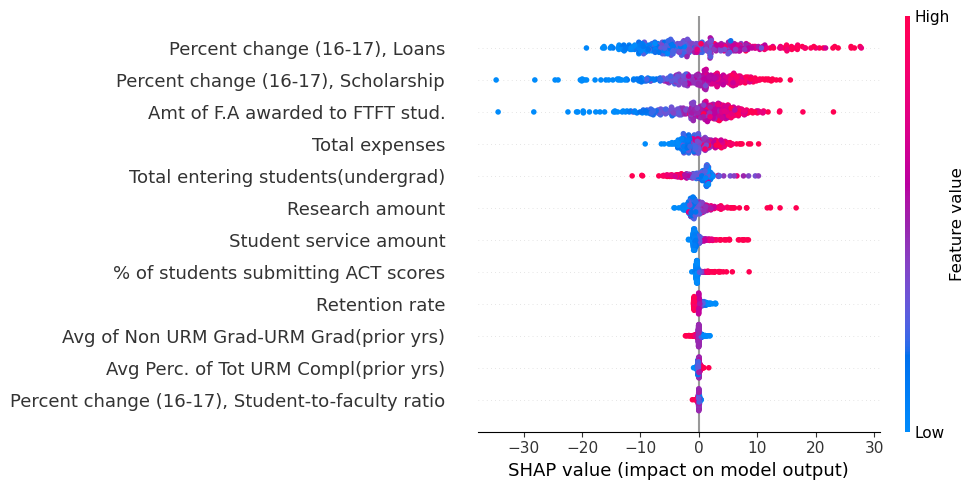

In [323]:
#plt.figure(figsize=(20,15))

shap.summary_plot(shap_values_linear, X_test_grad_shap,plot_size=(10,5))

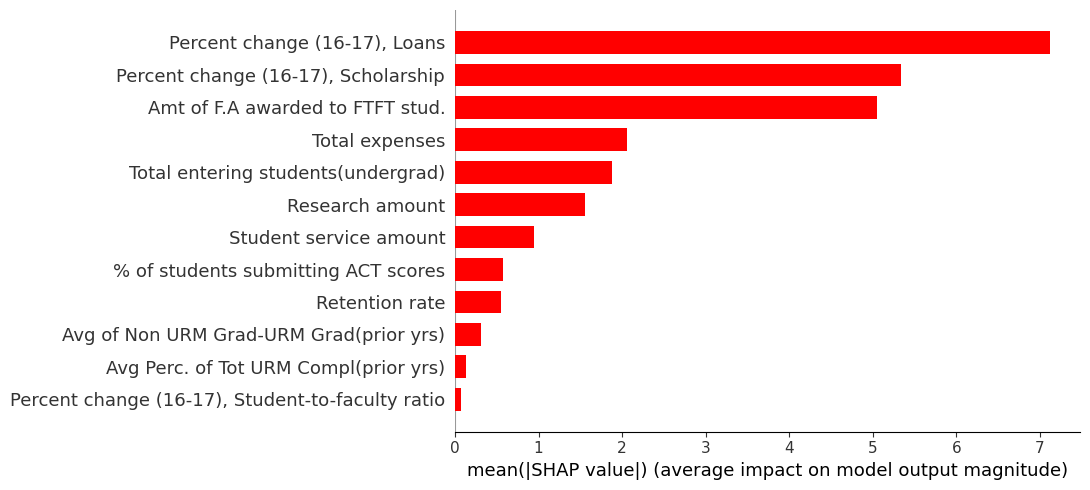

In [324]:
#plt.figure(figsize=(20,15))

shap.summary_plot(shap_values_linear, X_test_grad_shap,plot_size=(11,5),plot_type='bar',color='red')

##### xgboost for illustrative purposes

In [325]:
explainer_xgboost = shap.Explainer(best_xgboost.named_steps.xgboost,X_test_grad_shap)
shap_values_xgboost = explainer_xgboost(X_test_grad_shap)

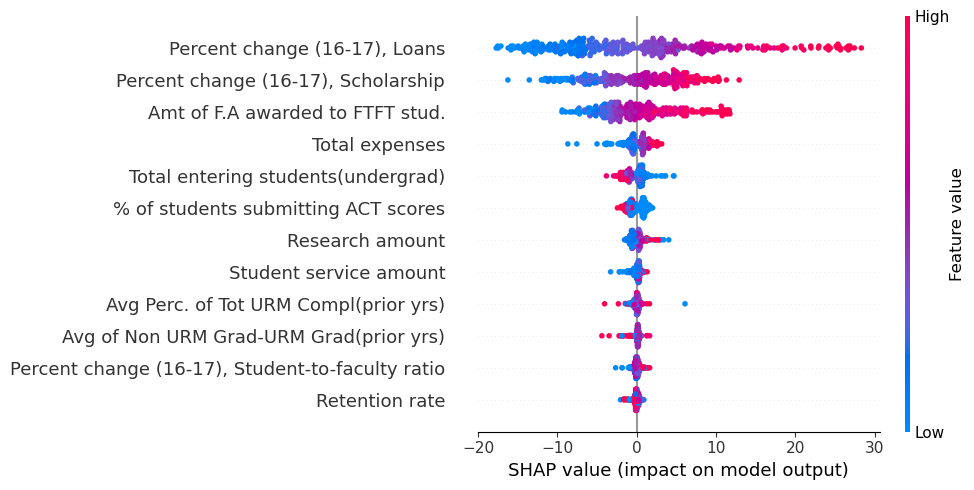

In [326]:
#plt.figure(figsize=(20,15))

shap.summary_plot(shap_values_xgboost, X_test_grad_shap,plot_size=(10,5))

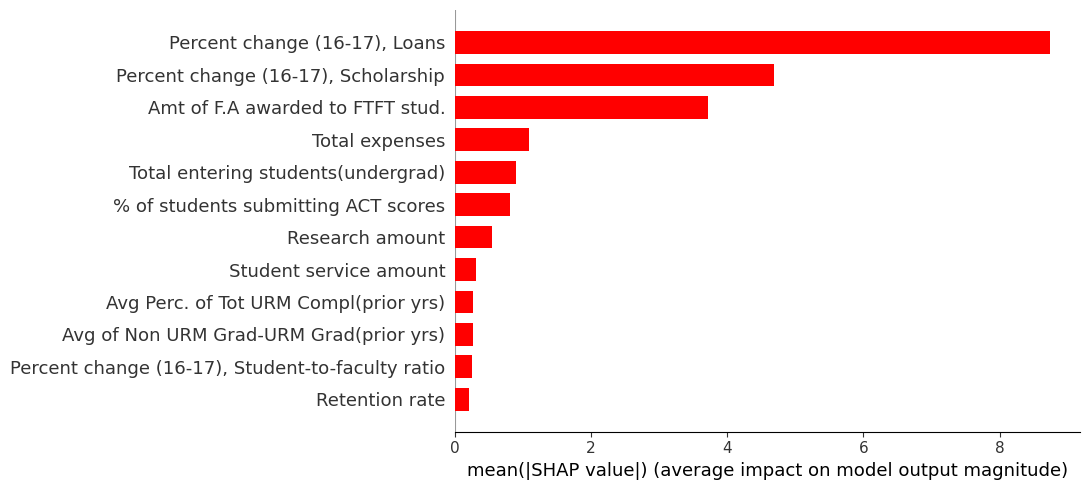

In [327]:
#plt.figure(figsize=(20,15))

shap.summary_plot(shap_values_xgboost, X_test_grad_shap,plot_size=(11,5),plot_type='bar',color='red')

In [328]:
#shap.dependence_plot(ind='Avg of Non URM Grad-URM Grad(prior yrs)',
#                     features=X_grad_all,
#                     shap_values=shapValues, 
#                     interaction_index='Avg of Non URM Grad-URM Grad(prior yrs)')

# RETENTION RATES

# TRAIN DATA FOR RETENTION RATES

In [329]:
#X_train_ret = all_feature_creation_retention(X_train_ret,2013,2014,2015)

# TEST DATA FOR RETENTION RATES

In [330]:
#X_test_ret = all_feature_creation_retention(X_test_ret,2013,2014,2015)

# ALL DATA

In [331]:
#X_ret_all = all_feature_creation_retention(X_retention,2013,2014,2015)

# RFECV

In [332]:
cat_attribs_2 = ['Control of institution',
               'Percent indicator of students with disabilities', 
               'Admission test scores',
                'Outlier'
                ]

sqrt_variables_2 = ['Total entering students(undergrad)',
                  'Percent of entering class',
                  'Student-to-faculty ratio',
                  'Total FTE staff',
                  'Instructional FTE',
                  '% of students submitting ACT scores',
                  #'ACT Composite 25th percentile score',
                  'ACT Composite 75th percentile score', 
                  'Tuition and fees',
                  'Total revenue', 
                  #'Research amount',
                  'Student service amount',
                  'Total expenses',
                  'A.C.(prior yrs)', 
                  'C.C.(prior yrs)', 
                  'Total number of FTFT students - F.A cohort',
                  'Number of FTFT stud. awarded any F.A',
                  'Percent of FTFT stud. awarded any FA',
                  'Amt of F.A awarded to FTFT stud.',
                  #'Reported F.T.E undergrad. enrollment',
                  'Admission rate',
                  'Enrolment rate',
                  'EF2016A_RV.Grand total']

non_sqrt_variables_2 = ['Longitude', 
                      'Latitude', 
                      'Percent change (16-17), Student-to-faculty ratio',
                      'Percent change (16-17), Scholarship', 
                      'Percent change (16-17), Loans',
                      'Percent change (16-17), Enrolment', 
                      'Percent change (16-17), Tuition',
                      'Percent change (16-17), Stu. Serv.',
                      'Avg Grad.Rate(prior yrs)',
                      'Avg of Non URM Grad-URM Grad(prior yrs)',
                      'Avg Perc. of Tot URM Compl(prior yrs)',
                      'Avg Perc. of Tot Non URM Compl(prior yrs)',
                      'Ratio of Enrol to Tot. A.C.',
                      'Ratio of Enrol to Tot. C.C.']

In [333]:
#creating a pre-processor
#sqrt_pipeline_1 = Pipeline([('imputeMedian',SimpleImputer(strategy='median')),
#                            ('squareRoot',FunctionTransformer(np.sqrt)),
#                            ('numerical',StandardScaler())])

#non_sqrt_pipeline_1 = Pipeline([('imputeMedian',SimpleImputer(strategy='median')),
#                               ('numerical',StandardScaler())])

#pre_processor_1 = ColumnTransformer([('sqrt_num', sqrt_pipeline_1, sqrt_variables_1),
#                                   ('non_sqrt_num', non_sqrt_pipeline_1, non_sqrt_variables_1),
#                                   ('cat', OneHotEncoder(drop='if_binary'),cat_attribs_1)])

In [334]:
#rfecv_pipeline = Pipeline([('preprocessor',pre_processor_1),
#                         ('rfecv',RFECV(RandomForestRegressor(),min_features_to_select=10,step=1,
#                                        scoring='neg_root_mean_squared_error'
#                                            ))])

In [335]:
#rfecv_pipeline.fit(X_train_ret,y_train_ret)

In [336]:
#selected_variables = rfecv_pipeline.named_steps.rfecv.support_

In [337]:
#X_train_ret = X_train_ret.loc[:,selected_variables].copy()
#X_test_ret = X_test_ret.loc[:,selected_variables].copy()

In [338]:
#X_ret_all = X_ret_all.loc[:,selected_variables].copy()

In [339]:
#X_train_ret.shape

In [340]:
#train_columns = X_train_ret.columns

In [341]:
#cat_attribs_2 = train_columns[train_columns.isin(cat_attribs_1)]

In [342]:
#sqrt_variables_2 = train_columns[train_columns.isin(sqrt_variables_1)]

In [343]:
#non_sqrt_variables_2 = train_columns[train_columns.isin(non_sqrt_variables_1)]

In [344]:
#cat_attribs = ['Control of institution','Percent indicator of students with disabilities',
#                 'Admission test scores','Outlier']

#square root columns
#sqrt_variables_2 = ['Total entering students(undergrad)', 
#                 'Research amount',
#                  'Student service amount',
#                  'Total expenses',
#                 'Amt of F.A awarded to FTFT stud.',
#                 'Enrolment rate',
#                    'Reported F.T.E undergrad. enrollment',
                 #'Retention rate',
#                 '% of students submitting ACT scores',
#                    'Avg Grad.Rate(prior yrs)',
#                   'Total revenue'
 #                ]

#non_sqrt_variables_2 = ['Percent change (16-17), Student-to-faculty ratio',
#                     'Percent change (16-17), Scholarship',
 #                    'Percent change (16-17), Loans',
 #                    'Percent change (16-17), Enrolment',
  #                   'Percent change (16-17), Tuition',
  #                   'Percent change (16-17), Stu. Serv.',
  #                   'Avg of Non URM Grad-URM Grad(prior yrs)',
  #                   'Avg Perc. of Tot URM Compl(prior yrs)',
  #                   'Ratio of Enrol to Tot. C.C.',
  #                  'C.C.(prior yrs)',
  #                  'A.C.(prior yrs)',
  #                  'Student-to-faculty ratio',
                    #'EF2016A_RV.Grand total'
   #                  ]

In [345]:
#all retention data
#X_retention_all = all_feature_creation_retention(X_retention,2013,2014,2015)
#X_retention_all = vif_based_columns_retention(X_retention_all)

# Train data: Retention rate

In [346]:
X_train_ret = all_feature_creation_retention(X_train_ret,2013,2014,2015)
X_train_ret = vif_based_columns_retention(X_train_ret)

# Test data: Retention rate

In [347]:
X_test_ret = all_feature_creation_retention(X_test_ret,2013,2014,2015)
X_test_ret = vif_based_columns_retention(X_test_ret)

# Pipeline

In [348]:
#creating a pre-processor
sqrt_pipeline_2 = Pipeline([('imputeMedian',SimpleImputer(strategy='median')),
                            ('squareRoot',FunctionTransformer(np.sqrt)),
                            ('numerical',StandardScaler())])

non_sqrt_pipeline_2 = Pipeline([('imputeMedian',SimpleImputer(strategy='median')),
                               ('numerical',StandardScaler())])

pre_processor_2 = ColumnTransformer([('sqrt_num', sqrt_pipeline_2, sqrt_variables_2),
                                   ('non_sqrt_num', non_sqrt_pipeline_2, non_sqrt_variables_2),
                                   ('cat', OneHotEncoder(drop='if_binary'),cat_attribs_2)
                                    ])

pre_processor_shap_1 = ColumnTransformer([('sqrt_num', sqrt_pipeline_2, sqrt_variables_2),
                                   ('non_sqrt_num', non_sqrt_pipeline_2, non_sqrt_variables_2),
                                   ('cat', OneHotEncoder(drop='if_binary'),cat_attribs_2)
                                    ])

# SHAP model data

In [349]:
X_train_ret_shap = pre_processor_shap_1.fit_transform(X_train_ret)
X_train_ret_shap = pd.DataFrame(X_train_ret_shap,columns=X_train_ret.columns)

In [350]:
X_test_ret_shap = pre_processor_shap_1.transform(X_test_ret)
X_test_ret_shap = pd.DataFrame(X_test_ret_shap,columns=X_test_ret.columns)

In [351]:
#creating a pre-processor
#sqrt_pipeline_2 = Pipeline([('imputeMedian',SimpleImputer(strategy='median')),
#                            ('squareRoot',FunctionTransformer(np.sqrt)),
#                            ('numerical',StandardScaler())])

#non_sqrt_pipeline_2 = Pipeline([('imputeMedian',SimpleImputer(strategy='median')),
#                               ('numerical',StandardScaler())])

#pre_processor_2 = ColumnTransformer([('sqrt_num', sqrt_pipeline_2, sqrt_variables_2),
#                                   ('non_sqrt_num', non_sqrt_pipeline_2, non_sqrt_variables_2),
#                                   ('cat', OneHotEncoder(drop='if_binary'),cat_attribs_2)])

#### For shap

##### Applying algorithms

##### Linear regression

In [352]:
#pipe line to use
linear_reg_retention = Pipeline([('preprocessor',pre_processor_2),
                         ('linRegRet',LinearRegression())
                          ])

In [353]:
linear_reg_retention.fit(X_train_ret, y_train_ret)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('sqrt_num',
                                                  Pipeline(steps=[('imputeMedian',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('squareRoot',
                                                                   FunctionTransformer(func=<ufunc 'sqrt'>)),
                                                                  ('numerical',
                                                                   StandardScaler())]),
                                                  ['Total entering '
                                                   'students(undergrad)',
                                                   'Percent of entering class',
                                                   'Student-to-faculty ratio',
                                                   'Total FTE staff',
                                                   'Instructional F...
                                                   'Avg of Non URM Grad-URM '
                                                   'Grad(prior yrs)',
                                                   'Avg Perc. of Tot URM '
                                                   'Compl(prior yrs)',
                                                   'Avg Perc. of Tot Non URM '
                                                   'Compl(prior yrs)',
                                                   'Ratio of Enrol to Tot. '
                                                   'A.C.',
                                                   'Ratio of Enrol to Tot. '
                                                   'C.C.']),
                                                 ('cat',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['Control of institution',
                                                   'Percent indicator of '
                                                   'students with disabilities',
                                                   'Admission test scores',
                                                   'Outlier'])])),
                ('linRegRet', LinearRegression())])

In [354]:
train_metrics(linear_reg_retention, X_train_ret, y_train_ret)

Train R-Square: 73.07292177632256
Train RMSE: 6.12536306862619
Train MAE: 4.46356463819607


In [355]:
test_metrics(linear_reg_retention, X_test_ret, y_test_ret)

Test R-Square:71.01025598940069
Test RMSE: 6.211010495629511
Test MAE: 4.642122687820451


###### SVR

In [356]:
svr_model_ret = Pipeline([('preprocessor', pre_processor_2),
                        ('svr',SVR())])

In [357]:
svr_model_ret.fit(X_train_ret, y_train_ret)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('sqrt_num',
                                                  Pipeline(steps=[('imputeMedian',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('squareRoot',
                                                                   FunctionTransformer(func=<ufunc 'sqrt'>)),
                                                                  ('numerical',
                                                                   StandardScaler())]),
                                                  ['Total entering '
                                                   'students(undergrad)',
                                                   'Percent of entering class',
                                                   'Student-to-faculty ratio',
                                                   'Total FTE staff',
                                                   'Instructional F...
                                                   'Avg Grad.Rate(prior yrs)',
                                                   'Avg of Non URM Grad-URM '
                                                   'Grad(prior yrs)',
                                                   'Avg Perc. of Tot URM '
                                                   'Compl(prior yrs)',
                                                   'Avg Perc. of Tot Non URM '
                                                   'Compl(prior yrs)',
                                                   'Ratio of Enrol to Tot. '
                                                   'A.C.',
                                                   'Ratio of Enrol to Tot. '
                                                   'C.C.']),
                                                 ('cat',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['Control of institution',
                                                   'Percent indicator of '
                                                   'students with disabilities',
                                                   'Admission test scores',
                                                   'Outlier'])])),
                ('svr', SVR())])

In [358]:
train_metrics(svr_model_ret, X_train_ret, y_train_ret)

Train R-Square: 62.933030278017085
Train RMSE: 7.1867206063076114
Train MAE: 4.7150692581949105


In [359]:
test_metrics(svr_model_ret, X_test_ret, y_test_ret)

Test R-Square:56.99895956787708
Test RMSE: 7.564488287532375
Test MAE: 5.003482643484518


##### RandomForest

In [360]:
random_forest_model_ret = Pipeline([('preprocessor', pre_processor_2),
                        ('randomforest',RandomForestRegressor(random_state=9))])

In [361]:
random_forest_model_ret.fit(X_train_ret, y_train_ret)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('sqrt_num',
                                                  Pipeline(steps=[('imputeMedian',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('squareRoot',
                                                                   FunctionTransformer(func=<ufunc 'sqrt'>)),
                                                                  ('numerical',
                                                                   StandardScaler())]),
                                                  ['Total entering '
                                                   'students(undergrad)',
                                                   'Percent of entering class',
                                                   'Student-to-faculty ratio',
                                                   'Total FTE staff',
                                                   'Instructional F...
                                                   'Grad(prior yrs)',
                                                   'Avg Perc. of Tot URM '
                                                   'Compl(prior yrs)',
                                                   'Avg Perc. of Tot Non URM '
                                                   'Compl(prior yrs)',
                                                   'Ratio of Enrol to Tot. '
                                                   'A.C.',
                                                   'Ratio of Enrol to Tot. '
                                                   'C.C.']),
                                                 ('cat',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['Control of institution',
                                                   'Percent indicator of '
                                                   'students with disabilities',
                                                   'Admission test scores',
                                                   'Outlier'])])),
                ('randomforest', RandomForestRegressor(random_state=9))])

In [362]:
train_metrics(random_forest_model_ret, X_train_ret, y_train_ret)

Train R-Square: 95.8430220210587
Train RMSE: 2.406722852270375
Train MAE: 1.614503745318352


In [363]:
test_metrics(random_forest_model_ret, X_test_ret, y_test_ret)

Test R-Square:73.62213519239032
Test RMSE: 5.924611701160154
Test MAE: 4.25375350140056


##### Decision Tree

In [364]:
decision_tree_model_ret = Pipeline([('preprocessor', pre_processor_2),
                        ('decisiontree',DecisionTreeRegressor(random_state=4))])

In [365]:
decision_tree_model_ret.fit(X_train_ret, y_train_ret)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('sqrt_num',
                                                  Pipeline(steps=[('imputeMedian',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('squareRoot',
                                                                   FunctionTransformer(func=<ufunc 'sqrt'>)),
                                                                  ('numerical',
                                                                   StandardScaler())]),
                                                  ['Total entering '
                                                   'students(undergrad)',
                                                   'Percent of entering class',
                                                   'Student-to-faculty ratio',
                                                   'Total FTE staff',
                                                   'Instructional F...
                                                   'Grad(prior yrs)',
                                                   'Avg Perc. of Tot URM '
                                                   'Compl(prior yrs)',
                                                   'Avg Perc. of Tot Non URM '
                                                   'Compl(prior yrs)',
                                                   'Ratio of Enrol to Tot. '
                                                   'A.C.',
                                                   'Ratio of Enrol to Tot. '
                                                   'C.C.']),
                                                 ('cat',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['Control of institution',
                                                   'Percent indicator of '
                                                   'students with disabilities',
                                                   'Admission test scores',
                                                   'Outlier'])])),
                ('decisiontree', DecisionTreeRegressor(random_state=4))])

In [366]:
train_metrics(decision_tree_model_ret, X_train_ret, y_train_ret)

Train R-Square: 100.0
Train RMSE: 0.0
Train MAE: 0.0


In [367]:
test_metrics(decision_tree_model_ret, X_test_ret, y_test_ret)

Test R-Square:37.41631159816029
Test RMSE: 9.125793776149992
Test MAE: 6.148459383753502


##### Xgboost

In [368]:
xgboost_model_ret = Pipeline([('preprocessor', pre_processor_2),
                        ('xgboost',XGBRegressor(random_state=9))])

In [369]:
xgboost_model_ret.fit(X_train_ret, y_train_ret)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('sqrt_num',
                                                  Pipeline(steps=[('imputeMedian',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('squareRoot',
                                                                   FunctionTransformer(func=<ufunc 'sqrt'>)),
                                                                  ('numerical',
                                                                   StandardScaler())]),
                                                  ['Total entering '
                                                   'students(undergrad)',
                                                   'Percent of entering class',
                                                   'Student-to-faculty ratio',
                                                   'Total FTE staff',
                                                   'Instructional F...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=9, ...))])

In [370]:
train_metrics(xgboost_model_ret, X_train_ret, y_train_ret)

Train R-Square: 99.9955266293405
Train RMSE: 0.07895045953856067
Train MAE: 0.054004862067404756


In [371]:
test_metrics(xgboost_model_ret, X_test_ret, y_test_ret)

Test R-Square:69.79674713911652
Test RMSE: 6.33967408964771
Test MAE: 4.428295744567358


# Grid Search

In [372]:
from sklearn.linear_model import Lasso

In [373]:
pipe_lasso_ret = Pipeline([('preprocessor',pre_processor_2),
                        ('lasso',Lasso(random_state=8))])

In [374]:
# Define a grid of hyperparameters for tuning
param_lasso_ret = {
    'lasso__alpha': [0.001, 0.01, 0.1, 1, 10, 100]  # alpha is equivalent to lambda; controls the regularization strength
}

# Use GridSearchCV to find the best alpha (regularization strength)
search_lasso_ret = GridSearchCV(estimator=pipe_lasso_ret, param_grid=param_lasso_ret, 
                           scoring='neg_root_mean_squared_error', cv=10, verbose=1, n_jobs=-1)

In [375]:
search_lasso_ret.fit(X_train_ret, y_train_ret)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('sqrt_num',
                                                                         Pipeline(steps=[('imputeMedian',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('squareRoot',
                                                                                          FunctionTransformer(func=<ufunc 'sqrt'>)),
                                                                                         ('numerical',
                                                                                          StandardScaler())]),
                                                                         ['Total '
                                                                          'entering '
                                                                          'students(undergrad)',
                                                                          'Percent '
                                                                          'of '
                                                                          'entering '
                                                                          'class',
                                                                          'Student-to-faculty '...
                                                                          'A.C.',
                                                                          'Ratio '
                                                                          'of '
                                                                          'Enrol '
                                                                          'to '
                                                                          'Tot. '
                                                                          'C.C.']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='if_binary'),
                                                                         ['Control '
                                                                          'of '
                                                                          'institution',
                                                                          'Percent '
                                                                          'indicator '
                                                                          'of '
                                                                          'students '
                                                                          'with '
                                                                          'disabilities',
                                                                          'Admission '
                                                                          'test '
                                                                          'scores',
                                                                          'Outlier'])])),
                                       ('lasso', Lasso(random_state=8))]),
             n_jobs=-1,
             param_grid={'lasso__alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [376]:
search_lasso_ret.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('sqrt_num',
                                                  Pipeline(steps=[('imputeMedian',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('squareRoot',
                                                                   FunctionTransformer(func=<ufunc 'sqrt'>)),
                                                                  ('numerical',
                                                                   StandardScaler())]),
                                                  ['Total entering '
                                                   'students(undergrad)',
                                                   'Percent of entering class',
                                                   'Student-to-faculty ratio',
                                                   'Total FTE staff',
                                                   'Instructional F...
                                                   'Avg of Non URM Grad-URM '
                                                   'Grad(prior yrs)',
                                                   'Avg Perc. of Tot URM '
                                                   'Compl(prior yrs)',
                                                   'Avg Perc. of Tot Non URM '
                                                   'Compl(prior yrs)',
                                                   'Ratio of Enrol to Tot. '
                                                   'A.C.',
                                                   'Ratio of Enrol to Tot. '
                                                   'C.C.']),
                                                 ('cat',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['Control of institution',
                                                   'Percent indicator of '
                                                   'students with disabilities',
                                                   'Admission test scores',
                                                   'Outlier'])])),
                ('lasso', Lasso(alpha=0.01, random_state=8))])

In [377]:
best_lasso_ret = search_lasso_ret.best_estimator_

In [378]:
#train set predictions

y_train_pred_lasso_ret = best_lasso_ret.predict(X_train_ret)


In [379]:
#r_square of train data

r2_score(y_train_ret,y_train_pred_lasso_ret)*100

72.99072134656394

In [380]:
#rmse for train data

np.sqrt(round(mean_squared_error(y_train_ret, y_train_pred_lasso_ret),5))


6.134705371898475

In [381]:
#mae for train data

round(mean_absolute_error(y_train_ret, y_train_pred_lasso_ret),5)


4.46065

In [382]:
y_pred_lasso_ret = best_lasso_ret.predict(X_test_ret)

In [383]:
lasso_r_square_ret = best_lasso_ret.score(X_test_ret,y_test_ret)
lasso_r_square_ret = round(lasso_r_square_ret*100,2)
lasso_r_square_ret

71.49

In [384]:
mse_lasso_ret = round(mean_squared_error(y_test_ret, y_pred_lasso_ret),5)
np.sqrt(mse_lasso_ret)

6.159108701752227

In [385]:
mae_lasso_ret = round(mean_absolute_error(y_test_ret, y_pred_lasso_ret),5)
mae_lasso_ret

4.61955

#### SVR

In [386]:
pipe_svr_ret = Pipeline([('preprocessor',pre_processor_2),
                        ('svrRet',SVR())])

In [387]:
#creating a grid search while tuning the parameters of SVR
#this is evaluated by the negative root mean squared error
params_svr_ret = {'svrRet__kernel':['linear', 'poly', 'rbf'], 
              'svrRet__degree': [2,3,4],
             'svrRet__C':[0.01,0.1,10,20]
                 }

search_svr_ret = GridSearchCV(estimator=pipe_svr_ret, 
                          param_grid=params_svr_ret, 
                          cv=10, 
                          scoring='neg_root_mean_squared_error')

In [388]:
search_svr_ret.fit(X_train_ret, y_train_ret)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('sqrt_num',
                                                                         Pipeline(steps=[('imputeMedian',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('squareRoot',
                                                                                          FunctionTransformer(func=<ufunc 'sqrt'>)),
                                                                                         ('numerical',
                                                                                          StandardScaler())]),
                                                                         ['Total '
                                                                          'entering '
                                                                          'students(undergrad)',
                                                                          'Percent '
                                                                          'of '
                                                                          'entering '
                                                                          'class',
                                                                          'Student-to-faculty '...
                                                                          'Enrol '
                                                                          'to '
                                                                          'Tot. '
                                                                          'C.C.']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='if_binary'),
                                                                         ['Control '
                                                                          'of '
                                                                          'institution',
                                                                          'Percent '
                                                                          'indicator '
                                                                          'of '
                                                                          'students '
                                                                          'with '
                                                                          'disabilities',
                                                                          'Admission '
                                                                          'test '
                                                                          'scores',
                                                                          'Outlier'])])),
                                       ('svrRet', SVR())]),
             param_grid={'svrRet__C': [0.01, 0.1, 10, 20],
                         'svrRet__degree': [2, 3, 4],
                         'svrRet__kernel': ['linear', 'poly', 'rbf']},
             scoring='neg_root_mean_squared_error')

In [389]:
search_svr_ret.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('sqrt_num',
                                                  Pipeline(steps=[('imputeMedian',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('squareRoot',
                                                                   FunctionTransformer(func=<ufunc 'sqrt'>)),
                                                                  ('numerical',
                                                                   StandardScaler())]),
                                                  ['Total entering '
                                                   'students(undergrad)',
                                                   'Percent of entering class',
                                                   'Student-to-faculty ratio',
                                                   'Total FTE staff',
                                                   'Instructional F...
                                                   'Avg of Non URM Grad-URM '
                                                   'Grad(prior yrs)',
                                                   'Avg Perc. of Tot URM '
                                                   'Compl(prior yrs)',
                                                   'Avg Perc. of Tot Non URM '
                                                   'Compl(prior yrs)',
                                                   'Ratio of Enrol to Tot. '
                                                   'A.C.',
                                                   'Ratio of Enrol to Tot. '
                                                   'C.C.']),
                                                 ('cat',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['Control of institution',
                                                   'Percent indicator of '
                                                   'students with disabilities',
                                                   'Admission test scores',
                                                   'Outlier'])])),
                ('svrRet', SVR(C=10, degree=2, kernel='linear'))])

In [390]:
best_svr_ret = search_svr_ret.best_estimator_

In [391]:
train_metrics(best_svr_ret, X_train_ret, y_train_ret)

Train R-Square: 71.29134888631803
Train RMSE: 6.324753637516757
Train MAE: 4.334013076678681


In [392]:
test_metrics(best_svr_ret, X_test_ret, y_test_ret)

Test R-Square:73.57567265832772
Test RMSE: 5.929827274215776
Test MAE: 4.476554810733463


#### random forest

In [393]:
pipe_random_ret = Pipeline([('preprocessor',pre_processor_2),
                        ('randomForRet',RandomForestRegressor(random_state=8))])

In [394]:
#creating a grid search while tuning the parameters of SVR
#this is evaluated by the negative root mean squared error
params_random_ret = {'randomForRet__max_depth': [3, 5, 8,9,10], 
                     #'randomForRet__max_leaf_nodes': [3,5,8],
                    'randomForRet__min_samples_leaf': [7, 8, 9,10],  # Require more samples in leaf nodes
                    'randomForRet__max_features': ['sqrt', 'log2'],
                     #'randomForRet__min_samples_split': [3, 5, 8],
                    }

search_random_ret = GridSearchCV(estimator=pipe_random_ret, 
                          param_grid=params_random_ret, 
                          cv=10, 
                          scoring='neg_root_mean_squared_error')

In [395]:
search_random_ret.fit(X_train_ret,y_train_ret)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('sqrt_num',
                                                                         Pipeline(steps=[('imputeMedian',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('squareRoot',
                                                                                          FunctionTransformer(func=<ufunc 'sqrt'>)),
                                                                                         ('numerical',
                                                                                          StandardScaler())]),
                                                                         ['Total '
                                                                          'entering '
                                                                          'students(undergrad)',
                                                                          'Percent '
                                                                          'of '
                                                                          'entering '
                                                                          'class',
                                                                          'Student-to-faculty '...
                                                                          'of '
                                                                          'institution',
                                                                          'Percent '
                                                                          'indicator '
                                                                          'of '
                                                                          'students '
                                                                          'with '
                                                                          'disabilities',
                                                                          'Admission '
                                                                          'test '
                                                                          'scores',
                                                                          'Outlier'])])),
                                       ('randomForRet',
                                        RandomForestRegressor(random_state=8))]),
             param_grid={'randomForRet__max_depth': [3, 5, 8, 9, 10],
                         'randomForRet__max_features': ['sqrt', 'log2'],
                         'randomForRet__min_samples_leaf': [7, 8, 9, 10]},
             scoring='neg_root_mean_squared_error')

In [396]:
search_random_ret.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('sqrt_num',
                                                  Pipeline(steps=[('imputeMedian',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('squareRoot',
                                                                   FunctionTransformer(func=<ufunc 'sqrt'>)),
                                                                  ('numerical',
                                                                   StandardScaler())]),
                                                  ['Total entering '
                                                   'students(undergrad)',
                                                   'Percent of entering class',
                                                   'Student-to-faculty ratio',
                                                   'Total FTE staff',
                                                   'Instructional F...
                                                   'Avg Perc. of Tot Non URM '
                                                   'Compl(prior yrs)',
                                                   'Ratio of Enrol to Tot. '
                                                   'A.C.',
                                                   'Ratio of Enrol to Tot. '
                                                   'C.C.']),
                                                 ('cat',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['Control of institution',
                                                   'Percent indicator of '
                                                   'students with disabilities',
                                                   'Admission test scores',
                                                   'Outlier'])])),
                ('randomForRet',
                 RandomForestRegressor(max_depth=10, max_features='sqrt',
                                       min_samples_leaf=7, random_state=8))])

In [397]:
best_random_ret = search_random_ret.best_estimator_

In [398]:
train_metrics(best_random_ret, X_train_ret, y_train_ret)

Train R-Square: 82.18821804903665
Train RMSE: 4.981852955113629
Train MAE: 3.459721320163902


In [399]:
test_metrics(best_random_ret, X_test_ret, y_test_ret)

Test R-Square:71.32931264146738
Test RMSE: 6.17673722127463
Test MAE: 4.508804244807811


# decision tree

In [400]:
pipe_dec_tree_ret = Pipeline([('preprocessor',pre_processor_2),
                              ('decTreeRet',DecisionTreeRegressor(random_state=5))])

In [401]:
#creating a grid search while tuning the parameters of SVR
#this is evaluated by the negative root mean squared error
params_decTree_ret = {'decTreeRet__max_depth': [3, 5, 8], 
                     #'randomForRet__max_leaf_nodes': [5,10,None],
                    'decTreeRet__min_samples_leaf': [2, 4, 6, 8],  # Require more samples in leaf nodes
                    'decTreeRet__max_features': ['sqrt', 'log2'],
                     #'randomForRet__min_samples_split': [5, 10],
                    }

search_decTree_ret = GridSearchCV(estimator=pipe_dec_tree_ret, 
                              param_grid=params_decTree_ret, 
                              cv=10, 
                              scoring='neg_root_mean_squared_error')

In [402]:
search_decTree_ret.fit(X_train_ret, y_train_ret)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('sqrt_num',
                                                                         Pipeline(steps=[('imputeMedian',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('squareRoot',
                                                                                          FunctionTransformer(func=<ufunc 'sqrt'>)),
                                                                                         ('numerical',
                                                                                          StandardScaler())]),
                                                                         ['Total '
                                                                          'entering '
                                                                          'students(undergrad)',
                                                                          'Percent '
                                                                          'of '
                                                                          'entering '
                                                                          'class',
                                                                          'Student-to-faculty '...
                                                                         OneHotEncoder(drop='if_binary'),
                                                                         ['Control '
                                                                          'of '
                                                                          'institution',
                                                                          'Percent '
                                                                          'indicator '
                                                                          'of '
                                                                          'students '
                                                                          'with '
                                                                          'disabilities',
                                                                          'Admission '
                                                                          'test '
                                                                          'scores',
                                                                          'Outlier'])])),
                                       ('decTreeRet',
                                        DecisionTreeRegressor(random_state=5))]),
             param_grid={'decTreeRet__max_depth': [3, 5, 8],
                         'decTreeRet__max_features': ['sqrt', 'log2'],
                         'decTreeRet__min_samples_leaf': [2, 4, 6, 8]},
             scoring='neg_root_mean_squared_error')

In [403]:
search_decTree_ret.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('sqrt_num',
                                                  Pipeline(steps=[('imputeMedian',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('squareRoot',
                                                                   FunctionTransformer(func=<ufunc 'sqrt'>)),
                                                                  ('numerical',
                                                                   StandardScaler())]),
                                                  ['Total entering '
                                                   'students(undergrad)',
                                                   'Percent of entering class',
                                                   'Student-to-faculty ratio',
                                                   'Total FTE staff',
                                                   'Instructional F...
                                                   'Compl(prior yrs)',
                                                   'Avg Perc. of Tot Non URM '
                                                   'Compl(prior yrs)',
                                                   'Ratio of Enrol to Tot. '
                                                   'A.C.',
                                                   'Ratio of Enrol to Tot. '
                                                   'C.C.']),
                                                 ('cat',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['Control of institution',
                                                   'Percent indicator of '
                                                   'students with disabilities',
                                                   'Admission test scores',
                                                   'Outlier'])])),
                ('decTreeRet',
                 DecisionTreeRegressor(max_depth=5, max_features='sqrt',
                                       min_samples_leaf=4, random_state=5))])

In [404]:
best_decTree_ret = search_decTree_ret.best_estimator_

In [405]:
train_metrics(best_decTree_ret, X_train_ret, y_train_ret)

Train R-Square: 70.17128669801018
Train RMSE: 6.446952638032368
Train MAE: 4.672219076933261


In [406]:
test_metrics(best_decTree_ret, X_test_ret, y_test_ret)

Test R-Square:63.674394875110316
Test RMSE: 6.952588116241435
Test MAE: 5.089914507856044


#### xgboost

In [407]:
pipe_xgboost_ret = Pipeline([('preprocessor',pre_processor_2),
                        ('xgboostRet',XGBRegressor(random_state=8))])

In [408]:
#creating a grid search while tuning the parameters of XgBoost
#this is evaluated by the negative root mean squared error
params_xg_boost_ret = {
                    'xgboostRet__n_estimators': [20, 30,40,50],  # Control the number of boosting rounds
                    'xgboostRet__learning_rate': [0.01, 0.05, 0.1],
                     'xgboostRet__max_depth': [2,3,5,8],
                    #'xgboostRet__reg_alpha': [0, 0.01, 0.1],
                    #'xgboostRet__reg_lambda': [1, 1.5, 2.0]
                 }

search_xg_boost_ret = GridSearchCV(estimator=pipe_xgboost_ret, 
                              param_grid=params_xg_boost_ret, 
                              cv=10, 
                              scoring='neg_root_mean_squared_error')


In [409]:
search_xg_boost_ret.fit(X_train_ret, y_train_ret)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('sqrt_num',
                                                                         Pipeline(steps=[('imputeMedian',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('squareRoot',
                                                                                          FunctionTransformer(func=<ufunc 'sqrt'>)),
                                                                                         ('numerical',
                                                                                          StandardScaler())]),
                                                                         ['Total '
                                                                          'entering '
                                                                          'students(undergrad)',
                                                                          'Percent '
                                                                          'of '
                                                                          'entering '
                                                                          'class',
                                                                          'Student-to-faculty '...
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=8, ...))]),
             param_grid={'xgboostRet__learning_rate': [0.01, 0.05, 0.1],
                         'xgboostRet__max_depth': [2, 3, 5, 8],
                         'xgboostRet__n_estimators': [20, 30, 40, 50]},
             scoring='neg_root_mean_squared_error')

In [410]:
search_xg_boost_ret.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('sqrt_num',
                                                  Pipeline(steps=[('imputeMedian',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('squareRoot',
                                                                   FunctionTransformer(func=<ufunc 'sqrt'>)),
                                                                  ('numerical',
                                                                   StandardScaler())]),
                                                  ['Total entering '
                                                   'students(undergrad)',
                                                   'Percent of entering class',
                                                   'Student-to-faculty ratio',
                                                   'Total FTE staff',
                                                   'Instructional F...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=3, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=50, n_jobs=None,
                              num_parallel_tree=None, random_state=8, ...))])

In [411]:
best_xgboost_ret = search_xg_boost_ret.best_estimator_

In [412]:
train_metrics(best_xgboost_ret, X_train_ret, y_train_ret)


Train R-Square: 83.97669355696243
Train RMSE: 4.725124859306777
Train MAE: 3.519597067815088


In [413]:
test_metrics(best_xgboost_ret, X_test_ret, y_test_ret)

Test R-Square:72.30567818471279
Test RMSE: 6.070653433134226
Test MAE: 4.369262438862264


## SHAP

In [414]:
explainer1 = shap.LinearExplainer(best_svr_ret.named_steps.svrRet,X_test_ret_shap#,
                               #feature_perturbation='correlation_dependent'
                               )
shapvalues = explainer1.shap_values(X_test_ret_shap)

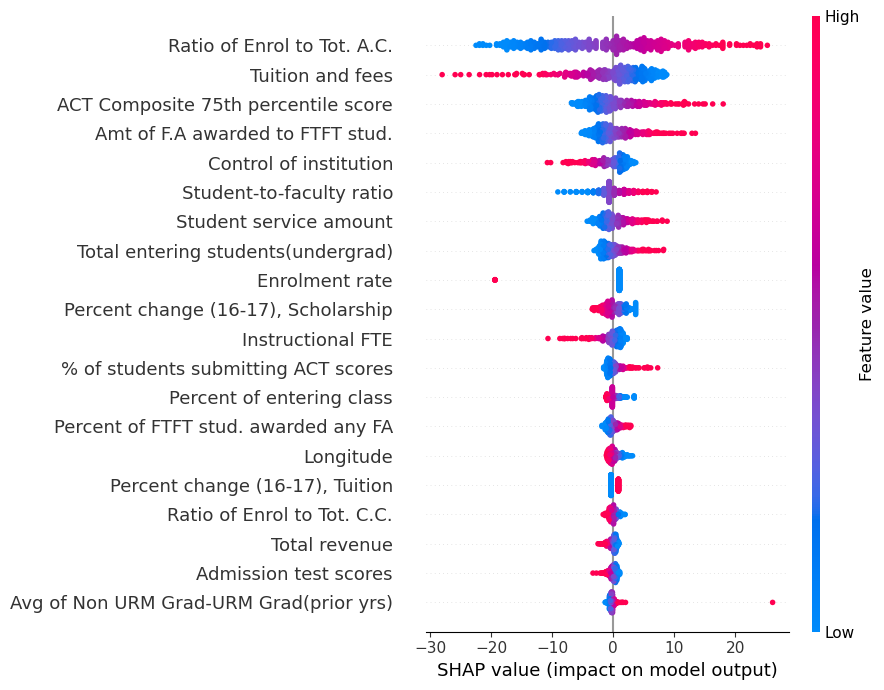

In [415]:
#plt.figure(figsize=(20,8))
shap.summary_plot(shapvalues, X_test_ret_shap, plot_size=(9,7))

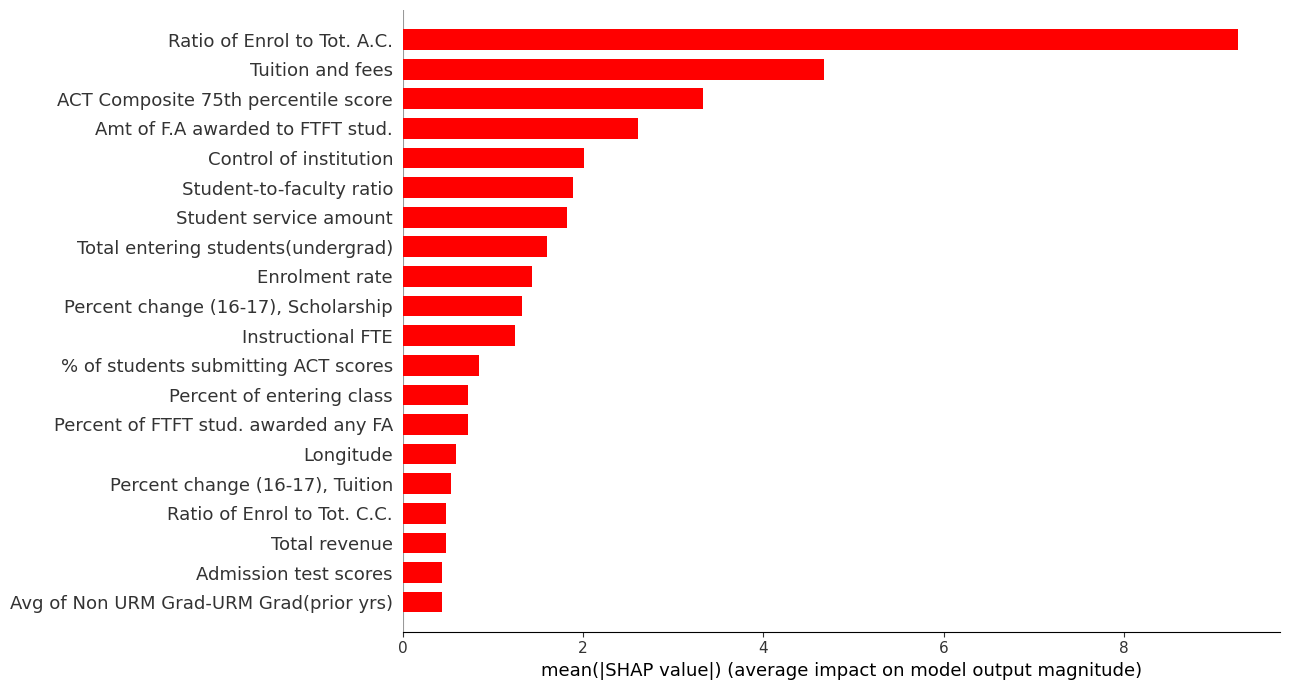

In [416]:
#plt.figure(figsize=(20,8))
shap.summary_plot(shapvalues, X_test_ret_shap,plot_type='bar',color='red',plot_size=(13,7))

#lower research amount is associated with predicting lower outcomes (lower retention rates).-->summary_plot
#lower research amount is associated with institutions with lower adjusted completers--->dependence plot

shap.dependence_plot(ind='A.C.(prior yrs)',
                     features=X_test_ret,
                     shap_values=shapvalues,
                    interaction_index='Research amount',
                     x_jitter=0.9)

shap.dependence_plot(ind='A.C.(prior yrs)',
                     features=X_test_ret,
                     shap_values=shapvalues,
                    interaction_index='Avg of Non URM Grad-URM Grad(prior yrs)',
                     x_jitter=0.9)


In [417]:
#### xgboost for illustrative purposes


In [418]:
explainer_xgboost_1 = shap.Explainer(best_xgboost_ret.named_steps.xgboostRet,X_test_ret_shap)


In [419]:
shap_values_xgboost_1 = explainer_xgboost_1(X_test_ret_shap)

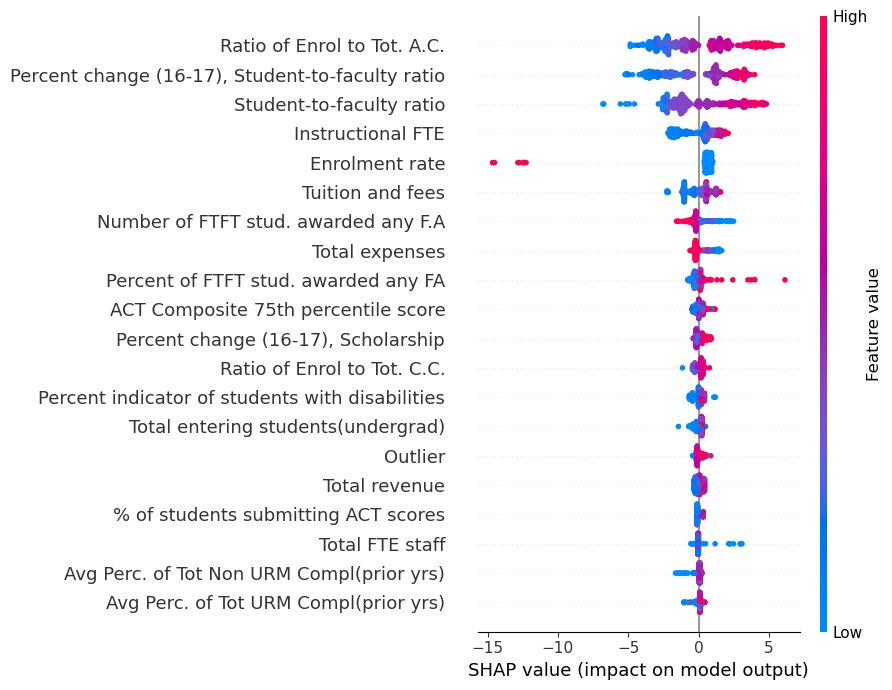

In [420]:
#plt.figure(figsize=(20,15))

shap.summary_plot(shap_values_xgboost_1, X_test_ret_shap, plot_size=(9,7))

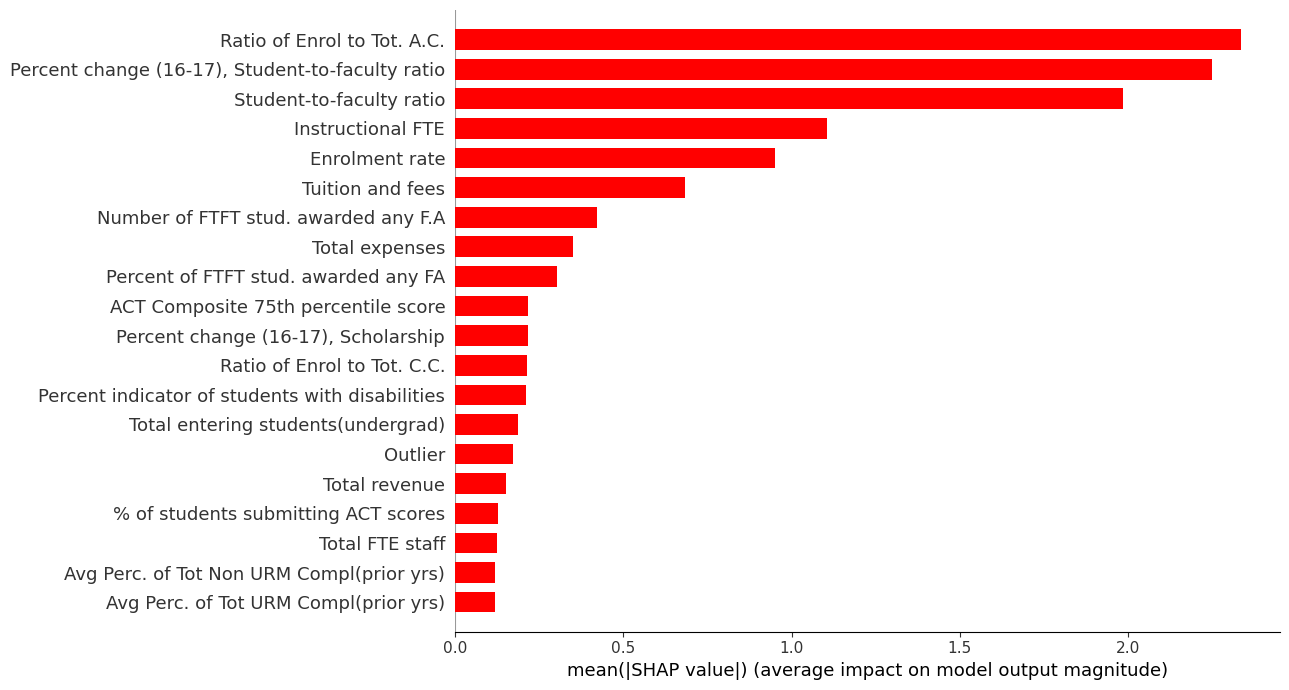

In [421]:
#plt.figure(figsize=(20,15))

shap.summary_plot(shap_values_xgboost_1, X_test_ret_shap, plot_size=(13,7), plot_type='bar', color='red')

In [422]:
X_retention.shape

(1425, 130)

In [423]:
X_train_ret.shape

(1068, 38)

In [424]:
X_test_ret.shape

(357, 38)

In [425]:
y_retention.mean()

76.26596491228071

In [426]:
X_train_ret.columns

Index(['Control of institution', 'Longitude', 'Latitude',
       'Percent indicator of students with disabilities',
       'Total entering students(undergrad)', 'Percent of entering class',
       'Student-to-faculty ratio', 'Total FTE staff', 'Instructional FTE',
       'Admission test scores', '% of students submitting ACT scores',
       'ACT Composite 75th percentile score', 'Tuition and fees',
       'Total revenue', 'Student service amount', 'Total expenses',
       'Total number of FTFT students - F.A cohort',
       'Number of FTFT stud. awarded any F.A',
       'Percent of FTFT stud. awarded any FA',
       'Amt of F.A awarded to FTFT stud.', 'Outlier', 'A.C.(prior yrs)',
       'C.C.(prior yrs)', 'Avg Grad.Rate(prior yrs)',
       'Avg of Non URM Grad-URM Grad(prior yrs)',
       'Avg Perc. of Tot URM Compl(prior yrs)',
       'Avg Perc. of Tot Non URM Compl(prior yrs)', 'EF2016A_RV.Grand total',
       'Ratio of Enrol to Tot. A.C.', 'Ratio of Enrol to Tot. C.C.',
       'Per